# Final project: Machine Learning Pipeline
> For my Information Systems 455 Machine Learning in Python course (Fall 2021 @ Brigham Young University). Combines data collection, data processing, feature extraction (from text and images), model development, model validation, and deployment (simulated by saving the final models).


**Author:** [Ryan Parker](https://github.com/rparkr)

**Updated on:** 18-Dec-2021

---

## Full pipeline
Process:
1. Import custom .py module that contains functions for this machine learning pipeline (those functions are found in the later sections of this notebook)
2. Collect and process data, including binning categories and removing blank values
3. Extract text features (sentiment analysis on model descriptions)
4. Extract image features (vehicle color from images)
5. Demonstrate application of regression, classification, and clustering models from Sci-kit Learn
6. Reduce model complexity by automatically selecting the best features
7. Automatically test multiple regression and classification models to find the best ones for this dataset
8. Save the best models in a format that can be used to generate predictions from given inputs

### (1) Load custom functions
These are saved in a Python file in my [GitHub repo](https://github.com/rparkr/ML-practice/tree/main/Vehicle%20specs/Final%20project)

In [ ]:
# # 1: Import custom .py module from my GitHub repository
# #   How-to: https://changhsinlee.com/colab-import-python/
# # -------------------------------------------------------

# import requests
# import pandas as pd
# import numpy as np

# # URL to GitHub .py module with custom functions,
# # which I wrote in the Step-by-step sections of this notebook
# url = ''
# response = requests.get(url)

# # Save the .py file in Colab's current working directory
# with open(file='vehicle_specs_pipeline.py', mode='wt') as f:
#     f.write(response.content)

# import vehicle_specs_pipeline as pipeline

### (2) Collect and clean data
1. Scrape data from CarAndDriver.com
2. Bin values in columns to reduce variation by combining similar categories
3. Remove blanks

Collect information on vehicle makes and model URLs

In [ ]:
# # 2. Begin data collection
# # ------------------------

# # Get dictionary of vehicle makes with URLs
# makes = pipeline.get_links_automakers()

# # Get dictionary of vehicle models and page info (~30 seconds in Colab)
# models = pipeline.get_links_models(makes, print_progress=True)

# # Add percent domestic content to the vehicle model dictionary
# models = pipeline.add_model_origin(models)

# # Create a DataFrame from the models dictionary 
# df_models = pipeline.create_models_df(models)

Collect vehicle specs information for trims of each vehicle model.

**NOTE:** This web scraping procedure will gather about 650 records; but after cleaning the dataset and removing missing values, **only 520 records remain**, which is within the specified range for the final project (450-550 records).

In [ ]:
# # I set max_trims=1 so the function will return
# # only 1 trim per model, or roughly 500 records
# # (after data cleaning), rather than 3,300+.
# try:
#     vehicle_specs = pipeline.get_trim_specs(
#         models, 
#         domestic_content_threshold=0.50, 
#         max_trims=1,         # set to None to return all trims for each model
#         trim_sort='asc',     # 'asc' returns the base model trims first. Try 'desc' (highest trims first) or 'rand' (mixed).
#         print_progress=True) # set to False if you don't want to see progress updates
    
#     # Create a DataFrame with vehicle specs by trim
#     df = pd.DataFrame(vehicle_specs)
#     # Replace 'NA' values with numpy's NaN (not-a-number, i.e., blank)
#     df.replace(to_replace='NA', value=np.nan, inplace=True)
# except requests.ConnectionError:
#     # If the CarAndDriver.com server blocks data scraping, requests
#     # will return a ConnectionError (104: Connection reset by peer). 
#     # In that case, load the .csv directly from my GitHub repo.
#     df = pd.read_csv('https://raw.githubusercontent.com/rparkr/ML-practice/main/Vehicle%20specs/Final%20project/vehicle_specs.csv')


# # Save the DataFrame as a .csv file to download or use elsewhere.
# # If you will use it in Excel, set encoding=utf-32. The default
# # encoding (utf-8) produces some misread characters when opened in Excel.
# # More info: https://realpython.com/python-encodings-guide/
# df.to_csv('vehicle_specs.csv', index=False)
# # View the DataFrame
# print('Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n\n', sep = '')
# df.head(10)

Bin values and remove duplicate rows

In [ ]:
# # Combine (i.e., "bin") values in columns where the values 
# # represent the same category.
# # The bin_values function is specifically tailored to this dataset
# # and it will combine values from the 
# # Body_style, Drivetrain, and Transmission_type columns.
# df = pipeline.bin_values(df)

# # Remove duplicate rows, ignoring the 'Models' column (and others), since
# # 'Models' may be unique, but Trim_id (the actual unique identifier) may
# # be duplicated
# df = pipeline.remove_duplicate_rows(df, ignore_cols=['Model', 'URL', 'Image', 'Description'])
# print('Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], sep='')

Handle missing data: drop columns with more than 10% missing values, then drop all rows with any missing value.

In [ ]:
# # Apply the drop_missing function to return the final dataset
# # with no NA (blank) values.

# # Specify which columns to remove. These don't contribute predictive 
# # value either because they are redundant or are a unique identifier.
# remove_cols = ['Front_wheel_size_inches', 'Rear_wheel_size_inches',
#                'Pct_domestic_content', 'RPM_max_hp', 'RPM_max_torque',
#                'Curb_weight_ratio', 'Wheelbase_inches']

# # Specify the columns to keep, regardless of the percent of missing values
# # in those columns (I still need them for feature extraction)
# ignore_cols = ['Image', 'Description']
# df = drop_missing(df, threshold=0.1, remove_cols=remove_cols, ignore_cols=ignore_cols)

# df.head()

**Optional: Exploratory data analysis**

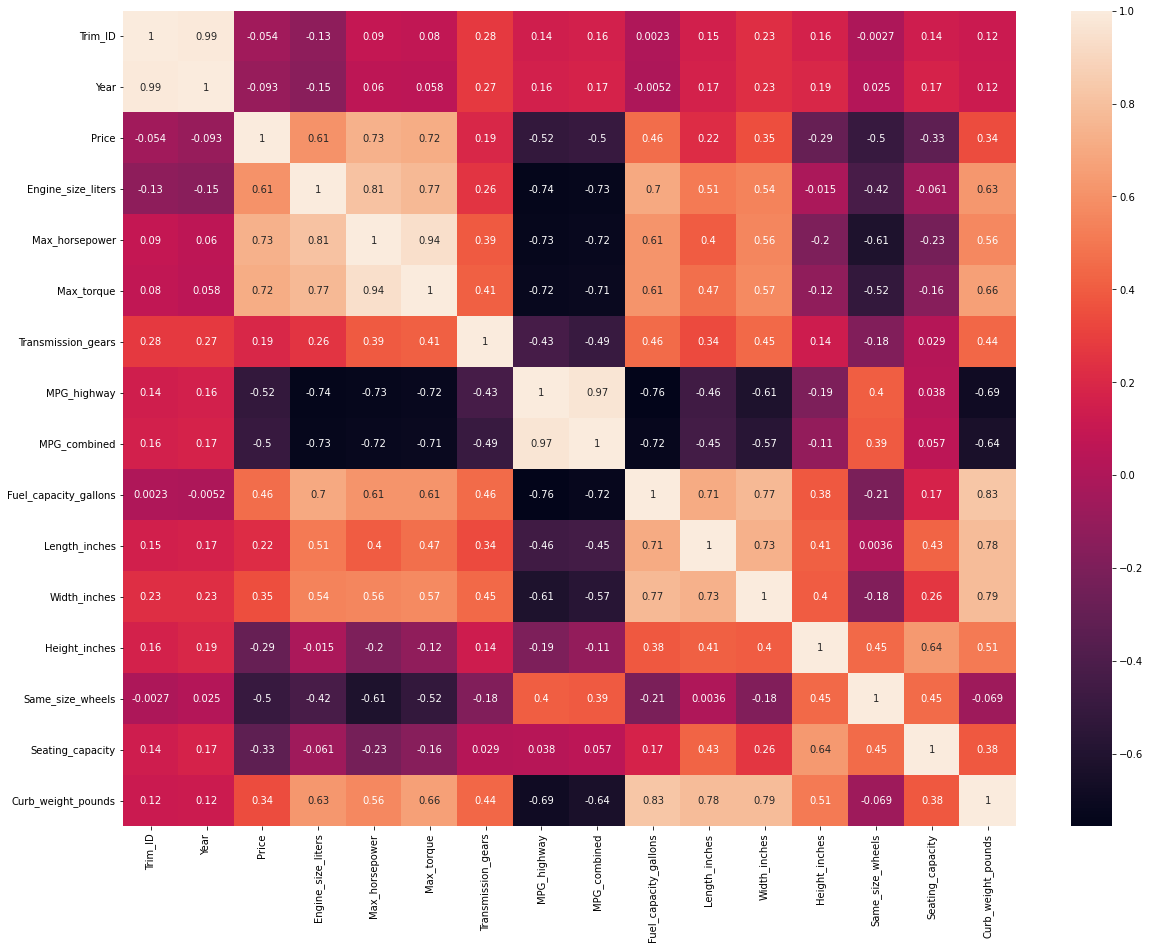

In [ ]:
# # Visualize the relationship between numeric variables

# # Create a correlation matrix
# # See: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 15))

# numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
# corr_matrix = df[numeric_columns].corr()
# sns.heatmap(corr_matrix, annot=True);

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


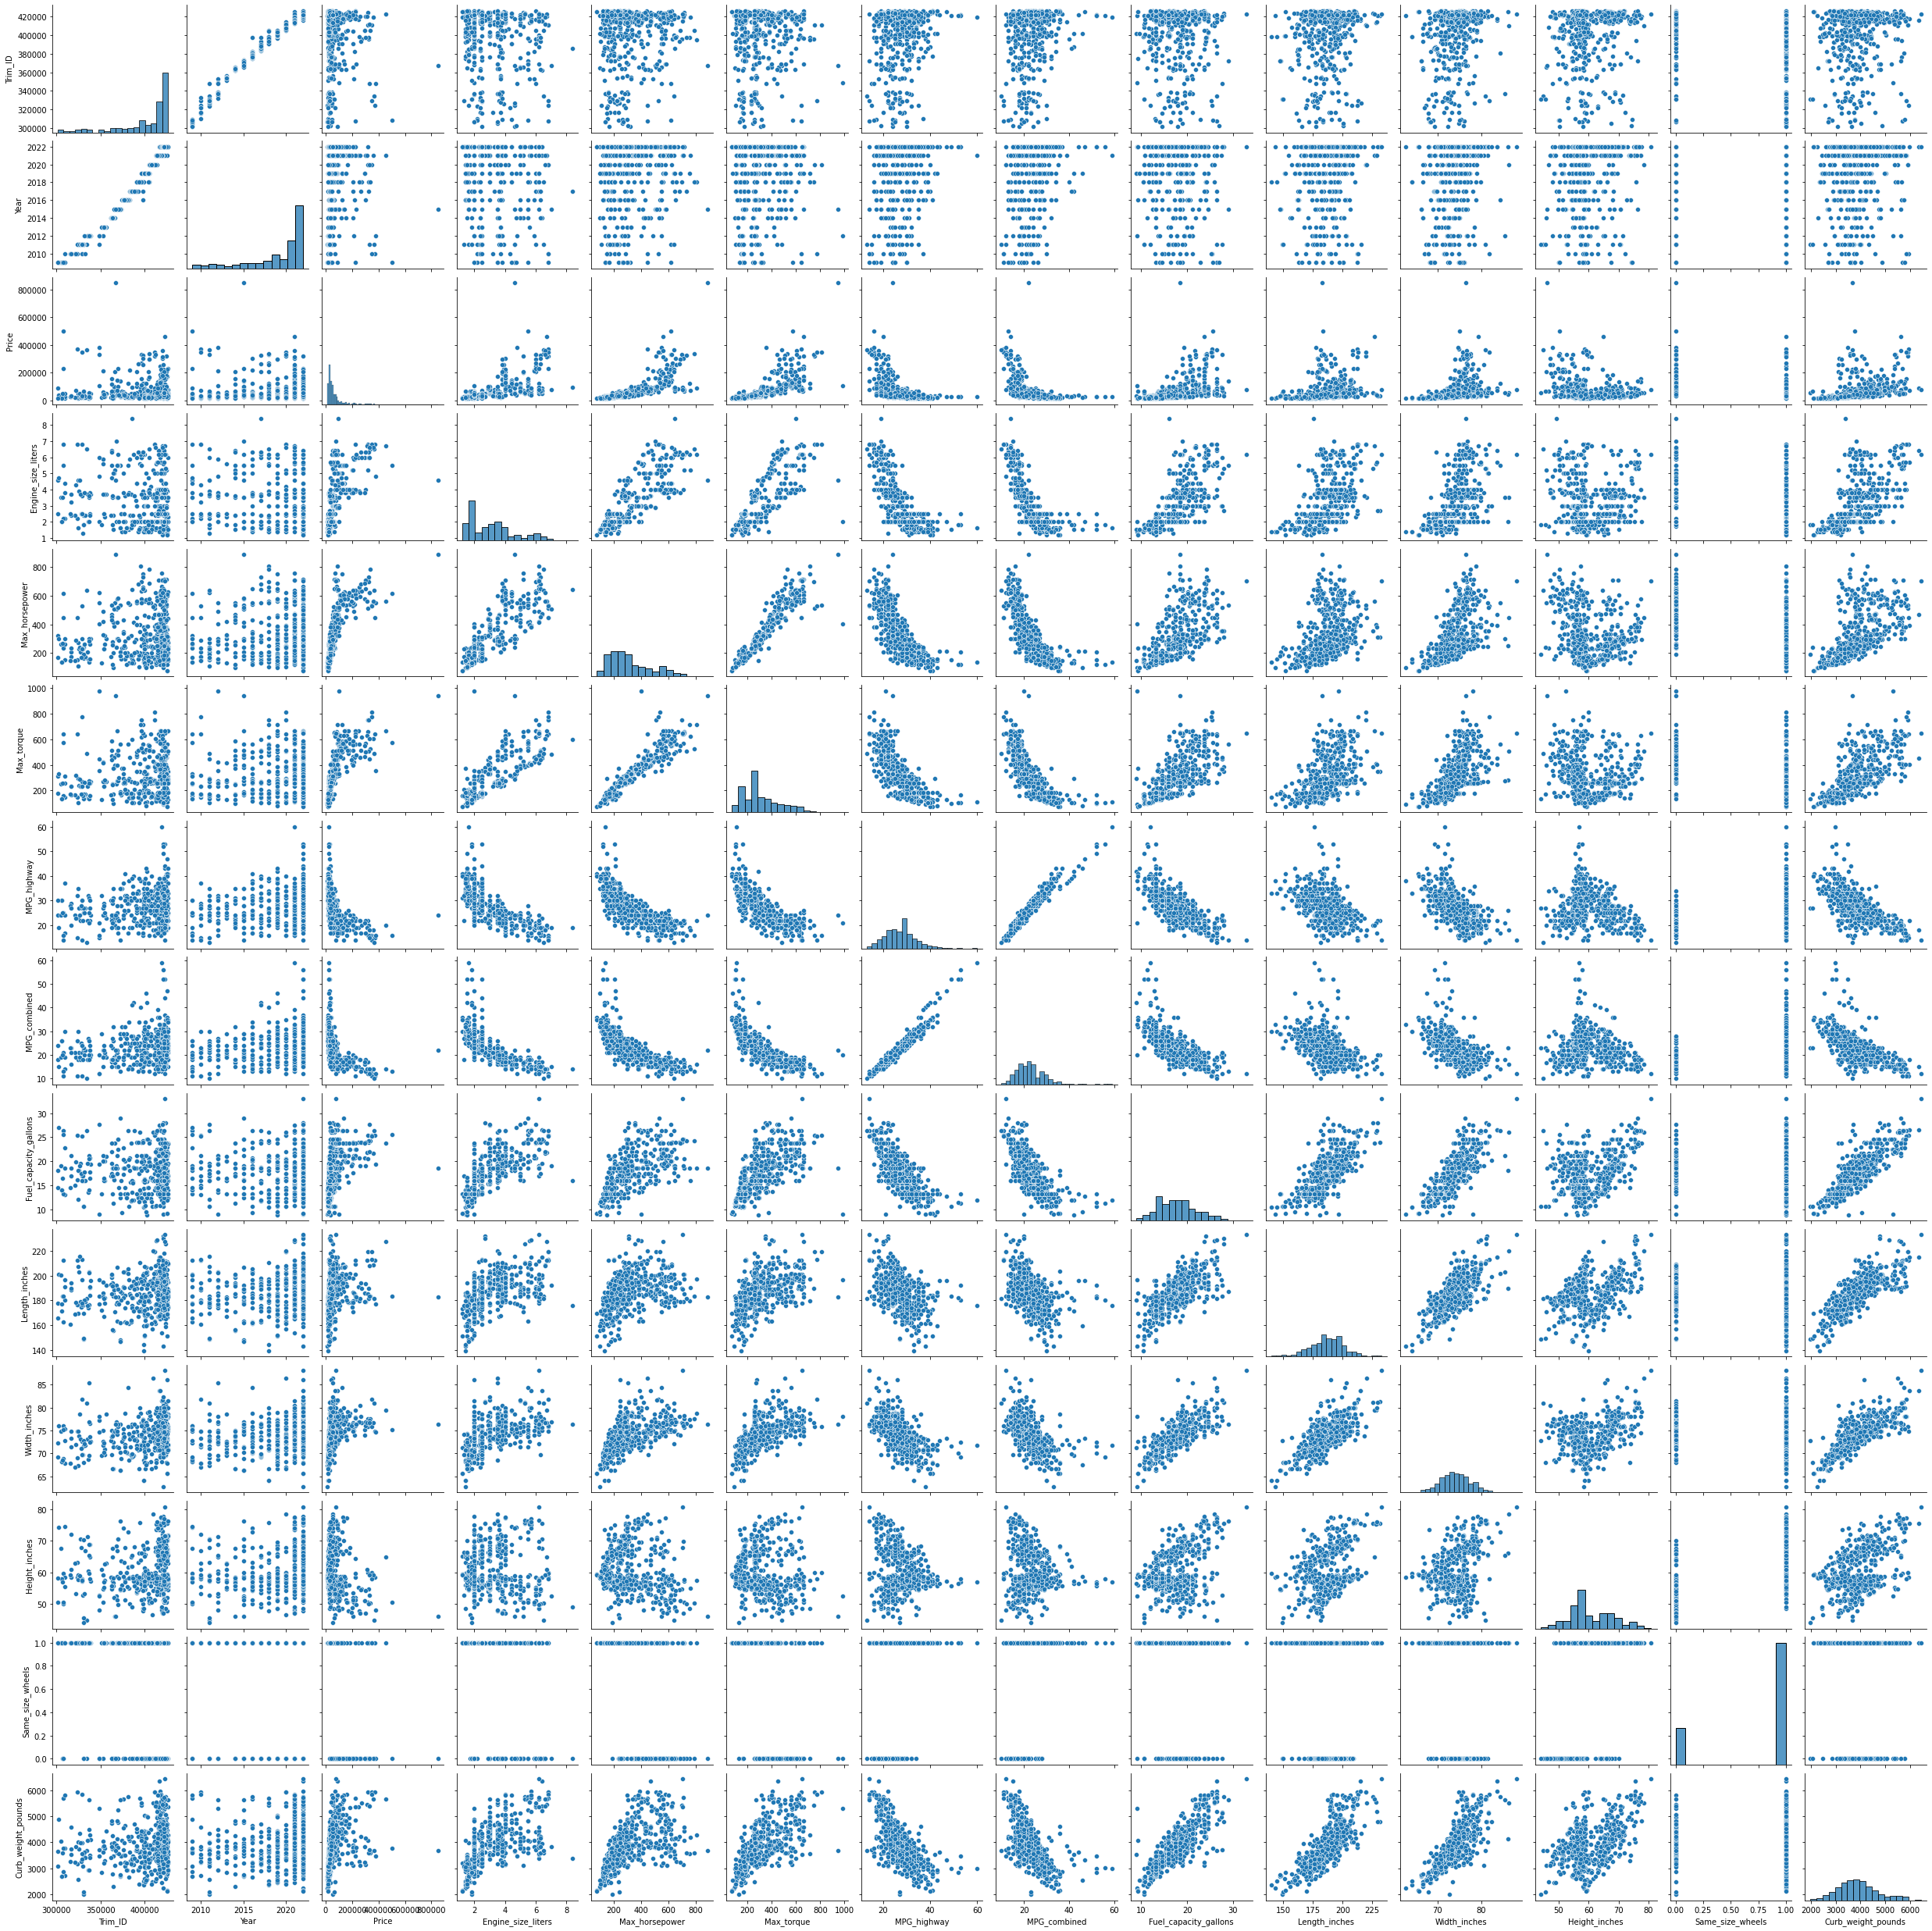

In [ ]:
# Visualize the distribution of numeric variables as pairwise scatterplots
# Warning: this takes a while to run (~2 minutes)

# sns.pairplot(df[numeric_columns]);

### (3) Extract text features
Return sentiment score for model descriptions

In [ ]:
# Next part of pipeline will go here

# For now, see the full, detailed functions in (3) below





---

# Step-by-step

# (1) Data Collection: Vehicle Info
> Using `requests`, `BeautifulSoup`, and `re` (RegEx), scrapes vehicle specifications data from [CarAndDriver.com](https://www.caranddriver.com/) for approximately 500 models. 

**Note:** This data collection exercise is adjusted from the `Data_Collection_Vehicle_Info.ipynb` Jupyter notebook in my [ML-practice GitHub repository](https://github.com/rparkr/ML-practice/tree/main/Vehicle%20specs#readme). In this version, I have restricted collection to approximately 500 records, with one trim per vehicle model. The original version captures data for all model trims, totalling over 3,300 records. 

In addition, this version includes a model description (text block of ~140 characters) for use with sentiment analysis as part of feature extraction.


---


## Data Sources
* Vehicle specs: [CarAndDriver.com](https://www.caranddriver.com/volkswagen/atlas/specs/2021/volkswagen_atlas_volkswagen-atlas_2021/417662)
* Vehicle origin: Percent of Vehicle Content from North America (US/Canada), [data from the NHTSA American Automobile Labeling Act](https://www.nhtsa.gov/part-583-american-automobile-labeling-act-reports)
 * [PDF for model year 2021](https://www.nhtsa.gov/sites/nhtsa.gov/files/2021-06/MY2021-AALA-Alphabetical-6-30-21.pdf) passenger vehicles
 * Converted PDF to Excel using [Adobe Acrobat free PDF to Excel converter](https://www.adobe.com/acrobat/online/pdf-to-excel.html), then heavily cleaned in Excel prior to saving as a .csv file for import in this notebook

**Other interesting data (not used here, but related)**
* [GoodCarBadCar.net](https://www.goodcarbadcar.net/2021-us-vehicle-sales-figures-by-model/), model-level vehicle sales data by year
* [List of new vehicle models and makes](https://www.kbb.com/car-make-model-list/new/view-all/make/), from Kelley Blue Book
* FuelEconomy.gov, the EPA's official source for vehicle fuel economy data. Available as a [CSV download](https://www.fueleconomy.gov/feg/download.shtml), with over 44k rows of data and [83 columns](https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle), and also as a [Web Services API](https://www.fueleconomy.gov/feg/ws/index.shtml). Contains data for vehicle models from 1984-present.

## Background
When searching for vehicles on Google (e.g., "[2021 Honda Civic](https://www.google.com/search?q=2021+honda+civic)"), I noticed that Google presented summarized specs for a vehicle (like weight, length, number of seats, and towing capacity) which were sourced from CarAndDriver.com. Car and Driver maintains comprehensive vehicle statistics for hundreds of models and trim levels for vehicles produced within the past few years.

This section walks through my process to collect and organize data from CarAndDriver.com to use for testing machine learning models.

## Data collected
**General info**
* Year
* Make
* Model
* Image URL
* Brief description
* Style (configuration)
* Trim
* Origin (domestic or foreign)
* Price (starting MSRP)
* EPA classification (vehicle class)

**Engine**

* Drivetrain (rear/front-wheel drive or AWD)
* Engine type
* Fuel type
* Engine displacement (L)
* Engine displacement (in$^3$)
* Max horsepower
* RPM for max HP
* Max torque
* RPM for max torque
* Transmission type
* Transmission speeds (gears)

**Fuel economy**

* CO$_2$ emissions (in tons per 15,000 miles)
* Range, combined (miles)
* Range, city (miles)
* Range, highway (miles)
* MPG, combined
* MPG, city
* MPG, hwy
* Fuel tank capacity (gallons)

**Dimensions**

* Wheelbase (inches)
* Length (inches)
* Width, without mirrors (inches)
* Height (inches) 
* Ground clearance (inches)
* Turning diameter (feet)
* Front wheel size (inches)
* Rear wheel size (inches)
* Seating capacity
* Total passenger volume (ft$^3$)
* Cargo space (ft$^3$)
* Curb weight (pounds)
* GVWR (pounds)
* Payload capacity (pounds)
* Towing capacity (pounds)



# Steps for data collection
1. Access https://www.caranddriver.com
2. Collect all makes (links to vehicle brands) from the New Cars menu of https://www.caranddriver.com/#sidepanel
3. On each make (brand) page (e.g., https://www.caranddriver.com/honda), loop through featured vehicles and collect links to the pages for those vehicles
4. Process the links to vehicle models by retrieving info from the specs page for each model, which has a URL of the form: `https://www.caranddriver.com/[MAKE]/[MODEL]/specs`
 * Collect the Style (configuration) and Trim IDs for each model by looping through the options in the drop-down boxes at the top of the vehicle specs page
 * Retrieve data for each Style and Trim combination, from a URL of the format: `https://www.caranddriver.com/[MAKE]/[MODEL]/specs/[YEAR]/[STYLE]/[TRIM_ID]`
5. Store the data in a `pandas` `DataFrame` that can be saved to a `.csv` file or a `.db` SQLite database for later use

## Import Python packages for data collection

In [ ]:
# import needed packages (libraries)
import requests                 # for requesting web pages (HTML content of pages)
from bs4 import BeautifulSoup   # for parsing HTML
import pandas as pd             # for storing and analyzing data in a tabular format
import numpy as np
import re                       # for text-based pattern matching
import time                     # for pausing 10ms between each webpage request
import datetime                 # for getting the current year (if needed as proxy for model year)
import json                     # to work with HTML in structured JSON format (dictionaries and lists)

# import seaborn as sns           # statistical data visualization
# import matplotlib.pyplot as plt # general plotting and visualization

## Get links to automakers from CarAndDriver.com

## First, check `robots.txt`
I checked Car and Driver's [`robots.txt` page](https://www.caranddriver.com/robots.txt) and confirmed that the pages I will be using are allowed for web scraping, given that I use a crawl delay of 10ms.

In [ ]:
def get_links_automakers():
    '''
    Returns a dictionary with the names of vehicle manufacturers
    and a URL to the automaker's page on CarAndDriver.com

    # Parameters
    ----------
    None.

    # Dependencies
    ------------
    Uses the following packages:
    * requests
    * bs4 (BeautifulSoup)

    Note
    ----
    I first checked the robots.txt page on CarAndDriver.com
    and verified that the pages used by this function are allowed,
    provided I use a 10ms delay between page requests.
    '''
    # for requesting web pages (HTML content of pages)
    import requests
    # for parsing HTML
    from bs4 import BeautifulSoup

    main_url = 'https://www.caranddriver.com'

    sesh = requests.session()
    response = sesh.get(main_url)
    # For best speed, use the 'lxml' parser. 
    # See: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser
    # Alternative: built-in parser 'html.parser'
    page = BeautifulSoup(response.text, 'lxml')

    # Create a dictionary to hold the make (brand) and the URL to its page
    makes = {}

    # Collect links to each page, from the side navigation menu on the main page
    # For an example, see: https://beautiful-soup-4.readthedocs.io/en/latest/#quick-start
    for link in page.find(id='submenu_newcars').find_all('a'):
        makes[link.text] = main_url + link.get('href')

    return makes

In [ ]:
# View the resulting dictionary
makes = get_links_automakers()
print('Number of automakers: ', len(makes), '\n\n', sep='')
makes

Number of automakers: 55




{'Acura': 'https://www.caranddriver.com/acura',
 'Alfa Romeo': 'https://www.caranddriver.com/alfa-romeo',
 'Aston Martin': 'https://www.caranddriver.com/aston-martin',
 'Audi': 'https://www.caranddriver.com/audi',
 'BMW': 'https://www.caranddriver.com/bmw',
 'Bentley': 'https://www.caranddriver.com/bentley',
 'Bollinger': 'https://www.caranddriver.com/bollinger',
 'Bugatti': 'https://www.caranddriver.com/bugatti',
 'Buick': 'https://www.caranddriver.com/buick',
 'Byton': 'https://www.caranddriver.com/byton',
 'Cadillac': 'https://www.caranddriver.com/cadillac',
 'Chevrolet': 'https://www.caranddriver.com/chevrolet',
 'Chrysler': 'https://www.caranddriver.com/chrysler',
 'Dodge': 'https://www.caranddriver.com/dodge',
 'Ferrari': 'https://www.caranddriver.com/ferrari',
 'Fiat': 'https://www.caranddriver.com/fiat',
 'Fisker': 'https://www.caranddriver.com/fisker',
 'Ford': 'https://www.caranddriver.com/ford',
 'GMC': 'https://www.caranddriver.com/gmc',
 'Genesis': 'https://www.caranddrive

## Util functions: numbers_only and spec_data
In this section, I create two functions: 
1. A function to remove any non-numeric characters from a string (for cleaning data prior to saving it in the DataFrame)
2. A function to return an item of information from the CarAndDriver spec pages

This is important because the CarAndDriver spec pages don't assign a unique ID or name attribute to the page elements that hold data. Since I cannot locate an element with particular data by its unique ID, I must search for the label text (e.g., "Fuel Capacity") using a RegEx pattern, and then return the text from the next element in the HTML doc.

This function accomplishes that task by returning the data point based on a search of the displayed text on the page's HTML.

In [ ]:
def numbers_only(input_string: str):
    '''
    Converts a string into its numeric equivalent by 
    removing any non-numeric characters. 
    Numeric digits include the numbers 0-9 and "."
    **Note:** This works for only positive numbers. 

    Returns a float of the first number found in the string,
    or 'NA' if no numbers are found.

    Parameters
    ----------
    input_string : str
        This is string from which to extract numbers.

    Dependencies
    ------------
    Uses the built-in `re` package
    '''
    import re
    # RegEx version to extract numbers from a string:
    # ===============================================
    # Here's what it does: 1 or more digits (\d+, which is the equivalent of [0-9]+) 
    # followed by any number of digits or commas, followed by up to 1 decimal place, 
    # followed by 0 or more digits.

    match_found = re.search(pattern=r'\d+[0-9,]*[.]?\d*', string=input_string)
    if match_found != None:
        match = match_found.group()
        num_only = re.sub(pattern=',', repl='', string=match)
        try:
            return_val = float(num_only)
        except ValueError:
            return_val = 'NA'
    else:
        return_val = 'NA'
    return return_val

    # Loop-through-characters version to extract numbers from a string:
    # ================================================================
    # Ensure the string doesn't include 'NA', 'N/A', or 'TBD'
    # See: https://www.w3schools.com/python/gloss_python_regex_metacharacters.asp
    
    # if (re.search(r'N/?A', input_string) != None) or (re.search('TBD', input_string) != None):
    #     return 'NA'
    # else:
    #     # Note: To use with negative numbers, first .strip() whitespace and then check if the leftmost character is a "-".
    #     nums_only = ''
    #     num_decimals = 0
    #     for char in str(input_string):
    #         if char == '.':
    #             num_decimals += 1
    #         if char.isnumeric() or (char == '.' and num_decimals <= 1):
    #             nums_only += char
        
    #     try:
    #         return_val = float(nums_only)
    #     except:
    #         return_val = 'NA'
        
    #     return return_val

In [ ]:
def spec_data(search_text, tag, soup_page):
    '''
    Retrieves data from the CarAndDriver.com spec pages. Returns the data from
    the first element found that matches the search text and tag provided.
    
    # Parameters
    search_text : {str, list}
        This is the text displayed on the page by the HTML element. 
        Use a list to search for multiple strings.
    
    tag : str 
        This is the tag (e.g., 'h3' or 'div') that will be used for the search
    
    soup_page: BeautifulSoup object
        This is the page to parse.
    
    # Return value
    Either the data requested, or else 'NA' if no match is found.
    'NA' is the format used across CarAndDriver.com spec pages, 
    so it can be replaced all at once using pandas after the data is loaded
    to a DataFrame.

    # Dependencies
    Requires the `bs4` (BeautifulSoup) and `re` libraries.
    '''
    from bs4 import BeautifulSoup
    import re

    # References:
    # https://pytutorial.com/beautifulsoup-find-by-text
    # https://www.crummy.com/software/BeautifulSoup/bs4/doc/#the-string-argument
    # https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find
    # https://www.crummy.com/software/BeautifulSoup/bs4/doc/#a-regular-expression
    # https://www.kite.com/python/examples/1742/beautifulsoup-find-the-next-element-after-a-tag
    # https://www.kite.com/python/examples/1730/beautifulsoup-find-the-next-sibling-of-a-tag

    if type(search_text) == list:
        string_list = [re.compile(item).pattern for item in search_text]
    else:
        string_list = re.compile(search_text)

    try:
        return_data = soup_page.find(tag, string=string_list).next_sibling.next_element.text
    except:
        # Value not found, None object returned
        return_data = 'NA'
    
    return return_data

## Get links to pages for each model
> Collect links and other information for the ~800 vehicle models featured on the automaker pages of CarAndDriver.com

The code cell below takes around 25 seconds to run in Google Colab.

Example of list comprehensions to gather vehicle info on the page (besides model name, year, and URL, which are retrieved in a different kind of list comprehension).

In [ ]:
page = BeautifulSoup(requests.get('https://www.caranddriver.com/volkswagen').text, 'lxml')
ratings = [item.find('span', {'class':'accolades-rating-value'}).text if item.find('span', {'class':'accolades-rating-value'}) is not None else 'NA' for item in page.find_all('div', {'class':'vehicle-item'})]
boxes = [item for item in page.find_all('div', {'class':'vehicle-item'})]
model_descriptions = [item.find('p').text for item in page.find_all('div', {'class':'vehicle-item-body'})]
img_urls = [item.find('img').get('data-src') for item in page.find_all('a', {'class':'vehicle-item-image item-image'})]
starting_prices = [item.find('div', {'class':'msrp-value'}).text if item.find('div', {'class':'msrp-value'}) is not None else 'NA' for item in page.find_all('div', {'class':'vehicle-item-body'})]
print('Ratings:', len(ratings))
print('Boxes:', len(boxes))
print('Descriptions:', len(model_descriptions))
print('Images:', len(img_urls))
print('Price:', len(starting_prices))

print(ratings)

Ratings: 66
Boxes: 66
Descriptions: 66
Images: 66
Price: 66
['NA', 'NA', '8', '7', '6.5', '9.5', '9.5', '8.5', '9', '7', '8', '9.5', '8', '7', '6.5', '9', '10', '8', '8', '10', '7', '9.5', '7.5', '8', '6.5', '9', '10', '8', '10', '7', '9.5', '8', '9', '6', '9', '10', '9', '10', '8', '9', '7', '10', '7', '8', '9', '10', '9', '10', '9', '9', '7', '7', '8', '7', '9', '10', '10', '9', '10', '7', '6', '6', '5', '5', '4', '8']


In [ ]:
def get_links_models(makes, print_progress=True):
    """
    Returns a dictionary with information on vehicle models
    collected from CarAndDriver.com

    Returned dictionary has a key for each vehicle model,
    where the value for that key is a dictionary with:
    * Make (vehicle manufacturer)
    * Model year
    * URL to model's CarAndDriver.com page
    * Model description (paragraph with ~140 characters)
    * Model image URL
    * Starting price

    Parameters
    ----------
    makes : dict
        A dictionary where each key is the automaker name, and the value
        is the URL to that automaker's page on CarAndDriver.com.
        This dictionary is created by the `get_links_automakers` function.
    
    print_progress : bool, default: True
        Whether to print the progress and estimated time left as the
        function runs.

    Dependencies
    ------------
    Uses the following packages:
    * requests
    * bs4 (BeautifulSoup)
    * re
    * time
    * datetime
    """
    # for requesting web pages (HTML content of pages)
    import requests
    # for parsing HTML
    from bs4 import BeautifulSoup
    # for advanced text-based pattern matching
    import re
    # for pausing 10ms between each webpage request
    import time
    # for getting the current year (if needed as proxy for model year)
    import datetime

    # Set the start_time variable to track progress and execution time
    if print_progress:
        start_time = time.time()
    
    # Create dictionary. Keys are model names. Values are sub-dictionaries
    # with key-value pairs representing the page attributes for a model.
    models = {}

    main_url = 'https://www.caranddriver.com'

    # Lists for checking if a model has already been added
    lowercase_models = []
    model_url_list = []

    # Loop through all make pages to find all models under that brand
    for make_num, (make_name, make_url) in enumerate(makes.items()):
        # For best speed, use the 'lxml' parser. The 'html.parser' is built-in with Python, but isn't as fast.
        # See: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser
        page = BeautifulSoup(requests.get(url=make_url).text, 'lxml')
        # Short paragraph description of each model on the page
        model_descriptions = [item.find('p').text for item in page.find_all('div', {'class':'vehicle-item-body'})]
        # Links to vehicle images
        img_urls = [item.find('img').get('data-src') for item in page.find_all('a', {'class':'vehicle-item-image item-image'})]
        # Starting prices; sometimes not listed, hence the 'else'. See: https://stackoverflow.com/a/4260304/17005348
        starting_prices = [item.find('div', {'class':'msrp-value'}).text if item.find('div', {'class':'msrp-value'}) is not None else 'NA' for item in page.find_all('div', {'class':'vehicle-item-body'})]
        # CarAndDriver rating (out of 10)
        ratings = [item.find('span', {'class':'accolades-rating-value'}).text if item.find('span', {'class':'accolades-rating-value'}) is not None else 'NA' for item in page.find_all('div', {'class':'vehicle-item'})]
        # List of all models on the page
        links = [item.find('a') for item in page.find_all('div', {'class':'vehicle-item-body'})]
        for link_num, link in enumerate(links):
            # Example link.text: "2022 Honda Pilot"
            year_name = link.text.split(sep=' ', maxsplit=1)
            if len(year_name) == 1:
                # See: https://www.kite.com/python/examples/5639/datetime-get-the-year,-month,-and-day-of-a-%60datetime%60
                # Also: https://www.geeksforgeeks.org/python-program-to-print-current-year-month-and-day/
                model_year = datetime.datetime.today().year
                # If model year not present, assume model name only
                model_name = year_name[0]
            else:
                model_year = year_name[0]
                model_name = year_name[1]
            model_url = main_url + link.get('href')

            # Skip to the next model if the model_year is non-numeric
            try:
                int(model_year)
            except ValueError:
                continue
            
            # If a year is appended to the end of the model url, 
            #   it may be a repeat model, since multiple years can be 
            #   accessed from the same specs page.
            # e.g., 'https://www.caranddriver.com/honda/civic-2021' 
            # is the same as 'https://www.caranddriver.com/honda/civic'
            model_url_no_year = re.split(pattern='-[0-9]{4}$', string=model_url, maxsplit=1)[0]

            # Check if the model already exists in the dictionary
            if (model_name.lower() in lowercase_models) or (model_url_no_year in model_url_list):
                continue    # skip to the next model on the page
            
            # Add to the model name and url lists
            lowercase_models.append(model_name.lower())
            model_url_list.append(model_url_no_year)

            # Clean the description text
            desc = str(model_descriptions[link_num])
            # Replace the right apostrophe character with a basic (') character to assist encoding
            # See: https://stackoverflow.com/a/24358544/17005348
            desc = re.sub("\u2019", "'", desc)
            # Remove leading and trailing spaces, newlines, or returns
            # See: https://www.w3schools.com/python/ref_string_strip.asp
            desc = desc.strip(' \n\r')

            # Trim the parameter string from the end of the img url
            img_url = str(img_urls[link_num])
            img_url = re.split(r'[?]', img_url)[0]

            # Return only numbers from the starting price (no "$" or ",")
            starting_price = numbers_only(str(starting_prices[link_num]))
            if type(starting_price) == float:
                starting_price = int(starting_price)
            
            models[model_name] = dict(
                Make = make_name,
                Year = model_year,
                URL = model_url,
                Description = desc,
                Image = img_url,
                Starting_Price = starting_price,
                Rating = ratings[link_num]
            )

        # Display progress after each make is completed
        if print_progress:
            # See: https://www.kite.com/python/answers/how-to-measure-time-elapsed-in-python
            # Also: https://www.kite.com/python/answers/how-to-convert-seconds-to-hours,-minutes,-and-seconds-in-python
            elapsed_time = time.time() - start_time
            pct_complete = (make_num + 1) / len(makes)
            estimated_seconds_left = (elapsed_time / pct_complete) - elapsed_time
            est_time_left = str(datetime.timedelta(seconds=estimated_seconds_left))
            # See: https://www.kite.com/python/answers/how-to-format-a-number-as-a-percentage-in-python
            print('{:.1%}'.format(pct_complete), 'complete',
                    '\nMake:', make_name,
                    '\nModels collected:', len(models),
                    '\nEst. total models:', int(len(models) / pct_complete),
                    '\nTime elapsed:', str(datetime.timedelta(seconds=elapsed_time)),
                    '\nEstimated time remaining:', est_time_left, '\n')

        # Pause Python for 10ms before going to the next automaker page
        # See: https://www.kite.com/python/answers/how-to-sleep-for-a-number-of-milliseconds-in-python
        time.sleep(0.01)
        
    return models

In [ ]:
# Example: demonstrating use of RegEx to find model duplicates from URLs
# Simple documentation here: https://www.w3schools.com/python/python_regex.asp
# More thorough overview here: https://docs.python.org/3/howto/regex.html

# Use a regular expression to find if a year is appended to the end of a URL
test_url = 'https://www.caranddriver.com/honda/civic-2021'

look_for = re.search(pattern='-[0-9]{4}$', string=test_url)
if look_for == None:
    print('No match found')
else:
    print('Match found:', test_url[look_for.start():look_for.end()])
    print('Before match:', test_url[:look_for.start()])

print(re.split(pattern='-[0-9]{4}$', string=test_url, maxsplit=1))

Match found: -2021
Before match: https://www.caranddriver.com/honda/civic
['https://www.caranddriver.com/honda/civic', '']


In [ ]:
# Load the models dictionary
models = get_links_models(makes, print_progress=True)

print('-------------------\nNumber of models:', len(models))

1.8% complete 
Make: Acura 
Models collected: 11 
Est. total models: 605 
Time elapsed: 0:00:01.206164 
Estimated time remaining: 0:01:05.132875 

3.6% complete 
Make: Alfa Romeo 
Models collected: 19 
Est. total models: 522 
Time elapsed: 0:00:01.538551 
Estimated time remaining: 0:00:40.771598 

5.5% complete 
Make: Aston Martin 
Models collected: 31 
Est. total models: 568 
Time elapsed: 0:00:01.753487 
Estimated time remaining: 0:00:30.393781 

7.3% complete 
Make: Audi 
Models collected: 69 
Est. total models: 948 
Time elapsed: 0:00:02.317790 
Estimated time remaining: 0:00:29.551823 

9.1% complete 
Make: Bentley 
Models collected: 79 
Est. total models: 869 
Time elapsed: 0:00:02.518368 
Estimated time remaining: 0:00:25.183680 

10.9% complete 
Make: BMW 
Models collected: 121 
Est. total models: 1109 
Time elapsed: 0:00:03.092308 
Estimated time remaining: 0:00:25.253851 

12.7% complete 
Make: Bollinger 
Models collected: 123 
Est. total models: 966 
Time elapsed: 0:00:03.23

## Add vehicle origin to model dictionary
Vehicle origin information comes from the National Highway and Traffic Safety Administration (NHTSA), which requires that every automaker publicly post information regarding the percentage of vehicle components (by value, not quantity) and labor from the United States and Canada, and, if applicable, from the next two most prevalent countries. See the **[Data Sources](#scrollTo=_1_Data_Collection_Vehicle_Info)** section in the intro.

> I use vehicle origin data to determine whether a model is _domestic_ (i.e., mostly from the U.S. and Canada) or _foreign_ (mostly from other countries).

In the code below, I use RegEx (regular expressions) to evaluate whether the Origin dataset has information for a particular model in the `models` dictionary. `pandas` provides faster methods for looking for values, like [`'value' in df['col']`](https://www.kite.com/python/answers/how-to-check-if-a-value-exists-in-a-pandas-dataframe-in-python), or [`df['col'].isin(['value'])`](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-with-isin), and even methods for combining data automatically, like `df.join()` or `df.merge()`.

The reason I use the slower RegEx method is that the models and makes are occassionally listed differently across the two datasets. The `models` dictionary tends to have the full model and make names, and the Origin datasets usually have shorter versions of the full model names. For example, I would like `Silverado` in the Origin dataset to match `Silverado 1500` and `Silverado HD` in the `models` dictionary. Thus, I use RegEx to check each Origin model to see if it has a match in the `models` dictionary.


In [ ]:
def add_model_origin(models_dict):
    """
    Returns a dictionary that copies the `models` dictionary
    and adds to it `Pct_Domestic_Content` for each model,
    indicating the percent of labor and parts (by value, not qty)
    from the U.S. or Canada.

    Returned dictionary has a key for each vehicle model,
    where the value for that key is a dictionary with:
    * Make (vehicle manufacturer)
    * Model year
    * URL to model's CarAndDriver.com page
    * Model description (paragraph with ~140 characters)
    * Percent Domestic Content

    Parameters
    ----------
    models_dict : dict, required.
        A dictionary where each key is the model name.
        This dictionary is created by the `get_links_models` function.

    Dependencies
    ------------
    Uses the following packages:
    * pandas
    * re
    """
    # for storing and analyzing data in a tabular format
    import pandas as pd
    # for advanced text-based pattern matching
    import re

    # Create a copy of the input dictionary
    models = models_dict.copy()
    
    # Load the datasets with vehicle origin information
    df_make_origin = pd.read_csv('https://raw.githubusercontent.com/rparkr/ML-practice/main/Vehicle%20specs/Make_2021_Domestic_Content.csv')
    df_model_origin = pd.read_csv(
        'https://raw.githubusercontent.com/rparkr/ML-practice/main/Vehicle%20specs/Models_2021_Domestic_Content.csv', 
        encoding='latin-1')

    # Loop through the models dictionary and add origin information
    for vehicle_model, vehicle_attributes in models.items():
        # Reset match_found variable
        match_found = None     
        # Reset the origin_pct variable
        origin_pct = 0         

        # First, check if the vehicle make is in the df_make_origin dataset
        for num, item in enumerate(df_make_origin['Make']):
            # Search using the first 5 letters of make name
            match_found = re.search(item[:5].lower(), vehicle_attributes['Make'].lower())
            if match_found != None:
                # Save the matched info, in case a model is not found later
                origin_pct = df_make_origin.at[num, 'Avg Domestic Content']
                # Exit this inner loop since vehicle make was found
                break
        
        if match_found == None:
            # Data for make not available, return an empty value for the model
            vehicle_attributes['Pct_domestic_content'] = ''
            # Move to the next vehicle_model in the models dictionary
            continue
        
        # Next, check if the model is in the df_model_origin dataset
        # Reset match_found variable
        match_found = None
        for num, item in enumerate(df_model_origin['Model']):
            # Search using the first 5 characters of model name, which has an average len of 5 characters
            match_found = re.search(item[:5].lower(), vehicle_model.lower())
            if match_found != None:
                origin_pct = df_model_origin.at[num, 'Avg Domestic Content']
                # Exit this inner loop since vehicle model was found
                break

        # Add origin_pct to the vehicle_model
        # If model was not not found, this is the average value from the make
        # If model was found, this is the value for the model
        vehicle_attributes['Pct_domestic_content'] = origin_pct

    return models

In [ ]:
# View a subset of the models dictionary to see new origin information
models = add_model_origin(models)
models['Civic']

{'Description': 'With a fresh look, a refined interior, and updated tech features, the all-new 2022 Honda Civic is poised to retain its position atop the compact car segment.',
 'Image': 'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-honda-civic-sedan-110-1623810388.jpg',
 'Make': 'Honda',
 'Pct_domestic_content': 0.457142857,
 'Rating': '9.5',
 'Starting_Price': 22915,
 'URL': 'https://www.caranddriver.com/honda/civic',
 'Year': '2022'}

Make a DataFrame from the `models` dictionary so the information can be joined to the full data table later through `df.merge()`.

In [ ]:
def create_models_df(models_dict):
    """
    Returns a DataFrame from the `models` dictionary, where
    each row is one model and the columns are basic page information.

    Parameters
    ----------
    models_dict : dict, required.
        A dictionary where each key is the model name.
        This dictionary is created by the `get_links_models` function.

    Dependencies
    ------------
    Uses the `pandas` package
    """
    # for storing and analyzing data in a tabular format
    import pandas as pd

    models = models_dict.copy()
    
    # Create a pandas DataFrame of the vehicle models, transposed so model names are the rows
    df_models = pd.DataFrame.from_dict(models).T

    # Reset the index
    df_models.reset_index(inplace=True)

    # Rename the new 'index' column as 'Model'
    df_models.rename(columns={'index':'Model'}, inplace=True)

    return df_models

In [ ]:
import numpy as np
df_models = create_models_df(models)
df_models.replace(to_replace='NA', value=np.nan, inplace=True)

# Optional: save a copy of the DataFrame
df_models.to_csv('vehicle_models.csv', index=False)

# display the DataFrame
print('Rows:\t', df_models.shape[0], '\nCols:\t', df_models.shape[1])
df_models.head(10)

Rows:	 774 
Cols:	 9


Model   Make  Year  ... Starting_Price Rating Pct_domestic_content
0     Integra  Acura  2023  ...        30000.0    NaN                 0.64
1         MDX  Acura  2022  ...        48245.0      8                 0.64
2         ILX  Acura  2022  ...        27545.0      6                 0.55
3  NSX Type S  Acura  2022  ...       171495.0    7.5                 0.64
4         RDX  Acura  2022  ...        40345.0    6.5                 0.65
5         TLX  Acura  2022  ...        38745.0      8                 0.65
6         RLX  Acura  2020  ...        55925.0      5                    0
7          TL  Acura  2014  ...        36950.0      7                 0.64
8         TSX  Acura  2014  ...        31555.0      8                 0.64
9         ZDX  Acura  2013  ...        51815.0      5                 0.64

[10 rows x 9 columns]

## Collect information on all trims for each model
This is the core part of the data collection. Here, I scrape detailed spec information for vehicle models based on trims for each model.

One **model** can have multiple **styles**, and each style can have multiple **trims**. Here's an example: 
1. Model
    * Style 1
        * Trim 1
        * Trim 2
    * Style 2
        * Trim 1
        * Trim 2
     
1. 2021 Honda CR-V
    * 2021 Honda CR-V Hybrid
        * 2021 Honda CR-V Hybrid Touring
        * 2021 Honda CR-V Hybrid Elite
    * 2021 Honda CR-V
        * 2021 Honda CR-V LX
        * 2021 Honda CR-V Special Edition

The cell below is a test that demonstrates how to retrieve the styles and trim levels for a particular model.

In [ ]:
import json
import requests
from bs4 import BeautifulSoup
page = BeautifulSoup(requests.get('https://www.caranddriver.com/honda/cr-v/specs').text, 'lxml')

form_data = page.find('form', {'id':'specs-filter-form'})
json_data = json.loads(form_data.get('data-submodels'))

print('Style-years for this model: ', len(json_data), sep='')

print('Most recent year:', json_data[0]['year'], '\n')

for item in enumerate(json_data):
    print(item, '\n')

Style-years for this model: 19
Most recent year: 2022 

(0, {'id': 'honda_cr-v_honda-cr-v-hybrid_2022', 'name': 'Honda CR-V hybrid', 'chrome_style_ids': [424801, 424802, 424803], 'year': 2022, 'is_primary': False, 'state': 'published', 'body_style': 'suv', 'media': {'media_object': {'hips_url': 'https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/vdat/submodels/honda_cr-v_honda-cr-v-hybrid_2022-1630871440334.jpg'}}}) 

(1, {'id': 'honda_cr-v_honda-cr-v_2022', 'name': 'Honda CR-V', 'chrome_style_ids': [424792, 424788, 424793, 424791, 424789, 424785, 424790, 424786, 424787], 'year': 2022, 'is_primary': True, 'state': 'published', 'body_style': 'suv', 'media': {'media_object': {'hips_url': 'https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/vdat/submodels/honda_cr-v_honda-cr-v_2022-1624473696405.jpg'}}}) 

(2, {'id': 'honda_cr-v_honda-cr-v_2021', 'name': 'Honda CR-V', 'chrome_style_ids': [418830, 421972, 421971, 418834, 418831, 418835, 418829, 418833, 418832, 41

**Next steps for the `get_trim_specs()` function**
* Add a parameter called `model_year` that can have values of `latest` (default), `each_year`, or `all`. 
  * 'latest': get data for vehicle trims in the most recent model year available. Follows the `max_trims` setting for the number of trims per year.
  * 'each_year': get data for vehicle trims across all available years. Follows the `max_trims` setting for the number of trims per year.
  * 'all': get data for all trims for a model across all years with specs data. Ignores the `max_trims` parameter.

By including models from multiple years, we could perform interesting analyses, like examining changes in HP, MPG, or price over time, or by investigating which `body_style`s are most popular across time.

* Instead of a normal function that uses `return`, change this into a generator function that uses `yield` so results are returned as they are gathered, rather than all at once at the end. That way, in case of any error during the function's operation, partial data will be available that can still be used for analysis. See [Stack Abuse article](https://stackabuse.com/python-generators/) or [RealPython article](https://realpython.com/introduction-to-python-generators/) for more info on generator functions.

In [ ]:
def get_trim_specs(model_dict, 
                   domestic_content_threshold=0.50, 
                   max_trims=None, 
                   trim_sort='asc', 
                   print_progress=True):
    """
    Returns a dictionary with vehicle model specifications data
    collected from CarAndDriver.com. The dictionary can then be 
    loaded to a `pandas` `DataFrame` as-is.

    ## Parameters
    model_dict : dict
        A dictionary where each key is the name of a vehicle model, 
        and the value includes a dictionary key ['URL'] with a value
        for the model's URL on CarAndDriver.com.
        This dictionary is created by the `get_links_models` function.
    
    domestic_content_threshold : bool, default: 0.50
        The percent domestic content required for the model's origin
        to be considered "domestic", otherwise the model origin is
        "foreign" (or "unknown" if the percent domestic content was
        not specified for that model). Default is 50%, or 0.50.
    
    max_trims : int, default: None
        The maximum number of trims per model for data collection. 
        Default value of `None` means that data for all trims for
        a model will be returned. A limit higher than the number of trims
        for a model will simply return all trims for that model.
        Set to a value of 1 to collect data for a single trim per model.
    
    trim_sort : str, default: 'asc'
        When max_trims is set to a value other than `None`, this parameter
        specifies which trims to use for data collection. Can be 'asc' to
        sort trims in ascending order and collect data on the first 
        `max_trims` number of trims; 'desc' to sort trims in descending order
        and collect data on the first `max_trims` number of trims, or 'rand'
        to select a random subset of trims (of number <= `max_trims`).
    
    print_progress : bool, default: True
        Whether to print the progress and estimated time left as the
        function runs.

    ## Dependencies
    Uses the following packages:
    * requests
    * bs4 (BeautifulSoup)
    * re
    * time
    * datetime
    * json
    * random
    """

    # for requesting web pages (HTML content of pages)
    import requests
    # for parsing HTML
    from bs4 import BeautifulSoup
    # for advanced text-based pattern matching
    import re
    # for pausing 10ms between each webpage request
    import time
    # for working with datetime types
    import datetime
    # for parsing JSON text into Python objects
    import json
    # for selecting a random trim from a list of trim_ids per model
    import random
    
    # Use a dictionary comprehension to create the dictionary
    column_names = [
        'Trim_ID', 'Make', 'Model', 'Year', 'Style',  'Trim', 'Trim_ID',
        'Body_style', 'Description', 'Rating', 'EPA_class', 'Pct_domestic_content',
        'Origin', 'URL', 'Image', 'Price', 'Drivetrain', 'Engine',
        'Engine_size_liters', 'Engine_size_inches', 'Max_horsepower',
        'RPM_max_hp', 'Max_torque', 'RPM_max_torque', 'Transmission_type',
        'Transmission_gears', 'CO2_emmissions', 'MPG_city', 'MPG_highway',
        'MPG_combined', 'Fuel_capacity_gallons', 'Range_combined', 'Range_city',
        'Range_highway', 'Wheelbase_inches', 'Length_inches', 'Width_inches',
        'Height_inches', 'Ground_clearance_inches', 'Turning_diameter_ft',
        'Front_wheel_size_inches', 'Rear_wheel_size_inches', 'Same_size_wheels',
        'Seating_capacity', 'Cabin_volume_cubic_ft', 'Cargo_space_cubic_ft',
        'GVWR_pounds', 'Curb_weight_pounds', 'Payload_capacity_pounds',
        'Towing_capacity_pounds']

    vehicle_specs = {item:list() for item in column_names}

    # Set the start_time variable to track progress and execution time
    if print_progress:
        start_time = time.time()

    models = model_dict.copy()

    # Loop through vehicle models
    for model_num, (vehicle_model, vehicle_attributes) in enumerate(models.items()):
        # Access the default specs page for the model
        specs_url = vehicle_attributes['URL'] + '/specs'
        response = requests.get(url=specs_url)
        # Ensure at least a 10ms break between requests to the page
        time.sleep(0.01)
        if not response.ok:
            # Model has no specs page, so skip it
            continue
        
         # For best speed, use the 'lxml' parser. See: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser
        page = BeautifulSoup(response.text, 'html.parser')

        # Find all available years, styles, and trims for the model.
        # All the style and trim info is contained in a form element 
        # on the page, structured as a list-of-dictionaries where each
        # list item represents one model-style-year (a style for a year
        # for a particular model). Styles can have multiple trims.
        form_data = page.find('form', {'id':'specs-filter-form'})
        style_names = []
        style_ids = []
        body_styles = []
        trim_ids = []
        image_urls = []
        model_years = []

        # The attribute I need from that form element is called data-submodels
        json_data = json.loads(form_data.get('data-submodels'))

        # Save the default selected year, usually the most recent one
        # Option 1: using text from web page
        # selected_year = int(page.find('select', {'id':'specs-year-select'}).find('option', {'selected':True}).text)
        # Option 2: using the data from the form on the web page
        # for model_style_year in json_data:
        #     if model_style_year['is_primary'] == True:
        #         selected_year = model_style_year['year']
        #         break   # exit loop, since default year was found
        # Option 3: use the latest available year, since many of the 'is_primary' flags are not set (that is, they are all false)
        selected_year = json_data[0]['year']


        # Collect all styles and trims for the selected model year
        for model_style_year in json_data:
            if model_style_year['year'] == selected_year:
                model_years.append(model_style_year['year'])
                style_ids.append(model_style_year['id'])
                style_names.append(model_style_year['name'])
                body_styles.append(model_style_year['body_style'])
                if  model_style_year['media'] == None:
                    image_urls.append('')
                else:
                    image_urls.append(model_style_year['media']['media_object']['hips_url'])
                trim_ids.append(model_style_year['chrome_style_ids'])
        
        # Create a dictionary mapping attributes to their respective trims
        trim_id_dict = {}
        for style_num, style_id in enumerate(style_ids):
            for trim_id in trim_ids[style_num]:
                trim_id_dict[trim_id] = dict(
                    model_year=model_years[style_num], 
                    style_id=style_id, 
                    style_name=style_names[style_num], 
                    body_style=body_styles[style_num], 
                    image_url=image_urls[style_num]
                    )
        
        # Limit to subset based on max_trims and trim_sort parameters
        if (max_trims != None) and (max_trims > 0) and (max_trims < len(trim_id_dict)):           
            if trim_sort == 'asc':
                sorted_trim_ids = list(trim_id_dict.keys())
                sorted_trim_ids.sort(reverse=False)
            elif trim_sort == 'desc':
                sorted_trim_ids = list(trim_id_dict.keys())
                sorted_trim_ids.sort(reverse=True)
            elif trim_sort == 'rand':
                sorted_trim_ids = random.sample(list(trim_id_dict.keys()), k=max_trims)
            else:
                raise ValueError(str(trim_sort) + " not an available option. trim_sort must be either 'asc', 'desc', or 'rand'.")
            
            # Reset lists
            model_years = []
            style_ids = []
            style_names = []
            body_styles = []
            trim_ids = []
            image_urls = []
            # Return a subset of the original data
            for n, trim_id in enumerate(sorted_trim_ids):
                if n >= max_trims:
                    break
                model_years.append(trim_id_dict[trim_id]['model_year'])
                style_ids.append(trim_id_dict[trim_id]['style_id'])
                style_names.append(trim_id_dict[trim_id]['style_name'])
                body_styles.append(trim_id_dict[trim_id]['body_style'])
                image_urls.append(trim_id_dict[trim_id]['image_url'])
                trim_ids.append(trim_id)
            
            # Reconstruct original list forms, based on Style_ids
            # First, create a dictionary with style_ids as the key.
            #   Any duplicate style_ids will be replaced.
            model_specs_dict = {}
            for style_num, style_id in enumerate(style_ids):
                model_specs_dict[style_id] = dict(
                    year=model_years[style_num],
                    name=style_names[style_num],
                    body_style=body_styles[style_num],
                    image_url=image_urls[style_num],
                    trim_ids=[]
                    )
            # Next, build the list of trim_ids for each style
            for n, trim_id in enumerate(trim_ids):
                model_specs_dict[style_ids[n]]['trim_ids'].append(trim_id) 
                       
            # Reset lists
            style_ids = []
            model_years = []
            style_names = []
            body_styles = []
            image_urls = []
            trim_ids = []

            # Finally, rebuild lists as a subset of the originals
            for n, (style_id, attrs) in enumerate(model_specs_dict.items()):
                style_ids.append(style_id)
                model_years.append(attrs['year'])
                style_names.append(attrs['name'])
                body_styles.append(attrs['body_style'])
                image_urls.append(attrs['image_url'])
                trim_ids.append(attrs['trim_ids'])


        # Loop through styles (and trims) to collect data
        for style_num, style_id in enumerate(style_ids):
            for trim_id in trim_ids[style_num]:
                if trim_id in vehicle_specs['Trim_ID']:
                    continue    # Trim already accounted for, skip to next one
                trim_url = f'{specs_url}/{selected_year}/{style_id}/{trim_id}'
                # The CarAndDriver server will reject connection attempts
                # if you try too many connections in a short time (Error 104: Connection Reset by Peer).
                # The following code block will pause execution for 5 seconds 
                # and attempt to reconnect 5 times if connection is rejected.
                try:
                    response = requests.get(url=trim_url)
                except requests.ConnectionError:
                    remaining_attempts = 5
                    while response.ok == False and remaining_attempts > 0:
                        # Decrement the remaining attempts
                        remaining_attempts -= 1
                        # wait for 5 seconds and try again
                        time.sleep(5.0)
                        response = requests.get(url=trim_url)
                # For best speed, use the 'lxml' parser. See: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser
                page = BeautifulSoup(response.text, 'html.parser')

                # ===========================================================
                # Collect data from page and save to vehicle_specs dictionary
                # ===========================================================

                vehicle_specs['Make'].append(vehicle_attributes['Make']) 
                vehicle_specs['Model'].append(vehicle_model) 
                vehicle_specs['Year'].append(model_years[style_num]) # could also use selected_year or vehicle_attributes['Year']
                vehicle_specs['Style'].append(style_names[style_num])
                
                # To get the trim name, I remove " Package Includes"
                # from the end of the trim name listed on the specs page
                not_needed_char_count = -1 * len(' Package Includes')
                vehicle_specs['Trim'].append(spec_data('Overview', 'h4', page)[:not_needed_char_count])
                
                vehicle_specs['Trim_ID'].append(trim_id)
                vehicle_specs['Body_style'].append(body_styles[style_num])
                vehicle_specs['EPA_class'].append(spec_data('EPA Classification', 'h3', page))
                vehicle_specs['Pct_domestic_content'].append(vehicle_attributes['Pct_domestic_content'])
                vehicle_specs['Description'].append(vehicle_attributes['Description'])
                
                # vehicle origin (domestic, foreign, or unknown)
                if vehicle_attributes['Pct_domestic_content'] == '':
                    vehicle_origin = 'unknown'
                elif vehicle_attributes['Pct_domestic_content'] >= domestic_content_threshold:
                    vehicle_origin = 'domestic'
                else:
                    vehicle_origin = 'foreign'
                vehicle_specs['Origin'].append(vehicle_origin)
                # URL
                vehicle_specs['URL'].append(trim_url)
                # Image URL
                if image_urls[style_num] == '':
                    vehicle_specs['Image'].append(vehicle_attributes['Image'])
                else:
                    vehicle_specs['Image'].append(image_urls[style_num])
                # Price
                starting_price = numbers_only(page.find('div', {'class':'price'}).text)
                if starting_price == 'NA' or starting_price == 0:
                    starting_price = vehicle_attributes['Starting_Price']
                vehicle_specs['Price'].append(starting_price)
                # Rating out of 10 (10 is best)
                vehicle_specs['Rating'].append(vehicle_attributes['Rating'])
                
                vehicle_specs['Drivetrain'].append(spec_data('Drivetrain', 'h3', page))
                vehicle_specs['Engine'].append(spec_data('Engine Type and Required Fuel', 'h3', page))
                
                # Engine size in liters and in cubic inches
                engine_size = spec_data('Displacement', 'h3', page) 
                engine_size = engine_size.split('/')
                if len(engine_size) == 1:
                    # Add 'NA' as a second element if the cubic inches size isn't given
                    engine_size.append('NA') 
                vehicle_specs['Engine_size_liters'].append(numbers_only(engine_size[0])) 
                vehicle_specs['Engine_size_inches'].append(numbers_only(engine_size[1])) 
                
                # Horsepower and RPM
                horsepower = spec_data('Maximum Horsepower', 'h3', page) 
                horsepower = horsepower.split(' @ ')
                if len(horsepower) == 1:
                    # Add 'NA' as a second element if the RPM wasn't given
                    horsepower.append('NA')
                vehicle_specs['Max_horsepower'].append(numbers_only(horsepower[0])) 
                vehicle_specs['RPM_max_hp'].append(numbers_only(horsepower[1])) 
                
                # Torque and RPM
                torque = spec_data('Maximum Torque', 'h3', page) 
                torque = torque.split(' @ ')
                if len(torque) == 1:
                    # Add 'NA' as a second element if the RPM wasn't given
                    torque.append('NA')
                vehicle_specs['Max_torque'].append(numbers_only(torque[0])) 
                vehicle_specs['RPM_max_torque'].append(numbers_only(torque[1])) 
                
                vehicle_specs['Transmission_type'].append(spec_data('Transmission Description', 'h3', page))
                vehicle_specs['Transmission_gears'].append(spec_data('Number of Transmission Speeds', 'h3', page)) 
                
                # CO2, with years trimmed; e.g., '9.5 (2021)' becomes '9.5'
                co2 = spec_data('CO2 Emissions', 'h3', page)
                if re.search(r' \([0-9]{4}\)', co2) != None:
                    co2 = re.sub(r' \([0-9]{4}\)', '', co2)
                vehicle_specs['CO2_emmissions'].append(numbers_only(co2)) 
                
                # MPG data for combined, city, and highway
                mpg = spec_data('EPA Fuel Economy', 'h3', page) 
                
                # Remove parentheses from mpg, as in: '21 (2021) / 20 (2021) / 22 (2021)'
                # Would become '21 / 20 / 22'
                # The RegEx pattern used is re.compile(r' \([0-9]{4}\)')
                # Could also use re.compile(r' \(.*?\)') as a more general solution
                # See: https://blog.finxter.com/python-regex-to-return-string-between-parentheses/
                if re.search(r' \([0-9]{4}\)', mpg) != None:
                    mpg = re.sub(r' \([0-9]{4}\)', '', mpg)
                
                if re.search(r'/[ ]*/', mpg) != None:
                    # Alternative fuel vehicle, so first MPG data is empty
                    mpg = spec_data('EPA Fuel Economy Equivalent', 'h3', page) 
                mpg = mpg.split('/')
                # Ensure that the mpg list has 3 elements:
                while len(mpg) < 3:
                    mpg.append('NA')

                vehicle_specs['MPG_combined'].append(numbers_only(mpg[0])) 
                vehicle_specs['MPG_city'].append(numbers_only(mpg[1])) 
                vehicle_specs['MPG_highway'].append(numbers_only(mpg[2])) 
                vehicle_specs['Fuel_capacity_gallons'].append(numbers_only(spec_data('Fuel Capacity', 'h3', page)))

                # Range, combined
                if vehicle_specs['Fuel_capacity_gallons'][-1] != 'NA' and vehicle_specs['MPG_combined'][-1] != 'NA':
                    rng_comb = vehicle_specs['Fuel_capacity_gallons'][-1] * vehicle_specs['MPG_combined'][-1]
                else:
                    rng_comb = 'NA'
                vehicle_specs['Range_combined'].append(rng_comb)
                
                # Range, city
                if vehicle_specs['Fuel_capacity_gallons'][-1] != 'NA' and vehicle_specs['MPG_city'][-1] != 'NA':
                    rng_city = vehicle_specs['Fuel_capacity_gallons'][-1] * vehicle_specs['MPG_city'][-1]
                else:
                    rng_city = 'NA'
                vehicle_specs['Range_city'].append(rng_city)
                
                # Range, highway
                if vehicle_specs['Fuel_capacity_gallons'][-1] != 'NA' and vehicle_specs['MPG_highway'][-1] != 'NA':
                    rng_hwy = vehicle_specs['Fuel_capacity_gallons'][-1] * vehicle_specs['MPG_highway'][-1]
                else:
                    rng_hwy = 'NA'
                vehicle_specs['Range_highway'].append(rng_hwy)

                vehicle_specs['Wheelbase_inches'].append(numbers_only(spec_data('Wheelbase', 'h3', page))) 
                vehicle_specs['Length_inches'].append(numbers_only(spec_data('Length', 'h3', page))) 
                vehicle_specs['Width_inches'].append(numbers_only(spec_data('Width', 'h3', page))) 
                vehicle_specs['Height_inches'].append(numbers_only(spec_data('Height', 'h3', page))) 
                vehicle_specs['Ground_clearance_inches'].append(numbers_only(spec_data('Ground', 'h3', page))) 
                vehicle_specs['Turning_diameter_ft'].append(numbers_only(spec_data('Turning Diameter / Radius, curb to curb', 'h3', page))) 
                vehicle_specs['Front_wheel_size_inches'].append(spec_data('Front Wheel Size', 'h3', page)) 
                vehicle_specs['Rear_wheel_size_inches'].append(spec_data('Rear Wheel Size', 'h3', page)) 
                vehicle_specs['Same_size_wheels'].append(vehicle_specs['Front_wheel_size_inches'][-1] == vehicle_specs['Rear_wheel_size_inches'][-1])
                vehicle_specs['Seating_capacity'].append(spec_data('Passenger / Seating Capacity', 'h3', page)) 
                vehicle_specs['Cabin_volume_cubic_ft'].append(numbers_only(spec_data('Total Passenger Volume', 'h3', page))) 
                
                # Cargo space
                cargo_terms = ['Cargo Space/Area Behind Front Row', 'Cargo Space/Area', 'Trunk Space']
                for c_term in cargo_terms:
                    cargo = spec_data(c_term, 'h3', page)
                    if cargo != 'NA':
                        break   # exit loop, value found
                vehicle_specs['Cargo_space_cubic_ft'].append(numbers_only(cargo)) 
                
                # Gross Vehicle Weight Rating (GVWR)
                GVWR = page.find('div', string=re.compile('GVWR'))
                if GVWR != None:
                    GVWR = GVWR.text.strip()
                    GVWR = GVWR.split(' ')
                    if GVWR[1] != 'NA' and GVWR[1] != 'TBD':
                        GVWR = GVWR[1]
                    else:
                        GVWR = 'NA'
                else:
                    GVWR = 'NA'
                GVWR = numbers_only(GVWR)
                vehicle_specs['GVWR_pounds'].append(GVWR) 

                # Curb weight
                curb_weight = spec_data('Base Curb Weight', 'h3', page)
                if curb_weight == 'NA':
                    # text not found, try a different search, starts with 'Curb Weight'
                    curb_weight = spec_data('^Curb Weight', 'h3', page)
                curb_weight = numbers_only(curb_weight)
                vehicle_specs['Curb_weight_pounds'].append(curb_weight)

                # Payload capacity (GVWR - Curb Weight)
                if GVWR != 'NA' and curb_weight != 'NA':
                    payload_cap = GVWR - curb_weight
                else:
                    payload_cap = 'NA'
                
                vehicle_specs['Payload_capacity_pounds'].append(payload_cap)
                
                # Towing capacity
                towing_cap = spec_data('Maximum Towing Capacity', 'h3', page)
                if towing_cap != 'NA':
                    towing_cap = numbers_only(towing_cap)
                vehicle_specs['Towing_capacity_pounds'].append(towing_cap) 

                # Pause Python for 10ms before going to the next Trim ID page, 
                # as requested in https://www.caranddriver.com/robots.txt
                # See: https://www.kite.com/python/answers/how-to-sleep-for-a-number-of-milliseconds-in-python
                time.sleep(0.01)
        
        # Indicate progress
        # See: https://www.kite.com/python/answers/how-to-measure-time-elapsed-in-python
        # Also: https://www.kite.com/python/answers/how-to-convert-seconds-to-hours,-minutes,-and-seconds-in-python
        if print_progress:
            elapsed_time = time.time() - start_time
            pct_complete = model_num / len(models)
            estimated_seconds_left = (elapsed_time / pct_complete) - elapsed_time
            est_time_left = str(datetime.timedelta(seconds=estimated_seconds_left))
            # See: https://www.kite.com/python/answers/how-to-format-a-number-as-a-percentage-in-python
            print("{:.1%}".format(pct_complete), 'complete', 
                '\nTrims collected:', len(vehicle_specs['Trim_ID']), 
                '\nEst. total trims:', int(len(vehicle_specs['Trim_ID']) / pct_complete), 
                '\nTime elapsed:', str(datetime.timedelta(seconds=elapsed_time)), 
                '\nEstimated time remaining:', est_time_left, 
                '\nMake:', vehicle_attributes['Make'], 
                '\nModel:', vehicle_model, '\n')
   
    # If not all lists are the same length (in item count), 
    # trim all lists to match the item count of the shortest list. 
    # DataFrames require that all lists of data be the same length 
    # (that is, that all columns have the same number of items). 
    # Note: This would happen only if the procedure is stopped early. 
    # Otherwise, all lists will be the same length.

    # First, set the maximum length
    max_len = 0
    for k, v in vehicle_specs.items():
        max_len = max(max_len, len(v))

    # Now, adjust that to the minimum length
    min_len = max_len
    for k, v in vehicle_specs.items():
        min_len = min(min_len, len(v))

    # Finally, trim lists to same length
    for k, v in vehicle_specs.items():
        if len(v) > min_len:
            vehicle_specs[k] = v[:min_len]

    return vehicle_specs

In [ ]:
vehicle_specs =  get_trim_specs(models, 
                   domestic_content_threshold=0.50, 
                   max_trims=1, 
                   trim_sort='asc', 
                   print_progress=True)

Streaming output truncated to the last 5000 lines.
7.4% complete 
Trims collected: 49 
Est. total trims: 664 
Time elapsed: 0:01:54.853529 
Estimated time remaining: 0:24:02.721519 
Make: Audi 
Model: S6 

7.5% complete 
Trims collected: 50 
Est. total trims: 666 
Time elapsed: 0:01:56.598923 
Estimated time remaining: 0:23:57.383275 
Make: Audi 
Model: S7 

7.6% complete 
Trims collected: 51 
Est. total trims: 668 
Time elapsed: 0:01:58.384452 
Estimated time remaining: 0:23:52.652525 
Make: Audi 
Model: S8 

7.8% complete 
Trims collected: 52 
Est. total trims: 669 
Time elapsed: 0:01:59.852501 
Estimated time remaining: 0:23:44.247219 
Make: Audi 
Model: SQ5 / SQ5 Sportback 

7.9% complete 
Trims collected: 53 
Est. total trims: 671 
Time elapsed: 0:02:01.242279 
Estimated time remaining: 0:23:35.155779 
Make: Audi 
Model: Q7 

8.0% complete 
Trims collected: 54 
Est. total trims: 673 
Time elapsed: 0:02:03.088950 
Estimated time remaining: 0:23:31.552316 
Make: Audi 
Model: SQ7 

8

In [ ]:
import numpy as np
df = pd.DataFrame(vehicle_specs)
# Pandas should automatically convert 'NA' to np.nan (NaN) values. 
# To ensure it did, run the following code:
df.replace(to_replace='NA', value=np.nan, inplace=True)
print('Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n\n', sep = '')
df.head(10)

# References:
# https://datatofish.com/replace-nan-values-with-zeros/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# https://www.kite.com/python/answers/how-to-replace-nan-values-with-zeros-in-a-column-of-a-pandas-dataframe-in-python

Rows:	649
Cols:	48




Trim_ID   Make  ... Payload_capacity_pounds  Towing_capacity_pounds
0   419573  Acura  ...                     NaN                  5000.0
1   423559  Acura  ...                     NaN                     NaN
2   425066  Acura  ...                     NaN                     NaN
3   425739  Acura  ...                  1002.0                     NaN
4   424967  Acura  ...                     NaN                     NaN
5   409741  Acura  ...                     NaN                     NaN
6   363873  Acura  ...                     NaN                     NaN
7   364152  Acura  ...                     NaN                     NaN
8   356136  Acura  ...                     NaN                     NaN
9   338730  Acura  ...                     NaN                     NaN

[10 rows x 48 columns]

# Save the DataFrame as a .csv file

In [ ]:
df.to_csv('vehicle_specs.csv', index=False)

# Next steps: Data Collection
For deeper analyses, I would recommend including vehicle sales data in the dataset. Unit sales by make and by model can be obtained from CarSalesBase.com or GoodCarBadCar.net.

Adding vehicle sales data would augment this analysis with interesting market-level information showing which models are most popular and providing a way to estimate revenue by model or by automaker.

The next steps for this analysis would be:
1. Add a "Make" column to the `df_sales` DataFrame (created in the code cell below) by using RegEx to search through the [`makes` dictionary](https://colab.research.google.com/drive/1tiCC5KsJCmEFO48MQyCbb7LCao05rxeJ#scrollTo=VS77TvkpRA8V&line=16&uniqifier=1) and return the make that matches the first 4 characters of the "Model" column in `df_sales`. 4 characters is enough to distinguish Volkswagen from Volvo (Volk vs Volv), whereas 3 or fewer characters would equate them.
2. Link `df_sales` to the corresponding model in `df` (or in the `models` dictionary).
3. Replace the "Model" column in the `df_sales` DataFrame with the model name (excluding the make).
4. Add a "Total Sales" column to the `df_sales` DataFrame that sums unit sales for the whole year
5. Use `df.merge` to combine the `df` and `df_sales` DataFrames
6. Perform additional analyses, such as estimated revenue by model or make, or predicted sales volume using machine learning algorithms.

## Vehicle sales data

**Import vehicle sales data (by model), from GoodCarBadCar.net**

**NOTE:** I first checked GoodCarBadCar.net's [`robots.txt`](https://www.goodcarbadcar.net/robots.txt) to verify that web scraping is allowed. The pages I will use are permitted.

In [ ]:
# URLs with model sales data:
# https://www.goodcarbadcar.net/2019-us-vehicle-sales-figures-by-model/
# https://www.goodcarbadcar.net/2020-us-vehicle-sales-figures-by-model/
# https://www.goodcarbadcar.net/2021-us-vehicle-sales-figures-by-model/

page = BeautifulSoup(requests.get('https://www.goodcarbadcar.net/2019-us-vehicle-sales-figures-by-model/').text, 'html.parser')
tbl = page.find('table', {'id': 'table_3'}) # use table_1 for 2020 sales data

df_sales = pd.read_html(str(tbl), flavor='bs4')[0]

df_sales.head()

Model   Jan   Feb   Mar   Apr   May  ...   Jul   Aug   Sep   Oct   Nov   Dec
0  Acura ILX   805  1047  1289  1152  1351  ...  1224  1439  1078  1430  1253  1305
1  Acura MDX  2968  3833  3982  3339  4425  ...  4788  5976  3833  4368  4784  5636
2  Acura NSX    31    22    26    23    30  ...    10    25    16    15    11    10
3  Acura RDX  4172  4965  5835  4926  5415  ...  4934  5459  4384  5888  5767  6263
4  Acura RLX   119   127   135   151    91  ...    42    38    46    68    80    72

[5 rows x 13 columns]

In [ ]:
# Other interesting dataset: Fuel Economy and related attributes by model


# Load vehicle Fuel Economy dataset from FuelEconomy.gov
# Has over 44k rows and 83 columns
# Takes about 15 seconds to load into the DataFrame

# df_fuelecon = pd.read_csv('https://www.fueleconomy.gov/feg/epadata/vehicles.csv', low_memory=False)

# print(df_fuelecon.shape)
# df_fuelecon.head()

**Alternative vehicle sales data: CarSalesBase.com**
CarSalesBase.com also has make and model-level unit sales by month and year. See, for example [Honda Civic sales](https://carsalesbase.com/us-honda-civic/). CarSalesBase's [`robots.txt`](https://carsalesbase.com/robots.txt) page allows data collection on the pages with unit sales data by model or by make.

In [ ]:
# URL format: https://carsalesbase.com/us-MAKE-MODEL/
# Example: Honda (make), https://carsalesbase.com/us-honda/
# Example: Honda Civic (model), https://carsalesbase.com/us-honda-civic/

page = BeautifulSoup(requests.get('https://carsalesbase.com/us-honda-civic/').text, 'html.parser')
tbl = page.find('table') # Find the first table on the page
df_sales_civic= pd.read_html(str(tbl), flavor='bs4', header=0, thousands='.')[0]

df_sales_civic.columns = [int(numbers_only(col)) for col in df_sales_civic]
df_sales_civic.rename(columns={0:'Month'}, inplace=True)
df_sales_civic.set_index('Month', inplace=True)

df_sales_civic

2016   2017   2018   2019   2020     2021
Month                                                
January    26741  23095  23749  21553  20054  15475.0
February   27707  27039  25816  22979  25617  15906.0
March      32855  31520  32584  33653  18273  24522.0
April      35331  31211  28399  28436  13410  28414.0
May        35396  31989  34349  32800  27244  35962.0
June       31810  30909  31345  29751  23260  32677.0
July       32952  36683  26311  29167  25188  28318.0
August     32807  36482  27677  34808  25524  19654.0
September  28184  35452  24806  22337  22371  15647.0
October    26359  30319  22450  23577  21865  13399.0
November   25303  31181  21890  23676  17372  12927.0
December   31482  31406  26384  22913  21047      NaN

# (2a) Data cleaning
> Preparing the dataset to be used for machine learning models. 
For interesting applications of some machine learning models, see `ML_Models_Vehicle_Specs.ipynb` on my [ML-practice GitHub repository](https://github.com/rparkr/ML-practice/tree/main/Vehicle%20specs).

**Starting point:** `vehicle_specs.csv` file created from the Data Collection section above.

Install packages for data analysis and machine learning.

In [2]:
import pandas as pd                 # store and analyze tabular data
import numpy as np                  # various numerical functions
import matplotlib.pyplot as plt     # visualize data
import seaborn as sns               # visualize statistical data

Load the dataset into a `pandas` `DataFrame`.

In [3]:
# copy the DataFrame to preserve its original state prior to changing it
# df = pd.read_csv('https://raw.githubusercontent.com/rparkr/ML-practice/main/Vehicle%20specs/Final%20project/vehicle_specs.csv')
df_orig = df.copy()

# If running this cell without having run prior cells,
# load the .csv from my GitHub profile
# df_orig = pd.read_csv('https://raw.githubusercontent.com/rparkr/ML-practice/main/Vehicle%20specs/vehicle_specs.csv')

# Preview the DataFrame
print('Rows:\t', df_orig.shape[0], '\nCols:\t', df_orig.shape[1], '\n\n', sep='')
df_orig.head()

Rows:	649
Cols:	49




Trim_ID   Make  ... Payload_capacity_pounds  Towing_capacity_pounds
0   419573  Acura  ...                     NaN                  5000.0
1   423559  Acura  ...                     NaN                     NaN
2   425066  Acura  ...                     NaN                     NaN
3   425739  Acura  ...                  1002.0                     NaN
4   424967  Acura  ...                     NaN                     NaN

[5 rows x 49 columns]

## Examine the values in each column, to see frequency and distribution

In [ ]:
threshold = 20
for col in df_orig:
    if len(df_orig[col].unique()) > threshold:
           continue # skip this column
    print('Column:\t', col, '\n', df_orig[col].value_counts(), '\n\n', sep='')

Column:	Year
2022    256
2021    120
2019     51
2020     38
2018     30
2016     22
2017     20
2015     19
2011     18
2009     16
2012     15
2014     14
2013     13
2010     11
2008      5
2023      1
Name: Year, dtype: int64


Column:	Body_style
suv              217
sedan            170
coupe            101
hatchback         53
convertible       32
pickup            26
van               21
station wagon     15
station-wagon      8
Name: Body_style, dtype: int64


Column:	Rating
8.0     102
9.0      78
6.0      75
8.5      70
7.0      49
10.0     42
7.5      38
6.5      36
9.5      31
4.0      30
5.0      20
5.5      15
3.0      12
2.0       7
4.5       4
3.5       3
0.0       2
1.0       2
2.5       1
Name: Rating, dtype: int64


Column:	Origin
foreign     502
domestic    103
unknown      44
Name: Origin, dtype: int64


Column:	Drivetrain
Front Wheel Drive    235
Rear Wheel Drive     201
All Wheel Drive      181
Four Wheel Drive      24
Front wheel drive      3
All-Wheel Drive    

## Combine values for similar categories (a.k.a., "binning")
Some of the categorical columns have distinct values that are really the same (e.g., "station-wagon" and "station wagon"). Here, we'll combine them so they become the same.

---

For columns with relatively few categories, show the value distribution to determine which values need to be combined.

### Values to combine, by column
**Body_style**
* 'station wagon' --> 'station-wagon'
* 'targa' --> 'convertible' (see the 3 'targa' model-trims: all are Porsche 911 convertibles)

**Drivetrain**
* '4-Wheel Drive' --> 'Four Wheel Drive'
* 'All-Wheel Drive' --> 'All Wheel Drive'
* 'Front wheel drive' --> 'Front Wheel Drive'
* 'Rear-Wheel Drive' --> 'Rear Wheel Drive'
* 'Rear wheel drive' --> 'Rear Wheel Drive'

**Transmission_type**
* 'Automatic w/OD' --> 'Automatic'
* 'Automatic w/manual shift' --> 'Automatic'
* 'Automatic w/Manual Shift' --> 'Automatic'
* 'HD Automatic' --> 'Automatic'
* 'Automatic,' --> 'Automatic'
* 'Multi-Speed Automatic w/OD' --> 'Automatic'
* 'Sportronic Auto w/OD' --> 'Automatic'
* 'Auto-Shift Manual w/OD' --> 'Auto-Shift Manual'
* 'Manual w/OD' --> 'Manual'
* 'Automatic/CVT w/OD' --> 'CVT'
* 'Continuously Variable Ratio' --> 'CVT'
* 'Continuously variable ratio' --> 'CVT'
* 'Continuously Variable Transmission' --> 'CVT'

In [4]:
def bin_values(vehicle_specs_df):
    '''
    Returns a DataFrame that combines values for the
    Body_style, Drivetrain, and Transmission_type columns
    from the input DataFrame. 
    
    Designed to work with the vehicle_specs DataFrame
    returned by the `get_trim_specs()` function.

    ## Parameters
    vehicle_specs_df : `pandas` `DataFrame`
        The DataFrame created from the vehicle_specs dictionary
        returned by the `get_trim_specs()` function.

    ## Dependencies
    Uses the `pandas` package
    '''
    import pandas as pd
    body_style_replace = {'station-wagon': 'station wagon', 
                        'targa': 'convertible'}

    drivetrain_replace = {'4-Wheel Drive': 'Four Wheel Drive', 
                        'All-Wheel Drive': 'All Wheel Drive', 
                        'Front wheel drive': 'Front Wheel Drive',
                        'Rear-Wheel Drive': 'Rear Wheel Drive',
                        'Rear wheel drive': 'Rear Wheel Drive', 
                        '2 Wheel Drive': 'Rear Wheel Drive'}
    transmission_type_replace = {'Automatic w/OD': 'Automatic', 
                                'Automatic w/manual shift': 'Automatic',
                                'Automatic w/Manual Shift': 'Automatic',
                                'HD Automatic': 'Automatic',
                                'Automatic,': 'Automatic',
                                'Multi-Speed Automatic w/OD': 'Automatic',
                                'Sportronic Auto w/OD': 'Automatic',
                                'Auto-Shift Manual w/OD': 'Auto-Shift Manual',
                                'Manual w/OD': 'Manual',
                                'CVT w/OD': 'CVT', 
                                'Automatic/CVT w/OD': 'CVT',
                                'Continuously Variable Ratio': 'CVT',
                                'Continuously variable ratio': 'CVT',
                                'Continuously Variable Transmission': 'CVT'}

    df = vehicle_specs_df.copy()
    # Body styles
    for key, val in body_style_replace.items():
        df.loc[df['Body_style'] == key, 'Body_style'] = val

    # Drivetrains
    for key, val in drivetrain_replace.items():
        df.loc[df['Drivetrain'] == key, 'Drivetrain'] = val

    # Transmission types
    for key, val in transmission_type_replace.items():
        df.loc[df['Transmission_type'] == key, 'Transmission_type'] = val
    
    return df

In [5]:
# Check new value counts
df_orig = bin_values(df_orig)
threshold = 20
for col in df_orig:
    if len(df_orig[col].unique()) > threshold:
           continue # skip this column
    print('Column:\t', col, '\n', df_orig[col].value_counts(), '\n\n', sep='')

Column:	Year
2022    256
2021    120
2019     51
2020     38
2018     30
2016     22
2017     20
2015     19
2011     18
2009     16
2012     15
2014     14
2013     13
2010     11
2008      5
2023      1
Name: Year, dtype: int64


Column:	Body_style
suv              217
sedan            170
coupe            101
hatchback         53
convertible       32
pickup            26
station wagon     23
van               21
Name: Body_style, dtype: int64


Column:	Rating
8.0     102
9.0      78
6.0      75
8.5      70
7.0      49
10.0     42
7.5      38
6.5      36
9.5      31
4.0      30
5.0      20
5.5      15
3.0      12
2.0       7
4.5       4
3.5       3
0.0       2
1.0       2
2.5       1
Name: Rating, dtype: int64


Column:	Origin
foreign     502
domestic    103
unknown      44
Name: Origin, dtype: int64


Column:	Drivetrain
Front Wheel Drive    238
Rear Wheel Drive     203
All Wheel Drive      183
Four Wheel Drive      25
Name: Drivetrain, dtype: int64


Column:	Transmission_type
Automa

## Remove duplicate rows

In [6]:
def remove_duplicate_rows(vehicle_specs_df, ignore_cols):
    '''
    Returns a `pandas` `DataFrame` after removing duplicate values
    Ignores the columns listed in `ignore_cols` when dropping duplicates.

    # Parameters
    `vehicle_specs_df` : `pandas` `DataFrame`
        The DataFrame from which duplicate rows will be removed
    `ignore_cols` : list, or str (for a single column)
        A list of values representing the columns to be ignored
        when dropping duplicates
    
    # Dependencies
    Uses the `pandas` package

    # Notes
    The Model column might be unique, such as 
    'F-Series Superduty' vs 'F-Series', but the Trim_ID column 
    could have duplicates, so the Model column should be ignored
    when checking for duplicates
    '''
    import pandas as pd

    df = vehicle_specs_df.copy()
    
    # convert a single column input as a string into a single-value list
    if type(ignore_cols) == str:
        ignore_cols = [ignore_cols]

    cols_to_check = [col for col in df.columns.values if col not in ignore_cols]

    # See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
    # Also: https://www.kite.com/python/answers/how-to-remove-duplicates-in-a-column-of-a-pandas-dataframe-using-another-column-as-a-tiebreaker-in-python
    return df.drop_duplicates(subset=cols_to_check)

In [7]:
df_orig = remove_duplicate_rows(df_orig, ignore_cols=['Model', 'URL', 'Image', 'Description'])
print('Rows:\t', df_orig.shape[0], '\nCols:\t', df_orig.shape[1], sep='')

Rows:	649
Cols:	49


## Address `NaN` values across columns

Check how many rows have data across all 44 columns. We want at least 500 rows to provide a large enough sample for fitting the machine learning models.

In [ ]:
# Check how many rows would remain if using df.dropna(how='any')

df2 = df_orig.dropna()
df2.shape

# Answer: Not many. Rather than removing any row with NA, 
# I'll proceed by dropping columns with a certain percentage of NA values.

(29, 49)


---

Next, view the columns with the highest percentage of missing values


In [ ]:
# Check NaN counts by column
num_rows = len(df_orig.index)
na_counts = (df_orig.isna().sum() / num_rows)
na_counts.sort_values(ascending=False)

Towing_capacity_pounds     0.779661
Payload_capacity_pounds    0.722650
GVWR_pounds                0.694915
Cabin_volume_cubic_ft      0.437596
Ground_clearance_inches    0.432974
CO2_emmissions             0.152542
EPA_class                  0.144838
Cargo_space_cubic_ft       0.143297
Range_city                 0.118644
Engine_size_inches         0.106317
MPG_city                   0.106317
Range_highway              0.106317
Turning_diameter_ft        0.106317
Range_combined             0.103236
MPG_highway                0.093991
MPG_combined               0.090909
RPM_max_torque             0.078582
Pct_domestic_content       0.067797
Curb_weight_pounds         0.064715
Engine_size_liters         0.057011
Fuel_capacity_gallons      0.057011
RPM_max_hp                 0.055470
Rating                     0.049307
Max_torque                 0.013867
Length_inches              0.012327
Body_style                 0.009245
Width_inches               0.006163
Max_horsepower             0

### Calculate `Curb_weight_pounds`
Let's try using `Curb_weight_pounds` and replacing `NaN` values with adjusted `GVWR` values (if present) as a proxy. That would enable us to include many model-trims that have `NaN` for `Curb_weight_pounds` but have values for `GVRW`.

Full function for calculating Curb_weight_pounds

In [8]:
def calculate_curb_weights(vehicle_specs_df):
    '''
    Fills in missing values in the column `Curb_weight_pounds` 
    using a ratio derived from GVWR (gross vehicle weight rating)
    based on the `Body_style` of each model.

    Returns a copy of the `vehicle_specs_df` DataFrame with missing
    values added back.

    # Parameters
    `vehicle_specs_df` : `pandas` `DataFrame`
        A DataFrame created from the vehicle_specs dictionary
        returned by the `get_trim_specs()` function.
    
    # Dependencies
    Uses the `pandas` package.
    '''
    import pandas as pd

    df = vehicle_specs_df.copy()
    
    # Create a new DataFrame using a subset of columns from df
    df_weight_ratio = df[['Body_style', 'GVWR_pounds', 'Curb_weight_pounds']].copy()

    # Filter to include only those rows with values for both GVWR and Curb weight 
    df_weight_ratio = df_weight_ratio[(df_weight_ratio['Curb_weight_pounds'].notna()) & (df_weight_ratio['GVWR_pounds'].notna())]

    # Group to show averages
    weight_ratio_groups = df_weight_ratio.groupby(by='Body_style').mean()
    weight_ratio_groups.reset_index(inplace=True)   # Include 'Body_style' as a column rather than the row index
    # Calculate the ratio of curb_weight_pounds to GVWR_pounds
    weight_ratio_groups['Curb_weight_ratio'] = weight_ratio_groups['Curb_weight_pounds'] / weight_ratio_groups['GVWR_pounds']

    # Merge datasets
    df = df.merge(weight_ratio_groups[['Body_style', 'Curb_weight_ratio']], how='left', left_on='Body_style', right_on='Body_style')

    # Apply calculation
    # could also use df['Curb_weight_pounds'].fillna()
    df.loc[(df['Curb_weight_pounds'].isna()) & (df['Curb_weight_ratio'].notna()), 
           'Curb_weight_pounds'] = df['GVWR_pounds'] * df['Curb_weight_ratio']

    # Check resulting number of NA rows
    # print('Missing Curb weights:', df['Curb_weight_pounds'].isna().sum())
    
    return df

### Remove missing values

In [9]:
def drop_missing(vehicle_specs_df, threshold=0.05, remove_cols=None, ignore_cols=None):
    '''
    Returns a `pandas` `DataFrame` with no `NaN` values in the rows. 

    This function first calculates Curb_weight_pounds to impute `NaN`
    values for that column. Then, it drops all columns with > `threshold` 
    percentage of missing values. Next, it drops any column specified
    in the `remove_cols` parameter (as a list). Finally, it drops any
    row with an `NaN` value in any of the remaining columns. The 
    returned `DataFrame` has no missing values in any column.

    # Parameters
    `vehicle_specs_df` : `pandas` `DataFrame
        The DataFrame created from the `vehicle_specs` dictionary.
    
    `threshold` : float, default=0.05
        Drop any column with greater than this percent
        of missing values. Default is 5%. A higher percent will keep
        more columns, but drop more rows (since all rows with missing
        values will be dropped from the resulting DataFrame).
    
    `remove_cols`: list or str, default=None
        A list specifying which columns to drop from the DataFrame, 
        regardless of the percent of missing values in those columns.
        For a single column, you can enter a string.
    
    `ignore_cols` : list or str, default=None
        A list specifying which columns to keep, regardless of the
        percent of missing values from those columns.
    
    # Dependencies
    This function uses the `pandas` package.
    '''
    # for storing and analyzing tabular data
    import pandas as pd

    # Display the original shape of the DataFrame
    print('Original DataFrame size:\n', 'Rows:\t', vehicle_specs_df.shape[0], '\nCols:\t', vehicle_specs_df.shape[1], '\n', sep='')
    row_count = len(vehicle_specs_df.index)
    
    # First, calculate Curb_weight_pounds
    df = calculate_curb_weights(vehicle_specs_df)

    # Create a Series with the percentage of NaN values by column
    na_counts = df.isna().sum() / len(df.index)

    # convert a single column input as a string into a single-value list
    if type(remove_cols) == str:
        remove_cols = [remove_cols]
    if type(ignore_cols) == str:
        ignore_cols = [ignore_cols]
    
    # Create list of columns to keep
    keep_cols = [col[0] for col in na_counts.iteritems() if (col[1] <= threshold) and (col[0] not in remove_cols)]

    # Add back the ignore_cols
    if ignore_cols != None:
        for col in ignore_cols:
            if col not in keep_cols:
                keep_cols.append(col)

    # Create a copy of the original DataFrame using only the columns to keep
    df = df[keep_cols]
    print('With columns removed:\n', 'Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n', sep='')

    # Drop all NA values from the copied DataFrame
    df.dropna(inplace=True)
    print('Then with NA rows dropped:\n', 'Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n', sep='')

    # Drop rows where Price <= 0
    df = df[df['Price'] > 0]

    # Compare the difference in row count between the copied and the no-NA DataFrames
    # See: https://www.w3schools.com/python/ref_string_format.asp
    pct_left = len(df.index) / row_count
    print('Pct of original rows:', f'{pct_left:.2%}')

    # Reset the index, now that many rows have been dropped
    return df.reset_index(drop=True)

In [10]:
# Apply the drop_missing function to return the final dataset
# with no NA (blank) values.

# Specify which columns to remove. These don't contribute predictive 
# value because they are redundant to other columns
remove_cols = ['Front_wheel_size_inches', 'Rear_wheel_size_inches',
               'Pct_domestic_content', 'RPM_max_hp', 'RPM_max_torque',
               'Curb_weight_ratio', 'Wheelbase_inches']

# Specify the columns to keep, regardless of the percent of missing values
# in those columns
ignore_cols = ['Image', 'Description']
df = drop_missing(df_orig, threshold=0.1, remove_cols=remove_cols, ignore_cols=ignore_cols)

df.head()

Original DataFrame size:
Rows:	649
Cols:	49

With columns removed:
Rows:	649
Cols:	29

Then with NA rows dropped:
Rows:	520
Cols:	29

Pct of original rows: 80.12%


Trim_ID   Make  ... Seating_capacity  Curb_weight_pounds
0   419573  Acura  ...                7              4503.0
1   423559  Acura  ...                5              3095.0
2   425066  Acura  ...                2              3878.0
3   425739  Acura  ...                5              4025.0
4   424967  Acura  ...                5              3709.0

[5 rows x 29 columns]

# (2b) Exploratory data analysis
For understanding the dataset

Trims by Make and Body_style

In [ ]:
df_trimsByMake = df[['Make', 'Body_style', 'Trim']].groupby(by=['Make', 'Body_style']).count().sort_values(by='Trim', ascending=False)
print('Number of makes:\t', len(df['Make'].unique()), '\nNumber of trims:\t', df_trimsByMake['Trim'].sum(), '\n', sep='')
print('Avg. trims per body style per make:', round(df_trimsByMake['Trim'].mean(), 2))
print('Median trims per body style per make:', df_trimsByMake['Trim'].median())
df_trimsByMake.head(10)

Number of makes:	43
Number of trims:	520

Avg. trims per body style per make: 3.1
Median trims per body style per make: 2.0


Trim
Make          Body_style      
Audi          sedan         14
Jeep          suv           13
BMW           suv           11
Ford          suv           10
Cadillac      sedan         10
BMW           sedan         10
Land Rover    suv           10
Mercedes-AMG  suv            9
Mercedes-Benz suv            8
Hyundai       sedan          8

Trims by make

In [ ]:
df_trimsByMake = df[['Make', 'Trim']].groupby(by=['Make']).count().sort_values(by='Trim', ascending=False)
print('Number of makes:\t', len(df['Make'].unique()), '\nNumber of trims:\t', df_trimsByMake['Trim'].sum(), '\n', sep='')
print('Avg. trims make:', round(df_trimsByMake['Trim'].mean(), 2))
print('Median trims make:', df_trimsByMake['Trim'].median())
df_trimsByMake.head(10)

Number of makes:	43
Number of trims:	520

Avg. trims make: 12.09
Median trims make: 11.0


Trim
Make               
Audi             31
BMW              30
Ford             23
Hyundai          22
Mercedes-Benz    22
Toyota           21
Chevrolet        21
Mercedes-AMG     20
Volkswagen       18
Nissan           18

Trims by model

In [ ]:
# Examine the number of trims by model
df_trimsByModel = df[['Make', 'Model', 'Year', 'Trim']].groupby(by=['Make', 'Model', 'Year']).count().sort_values(by='Trim', ascending=False)
print('Number of models:\t', df_trimsByModel.shape[0], '\nNumber of trims:\t', df_trimsByModel['Trim'].sum(), '\n', sep='')
print('Avg. Trims per Model:', round(df_trimsByModel['Trim'].mean(), 2))
print('Median Trims per Model:', df_trimsByModel['Trim'].median())
df_trimsByModel.head(5)

Number of models:	520
Number of trims:	520

Avg. Trims per Model: 1.0
Median Trims per Model: 1.0


Trim
Make    Model              Year      
Acura   ILX                2022     1
McLaren 570S               2021     1
Mazda   Mazda RX-8         2011     1
        Mazda Mazdaspeed 3 2013     1
        Mazda MX-5 Miata   2021     1

## Distribution of numeric variables

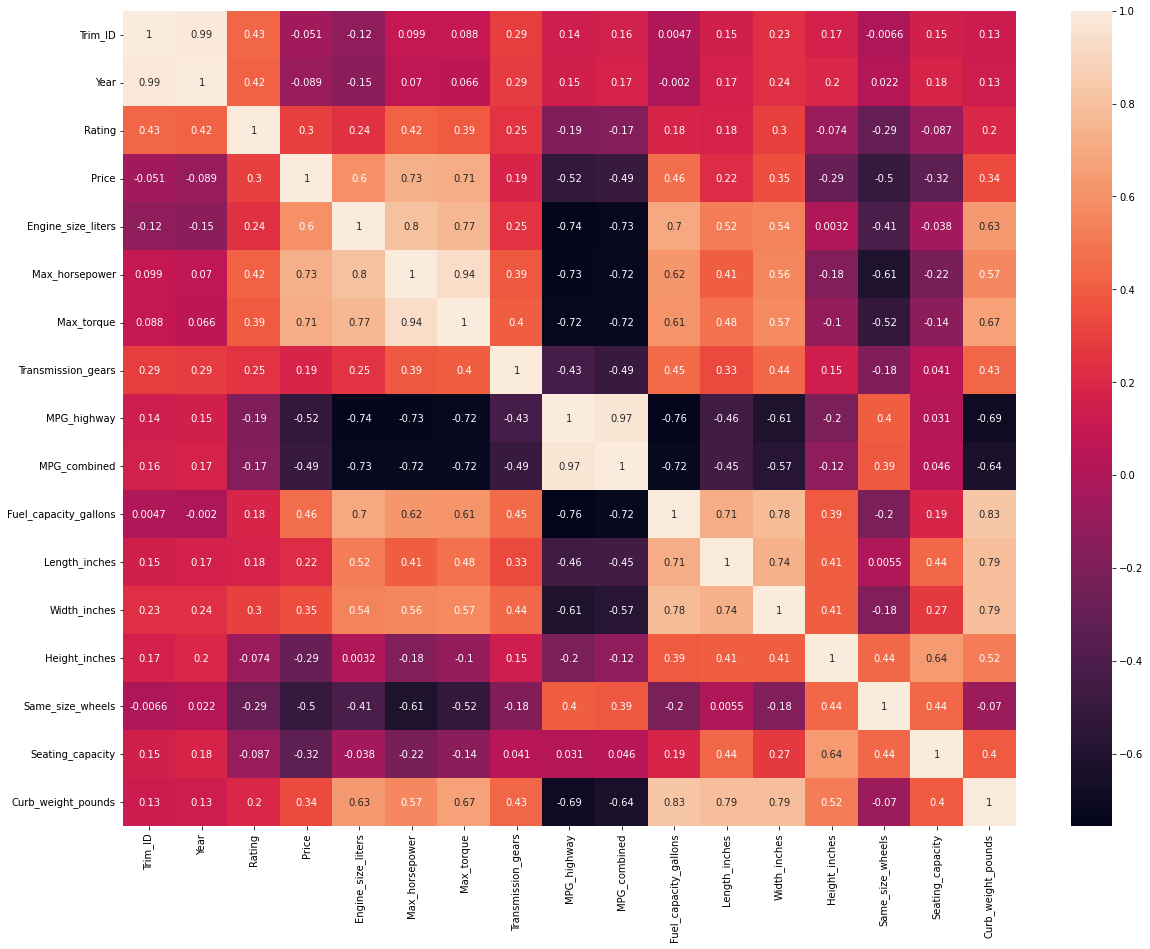

In [ ]:
# create a correlation matrix
# See: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True);

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


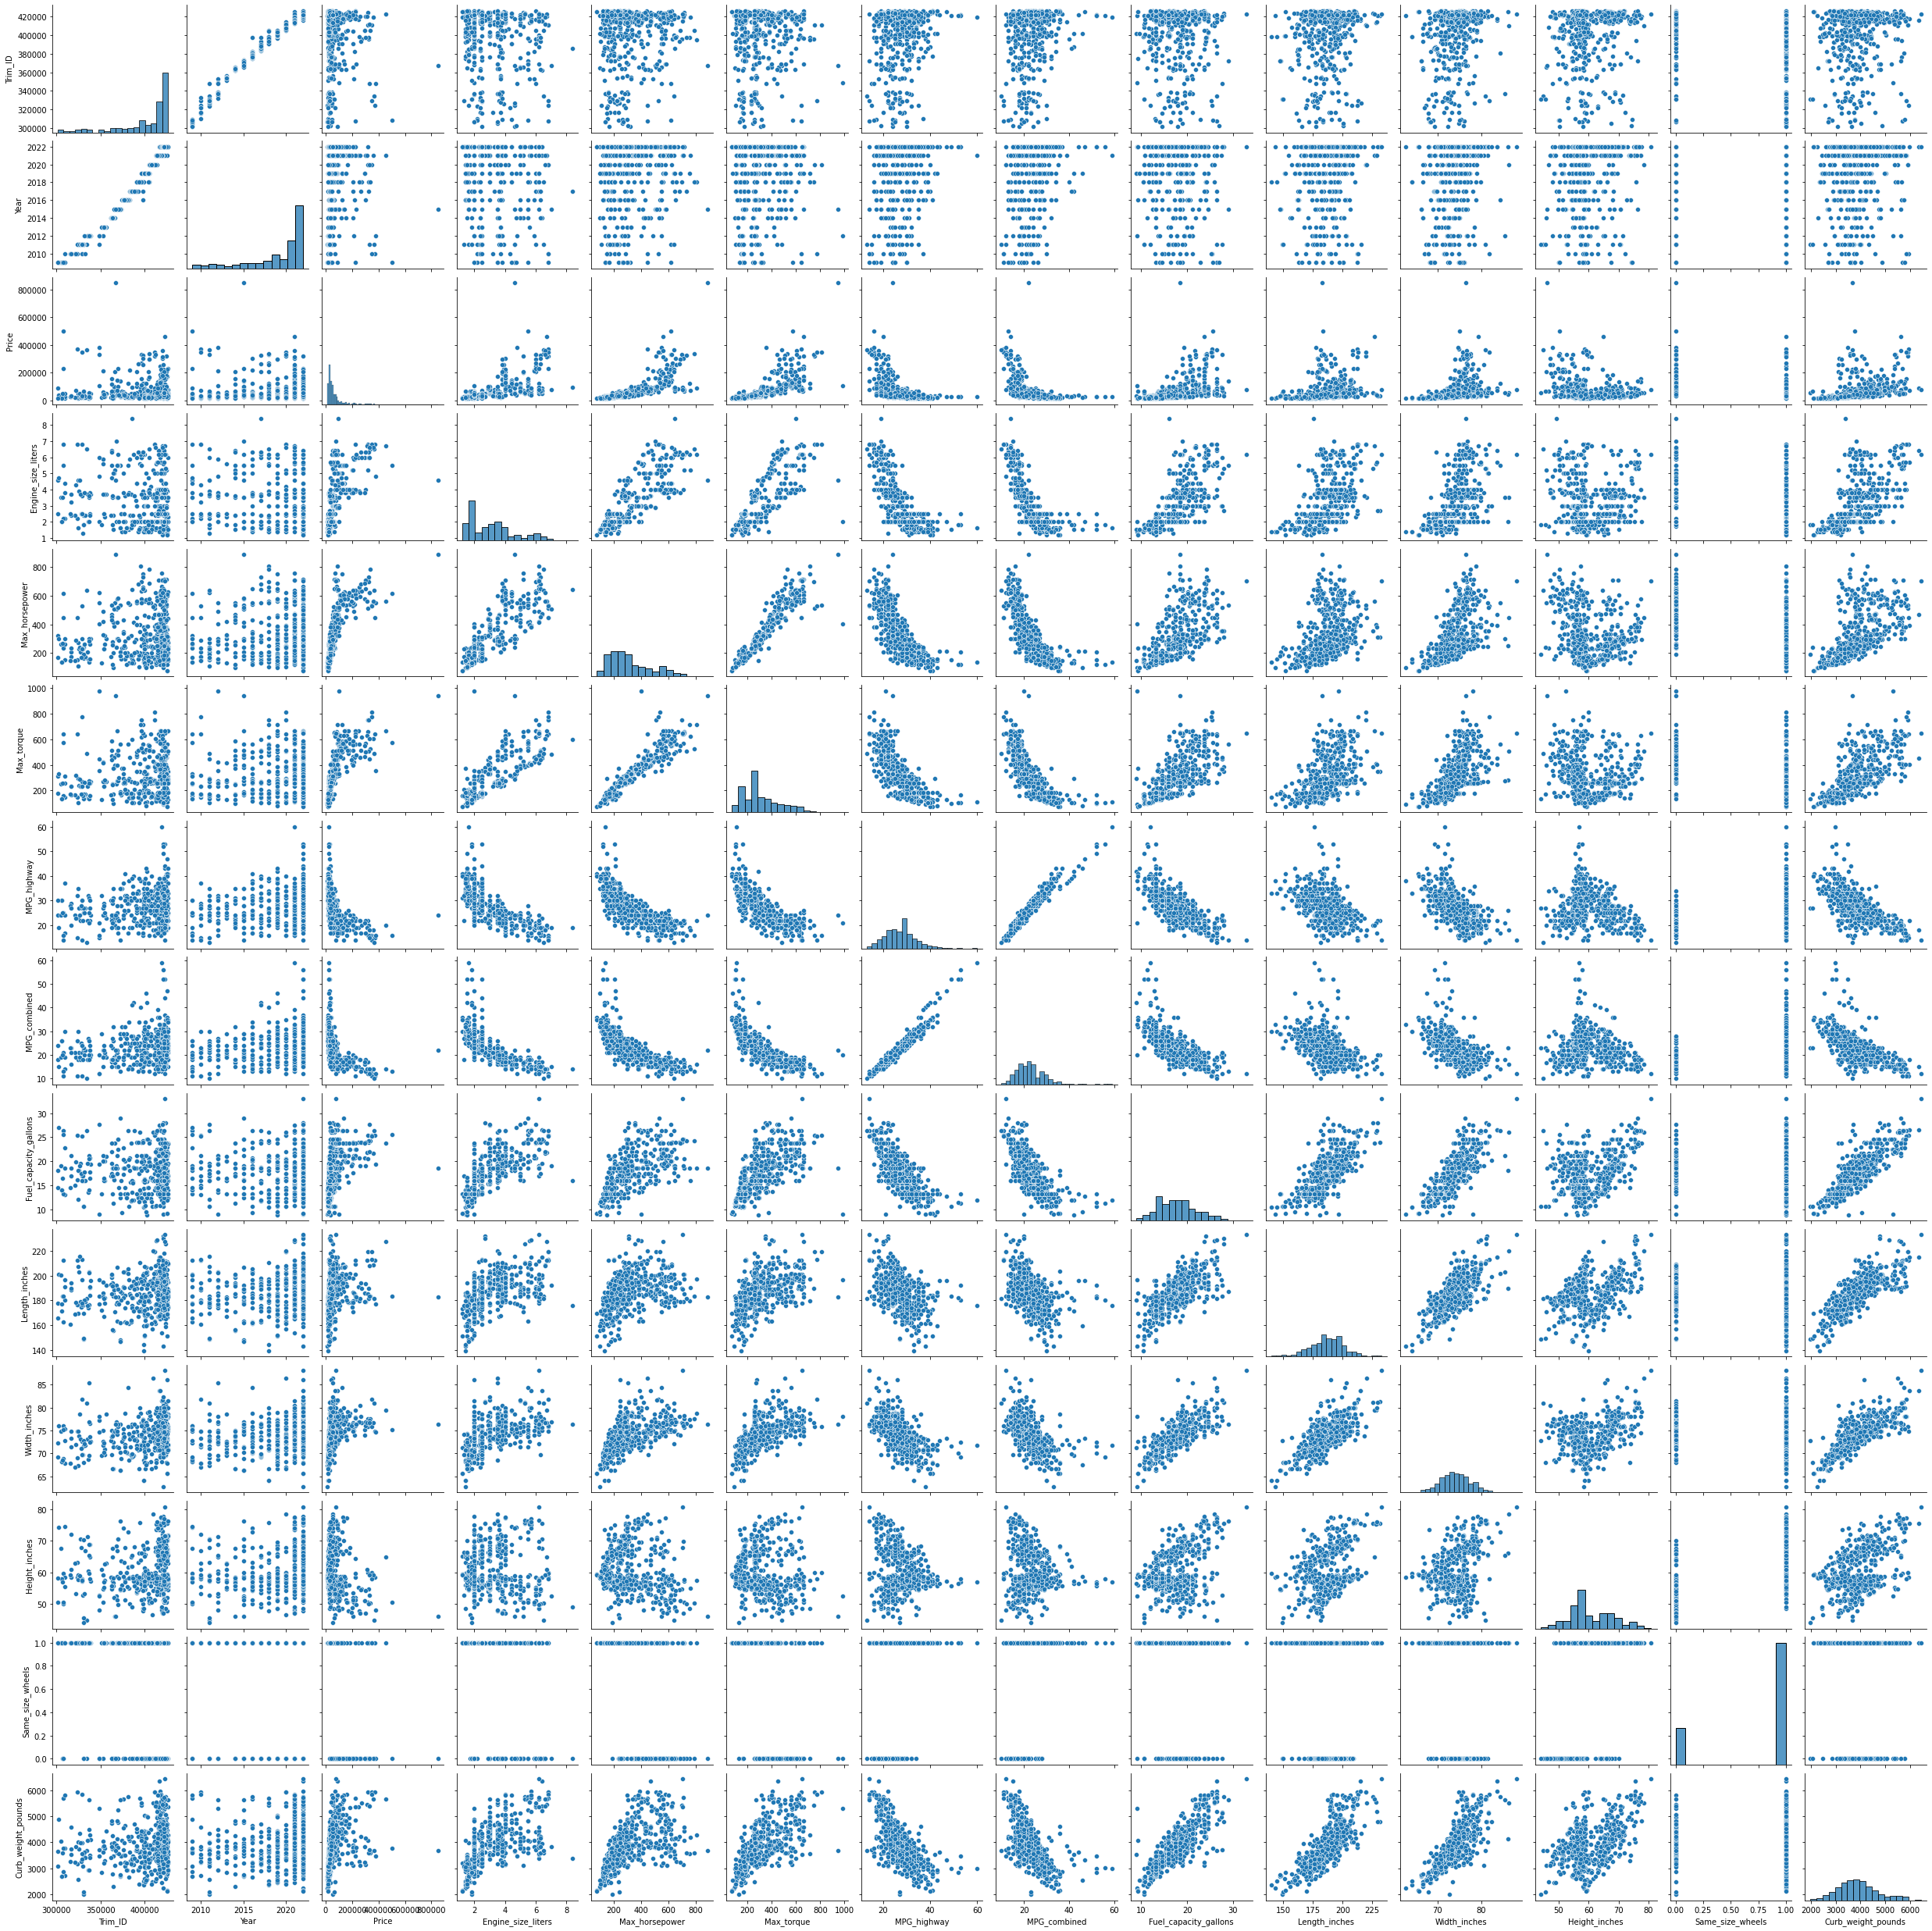

In [ ]:
# Visualize the distribution of numeric variables as pairwise scatterplots
# Warning: this takes a while to run (~2 minutes)

# sns.pairplot(df[numeric_columns]);

# (3) Feature extraction: Text
In this section, I'll use the `Description` column to return a sentiment score (how positive or negative the description is) about the model.

## Sentiment analysis using NLTK's `vader_lexicon`

In [11]:
def get_sentiment_scores(vehicle_specs_df, text_column):
    '''
    Returns a `pandas` `DataFrame` that adds four
    columns with sentiment scores for the text_column
    to the input DataFrame vehicle_score_df.

    ## Parameters
    `vehicle_specs_df` : pandas DataFrame
    This is the DataFrame created from the
    vehicle_specs dictionary by the 
    get_vehicle_specs() function.
    
    `text_column` : str
    The label of the column to use for extracting
    sentiment scores
    
    ## Dependencies
    This function uses the `pandas` and `nltk` packages

    ## Notes
    The sentiment scores produced from this function use
    NLTK's VADER lexicon and the `SentimentIntensityAnalyzer()`
    function based on the vader_lexicon.
    '''
    # import pandas for working with DataFrames
    import pandas as pd
    # import NLTK and download the lexicon (vocabulary) and trained model (vader)
    import nltk
    from nltk.sentiment import SentimentIntensityAnalyzer
    nltk.download('vader_lexicon', quiet=True)
    sia = SentimentIntensityAnalyzer()

    # Create a copy of the input DataFrame and reset its index 
    # in case any rows were dropped (making some values of the index skipped,
    # which would render inaccurate the df.join() at the end)
    df = vehicle_specs_df.reset_index(drop=True)

    sentiment_scores = {
        'Sentiment_overall': [],
        'Sentiment_negative': [],
        'Sentiment_neutral': [],
        'Sentiment_positive': []
    }

    for row in df[text_column].iteritems():
        all_scores = sia.polarity_scores(row[1])
        sentiment_scores['Sentiment_overall'].append(all_scores['compound'])
        sentiment_scores['Sentiment_negative'].append(all_scores['neg'])
        sentiment_scores['Sentiment_neutral'].append(all_scores['neu'])
        sentiment_scores['Sentiment_positive'].append(all_scores['pos'])


    # Create a pandas DataFrame of the sentiment scores
    df_sentiment = pd.DataFrame(sentiment_scores)

    # Join the sentiment scores to the original DataFrame
    return df.join(df_sentiment)

Add to the dataset sentiment scores based on the Description column

In [12]:
# Add sentiment scores to the dataset
print('Before adding sentiment columns\n', 'Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n', sep='')
df = get_sentiment_scores(df, 'Description')
print('After adding sentiment columns\n', 'Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n', sep='')
# Save as a .csv file
df.to_csv('vehicle_specs_plus_text.csv', index=False)
df.head()

Before adding sentiment columns
Rows:	520
Cols:	29



/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


After adding sentiment columns
Rows:	520
Cols:	33



Trim_ID   Make  ... Sentiment_neutral  Sentiment_positive
0   419573  Acura  ...             0.794               0.206
1   423559  Acura  ...             0.892               0.000
2   425066  Acura  ...             0.804               0.196
3   425739  Acura  ...             0.871               0.129
4   424967  Acura  ...             0.728               0.272

[5 rows x 33 columns]

## Sentiment analysis, alternate version using `SentiWordNet`

Resources:
* [SentiWordNet GitHub repo](https://github.com/aesuli/SentiWordNet)
* [SentiWordNet example from NLTK](https://www.nltk.org/howto/sentiwordnet.html)
* [List of NLTK data sources, i.e., `nltk.download(data_source)`](https://www.nltk.org/nltk_data/)
* [WordNet main page](https://wordnet.princeton.edu/)


Steps for this approach:
1. Import packages and download lexical corpora (`sentiwordnet` and `wordnet`)
2. In a loop through text documents (Description column):
 * Remove punctuation
 * Tokenize words (split sentence into list of strings, each item is a single or compound word)
 * Run the [`nltk.pos_tag(word_list)`](https://www.nltk.org/book/ch05.html) function to return the part-of-speech of each word
 * Convert the part-of-speech tag into the common form used by SentiWordNet (i.e., "NN" becomes simply "n", verbs are "v", adjectives are "a", etc.)
 * Assume default meaning of the word (#1 definition for it) -- may be a poor assumption, but working around it could be difficult without human interpretation
 * Run the `sentiwordnet.senti_synset('word.pos_tag.01')` function, save that result to a variable, and then examine the `pos_score()`, `neg_score()`, and `obj_score()`. Note that the positive, negative, and obj (neutral) scores add to 1.
 * Average the positive, negative, and obj (neutral) scores from all the words in each document, and return those averages as the final score for that document

In [ ]:
import re
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
nltk.download('sentiwordnet', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('wordnet2021', quiet=True)

sample_sentence = 'The 2022 Alfa Romeo Giulia appeals to driving enthusiasts with its fun-to-drive personality, sonorous engine, and drop-dead gorgeous styling.'
# sample_sentence = 'The stylish Acura TLX sedan puts sportiness before luxuriousness, and its communicative driving traits and strong value versus some luxe rivals make it an attractive proposition.'
no_punctuation = re.sub(r'[^0-9a-zA-Z-]+', ' ', sample_sentence)
no_extra_spaces = re.sub(r'\s+', ' ', no_punctuation)
words = no_extra_spaces.split()
print(words)
# sent_scores = []

['The', '2022', 'Alfa', 'Romeo', 'Giulia', 'appeals', 'to', 'driving', 'enthusiasts', 'with', 'its', 'fun-to-drive', 'personality', 'sonorous', 'engine', 'and', 'drop-dead', 'gorgeous', 'styling']


In [ ]:
test_synset = swn.senti_synset('enthusiast.n.01')
print(test_synset)
print('pos_score:', test_synset.pos_score())
print('neg_score:', test_synset.neg_score())
print('obj_score:', test_synset.obj_score())

<enthusiast.n.01: PosScore=0.125 NegScore=0.0>
pos_score: 0.125
neg_score: 0.0
obj_score: 0.875


Generate sentiment scores for the words in the list.

References:
* [List of parts of speech from `nltk.pos_tag()`](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html), which uses the Penn TreeBank
* [NLTK's documentation, intro to WordNet](https://www.nltk.org/howto/wordnet.html)
* [StackOverflow answer](https://stackoverflow.com/a/24986059/17005348) demonstrating a technique to convert between Penn TreeBank and WordNet parts of speech tags
* [StackExchange answer](https://linguistics.stackexchange.com/a/6510) with list of WordNet parts of speech abbreviations (note: in place of abbreviations like 'n', 'v', or 'r', you can also use `wordnet.NOUN`, `wordnet.VERB`, `wordnet.ADVERB` etc.)

In [ ]:
# Simplified method, assuming the first synset returned
# is the correct one for the given word

pos_scores = []
neg_scores = []
neu_scores = []
words_used = []
synsets_used = []

for word in words:
    ss = wn.synsets(word)
    # Generate a sentiment score based on the first 
    # word in the synset for the given word as long as
    # print(ss)
    if ss:
        synsets_used.append(ss[0].name())
        words_used.append(word)
        senti_score = swn.senti_synset(ss[0].name())
        pos_scores.append(senti_score.pos_score())
        neg_scores.append(senti_score.neg_score())
        neu_scores.append(senti_score.obj_score())

print('Averaged scores for the sentence', 
      '\nPositive:\t', round(sum(pos_scores) / len(pos_scores), 3),
      '\nNegative:\t', round(sum(neg_scores) / len(neg_scores), 3),
      '\nNeutral:\t', round(sum(neu_scores) / len(neu_scores), 3),
      '\nPos-neg:\t', round((sum(pos_scores) - sum(neg_scores)) / len(pos_scores), 3)
)

print('\nOriginal sentence:', sample_sentence)
print('Tokenized sentence:', words)
print('Words used:', words_used)
print('Synsets used:', synsets_used)

Averaged scores for the sentence 
Positive:	 0.091 
Negative:	 0.045 
Neutral:	 0.864 
Pos-neg:	 0.045

Original sentence: The 2022 Alfa Romeo Giulia appeals to driving enthusiasts with its fun-to-drive personality, sonorous engine, and drop-dead gorgeous styling.
Tokenized sentence: ['The', '2022', 'Alfa', 'Romeo', 'Giulia', 'appeals', 'to', 'driving', 'enthusiasts', 'with', 'its', 'fun-to-drive', 'personality', 'sonorous', 'engine', 'and', 'drop-dead', 'gorgeous', 'styling']
Words used: ['Romeo', 'appeals', 'driving', 'enthusiasts', 'its', 'personality', 'sonorous', 'engine', 'drop-dead', 'gorgeous', 'styling']
Synsets used: ['romeo.n.01', 'entreaty.n.01', 'drive.n.06', 'enthusiast.n.01', 'information_technology.n.01', 'personality.n.01', 'heavy.s.15', 'engine.n.01', 'drop-dead.r.01', 'gorgeous.s.01', 'style.v.01']


In [ ]:
# More advanced method to improve accuracy by labeling words with
# their parts of speech. Converts Penn TreeBank part-of-speech tags
# returned by nltk.pos_tag(word_list) into the part-of-speech abbreviations
# used by WordNet and SentiWordNet

# Download the dependency for word tagging (part-of-speech)
nltk.download('averaged_perceptron_tagger', quiet=True)
parts_of_speech = nltk.pos_tag(words)
# -----------------------------

# List compiled from:
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# https://linguistics.stackexchange.com/questions/6508/which-part-of-speech-are-s-and-r-in-wordnet/6510#6510
pos_conversion = {
    'NN': 'n',
    'NNS': 'n',
    'PRP': 'n',
    'PRP$': 'n',
    'WP': 'n',
    'WP$': 'n',
    'JJ': 'a',
    'JJR': 'a',
    'JJS': 'a',
    'VB': 'v',
    'VBD': 'v',
    'VBG': 'v',
    'VBN': 'v',
    'VBP': 'v',
    'VBZ': 'v',
    'RB': 'r',
    'RBR': 'r',
    'RBS': 'r',
    'WRB': 'r'
}

pos_scores = []
neg_scores = []
neu_scores = []
words_used = []
synsets_used = []

for word, pos in parts_of_speech:
    if pos in pos_conversion.keys():
        ss = wn.synsets(word, pos=pos_conversion[pos])
        # print(ss)
        # Generate a sentiment score based on the first 
        # word in the synset for the given word as long as
        # the ss list isn't empty (empty lists are False)
        if ss:
            synsets_used.append(ss[0].name())
            words_used.append(word)
            senti_score = swn.senti_synset(ss[0].name())
            pos_scores.append(senti_score.pos_score())
            neg_scores.append(senti_score.neg_score())
            neu_scores.append(senti_score.obj_score())

print('Averaged scores for the sentence', 
      '\nPositive:\t', round(sum(pos_scores) / len(pos_scores), 3),
      '\nNegative:\t', round(sum(neg_scores) / len(neg_scores), 3),
      '\nNeutral:\t', round(sum(neu_scores) / len(neu_scores), 3),
      '\nPos-neg:\t', round((sum(pos_scores) - sum(neg_scores)) / len(pos_scores), 3)
)

print('\nOriginal sentence:', sample_sentence)
print('Tokenized sentence:', words)
print('Words used:', words_used)
print('Synsets used:', synsets_used)

Averaged scores for the sentence 
Positive:	 0.125 
Negative:	 0.031 
Neutral:	 0.844 
Pos-neg:	 0.094

Original sentence: The 2022 Alfa Romeo Giulia appeals to driving enthusiasts with its fun-to-drive personality, sonorous engine, and drop-dead gorgeous styling.
Tokenized sentence: ['The', '2022', 'Alfa', 'Romeo', 'Giulia', 'appeals', 'to', 'driving', 'enthusiasts', 'with', 'its', 'fun-to-drive', 'personality', 'sonorous', 'engine', 'and', 'drop-dead', 'gorgeous', 'styling']
Words used: ['appeals', 'driving', 'enthusiasts', 'its', 'personality', 'sonorous', 'engine', 'gorgeous']
Synsets used: ['entreaty.n.01', 'drive.v.01', 'enthusiast.n.01', 'information_technology.n.01', 'personality.n.01', 'heavy.s.15', 'engine.n.01', 'gorgeous.s.01']


# (4) Feature extraction: Images
Use the Image_URL column to examine each image and return the dominant color (a proxy for the vehicle color) to see what vehicle colors are most commonly used in image and to provide useful information about the image.

Since all images are of vehicles, entity extraction might not be as informative (every row would likely return an entity like "car", "truck", "vehicle", "tires", "road", "window", etc.). Thus, I will instead apply k-means clustering to return the dominant color (hopefully the vehicle color if the image has a plain white background) and extract that feature to include in the dataset.

**References**
* [Finding an image's dominant color using k-means](https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/)
* [Python Data Science Handbook: using k-means to reduce colors in image](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-2:-k-means-for-color-compression); also [sklearn docs example](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html)
* [Get the Dominant Colors of an Image with K-Means – Predictive Hacks](https://predictivehacks.com/get-the-dominant-colors-of-an-image-with-k-means/)
* [Name of the most-used colors in an image](https://predictivehacks.com/most-dominant-color-of-an-image/)
* [Download an image using `requests`](https://docs.python-requests.org/en/latest/user/quickstart/#binary-response-content)

## Demonstration of methodology

In a loop through the image URLs, the following actions will be performed:
1. retrieve the image as a Pillow `Image` object
2. divide the image into a 3x3 grid
3. crop to the center of the 3x3 grid (which should focus on the vehicle, rather than the background)
4. with the cropped image, reshape the array of (width, height, (R,G,B)) pixels into a 2-dimensional array (or list) of pixel RGB tuples
5. apply the `sklearn.cluster.KMeans`estimator to the reshaped array to find the main color groupings of the input image
6. return the cluster with the greatest number of pixels as the 'dominant' color of that image
7. label the RGB value from the center of the largest cluster based on the nearest named HTML color to that RGB value (there are [140 named HTML colors](https://www.w3schools.com/tags/ref_colornames.asp); see also [W3 SVG color reference](https://www.w3.org/TR/SVG11/types.html#ColorKeywords))
8. return the color name as the extracted feature from that image


The goal is to find the vehicle color from each image and add Vehicle_color as a column in the dataset.

## Load and crop image to center of a 3x3 grid
The center of the 3x3 grid will focus mostly on the vehicle, rather than the background, so the vehicle color will likely be the most common color in that cropped image.

Image dimensions (w x h)
(800, 489)


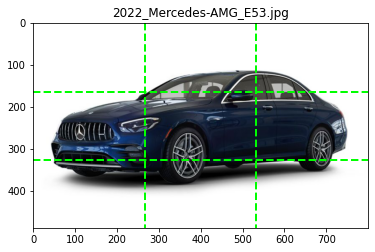


Cropped image dimensions (w x h)
(266, 163)


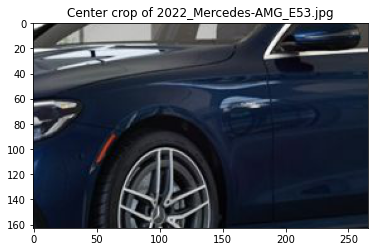

In [13]:
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import requests
import random

# display the image. See: https://stackoverflow.com/a/35061341/17005348
# from IPython import display
# display(display.Image(url=img_url))

# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']
# Retrieve the content of the img_url, a binary object (i.e., a file, made of bytes rather than text)
pil_img = Image.open(BytesIO(requests.get(img_url).content))
print('Image dimensions (w x h)\n', pil_img.size, sep='')
# Display the image using Matplotlib's plotting function
plt.imshow(pil_img)

# Capture the final 4 characters of the URL (the image type)
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')

# Optional: create file object and save its data to Google Colab's working directory
# with open(file=filename, mode='wb+') as f:
#     f.write(pil_img)

img_width = pil_img.size[0]
img_height = pil_img.size[1]

# Create [x,y] lists to draw 4 lines on the image to separate it into a 3x3 grid
# See: https://www.kite.com/python/answers/how-to-draw-a-line-between-two-points-in-matplotlib-in-python
# Also: https://www.geeksforgeeks.org/plot-a-point-or-a-line-on-an-image-with-matplotlib/
line_endpoints = [
    [img_width / 3, 0],                  # top coordinate of first (left) vertical line
    [img_width / 3, img_height],         # bottom coordinate of first vertical line
    [(img_width / 3) * 2, 0],            # top coordinate of second (right) vertical line
    [(img_width / 3) * 2, img_height],   # bottom coordinate of second vertical line
    [0, img_height / 3],                 # top-left coordinate of first (top) horizontal line
    [img_width, img_height / 3],         # top-right coordinate of first horizontal line
    [0, (img_height / 3) * 2],           # top-left coordinate of second (bottom) horizontal line
    [img_width, (img_height / 3) * 2]    # top-right coordinate of second horizontal line
]
# https://matplotlib.org/stable/gallery/color/named_colors.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
x_coors = [item[0] for item in line_endpoints]
y_coors = [item[1] for item in line_endpoints]
# Draw 3x3 gridlines on the image
plt.plot(x_coors[:2], y_coors[:2], color='lime', linestyle='dashed', linewidth=2)
plt.plot(x_coors[2:4], y_coors[2:4], color='lime', linestyle='dashed', linewidth=2)
plt.plot(x_coors[4:6], y_coors[4:6], color='lime', linestyle='dashed', linewidth=2)
plt.plot(x_coors[6:], y_coors[6:], color='lime', linestyle='dashed', linewidth=2)
plt.title(filename)
plt.imshow(pil_img)
plt.show()

# Display a cropped version of the image that contains only the middle rectangle
# when the image is divided into a 3x3 grid. 
# That middle section will assist in identifying the dominant color, since
# it focuses on the vehicle rather than on the surroundings

# (x,y) coordinates as a list
one_third_width = int(pil_img.size[0] / 3)
one_third_height = int(pil_img.size[1] / 3)
top_left = [one_third_width, one_third_height]
bottom_right = [one_third_width * 2, one_third_height * 2]
# alternately, without storing values as variables first:
# top_left = [int(pil_img.size[0] / 3), int(pil_img.size[1] / 3)]
# bottom_right = [int((pil_img.size[0] / 3) * 2), int((pil_img.size[1] / 3) * 2)]
center_crop = pil_img.crop((top_left[0], top_left[1], bottom_right[0], bottom_right[1]))
print('\nCropped image dimensions (w x h)\n', center_crop.size, sep='')
plt.title('Center crop of ' + filename)
plt.imshow(center_crop)
plt.show()
# Or...
# display.Image(filename='PIL_' + filename)

## Reduce the size of the image to speed up processing

Reduced image dimensions (w x h)
(67, 41)


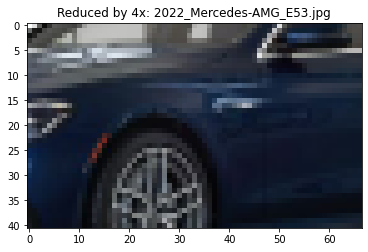

In [14]:
# Method 1: using the center_crop already created
factor = 4
small_img_test = center_crop.reduce(factor=factor)
print('Reduced image dimensions (w x h)\n', small_img_test.size, sep='')
plt.title(f'Reduced by {factor}x: ' + filename)
plt.imshow(small_img_test)
plt.show()

Reduced image dimensions (w x h)
(67, 41)


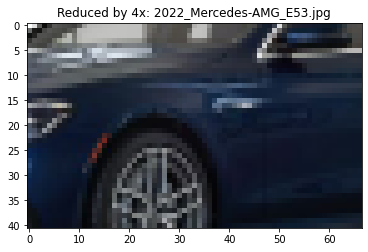

In [15]:
# Method 2: skip the center_crop step and combine into a single step
factor = 4
small_img_test = pil_img.reduce(factor=factor, box=(top_left[0], top_left[1], bottom_right[0], bottom_right[1]))
print('Reduced image dimensions (w x h)\n', small_img_test.size, sep='')
plt.title(f'Reduced by {factor}x: ' + filename)
plt.imshow(small_img_test)
plt.show()

Resized image dimensions (w x h)
(66, 40)


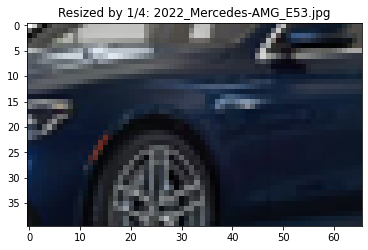

In [16]:
# Method 3: resize the image by a factor of 1/2 instead of reducing it
# This produces a better-looking image, but might be slower
factor = 4
width = int(center_crop.size[0] / factor)
height = int(center_crop.size[1] / factor)
small_img_test = center_crop.resize(size=(width,height))
print('Resized image dimensions (w x h)\n', small_img_test.size, sep='')
plt.title(f'Resized by 1/{factor}: ' + filename)
plt.imshow(small_img_test)
plt.show()

Resized image dimensions (w x h)
(66, 40)


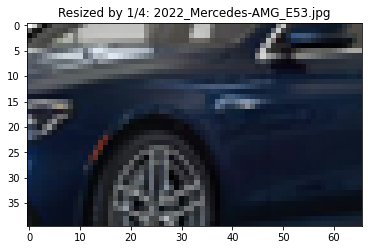

In [17]:
# Method 4: same as method 3, but uses the original image rather than center_crop
factor = 4
one_third_width = int(pil_img.size[0] / 3)
one_third_height = int(pil_img.size[1] / 3)
new_width = int(one_third_width / factor)
new_height = int(one_third_height / factor)
small_img_test = pil_img.resize(size=(new_width, new_height), 
                                box=(one_third_width, one_third_height, 
                                     one_third_width * 2, one_third_height * 2)
                                )
print('Resized image dimensions (w x h)\n', small_img_test.size, sep='')
plt.title(f'Resized by 1/{factor}: ' + filename)
plt.imshow(small_img_test)
plt.show()

## Reshape the image into a 2D Numpy array
Now that we have the reduced the dimensions of the center crop, we'll reshape the image to a 2D array of shape (n_pixels, 3), where each row is one pixel and the three columns represent RGB values of that pixel. K-means will then cluster those pixels based on color similarity, creating groups of similar colors.

In [18]:
# We'll use Numpy to reshape the input image
import numpy as np

# First, use method 2 above to reduce the image dimensions
factor = 4
one_third_width = int(round(pil_img.size[0] / 3, 0))
one_third_height = int(round(pil_img.size[1] / 3, 0))
reduced_img = pil_img.reduce(factor=factor, 
                             box=(one_third_width, one_third_height, 
                                  one_third_width * 2, one_third_height * 2))

# Next, reshape the image into a 2D array (# rows = number of pixels, # columns = 3, for RGB)
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
pixel_array = np.array(reduced_img)
print('Dimensions: array of pixels (h, w, RGB)\n', pixel_array.shape, sep='')
h, w, c = pixel_array.shape
pixel_array = np.reshape(pixel_array, (w * h, c))
print('New dimensions: array of pixels (h * w, RGB)\n', pixel_array.shape, sep='')

# Optional: divide by 255 to normalize RGB values on a 0-1 scale
# According to the reference linked above, this helps plt.imshow() display the image
# pixel_array = pixel_array / 255

Dimensions: array of pixels (h, w, RGB)
(41, 67, 3)
New dimensions: array of pixels (h * w, RGB)
(2747, 3)


In [19]:
pd.DataFrame(data=pixel_array, columns=['Red', 'Green', 'Blue']).head(5)

Red  Green  Blue
0  251    252   252
1  196    196   194
2   60     60    58
3   15     15    13
4   66     66    64

## Image pre-processing function
This function combines the above steps into a single function.

In [20]:
def preprocess_image(img_path, is_url=True, scale_factor=4, scale_mode='resize', 
                     crop_center=True, display_img=False, quiet=False, scale_rgb=False):
    '''
    Retrieve an image from a URL, crop it to the center tile of
    a 3x3 grid from the image, scale the image down to reduce its
    dimensionality, and then reshape the image pixels into a `numpy`
    array of dimensions [n_pixels, 3], with as many rows as their
    are pixels in the image (width * height), and three columns
    with the Red, Blue, and Green values of each pixel.

    ## Parameters
    `img_path` : str
    The URL or path of the image to be processed.

    `is_url` : bool, default=True
    If `img_path` is a URL to an image, set this parameter to `True`.
    Otherwise, the `img_path` must be a file path to the image.
    
    `scale_factor` : int, default=4
    The factor by which the image will be downsized to reduce its
    dimensionality and speed up processing. The resulting dimensions
    of the image will be: (width / scale_factor, height / scale_factor).

    `scale_mode` : {'resize', 'reduce'}, default='resize'
    Sets the Pillow function to use for rescaling the image. 
    When rescaling by a small scale_factor (such as 2), `resize`
    produces a more accurate picture, but is slower than `rescale`.
    For scale_factor values greater than 2, both methods produce
    similar performance and resulting images.
    
    `crop_center` : bool, default=True
    Whether to crop the image to the center of a 3x3 grid prior
    to rescaling the image. This is most helpful when the center
    of the image focuses on the subject of interest rather than
    the unimportant background of the image.
    
    `display_img` : bool, default=False
    Whether to display the image as it is processed.

    `quiet` : bool, default=False
    Set to True to prevent the function from printing any output.

    `scale_rgb` : bool, default=False
    If True, scale RGB values on a [0,1] scale by dividing
    each value by 255. Some functions work best with scaled
    RGB values. For example, see: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
    This setting impacts only the NumPy array returned
    from this function and does not affect earlier steps.

    ## Dependencies
    This function uses the following packages and modules:
    * `Pillow`
    * `requests`
    * `numpy`
    * `matplotlib.pyplot`
    * `io.BytesIO()`
    '''
    # for loading and working with images
    from PIL import Image
    # for reshaping the image into a 2D array
    import numpy as np

    # Optional imports, depending on settings
    if is_url:
        # for requesting images from URLs
        import requests
        # for converting bytes objects (image files) into PIL image objects
        from io import BytesIO

    if display_img:
        # for displaying the image as it is processed
        import matplotlib.pyplot as plt
    
    # ========================
    # Load the image
    # ========================
    if is_url:
        # Retrieve the content of the img_url, a binary object (i.e., a file, made of bytes rather than text)
        pil_img = Image.open(BytesIO(requests.get(img_path).content))
    else:
        pil_img = Image.open(img_path)
    
    # Record image size
    img_width = pil_img.size[0]
    img_height = pil_img.size[1]
    if not quiet:
        print(f'Input image dimensions: width={img_width}, height={img_height}')

    if display_img:
        # Display the image using Matplotlib's plotting function
        plt.imshow(pil_img)
        plt.show()

    # =============================
    # Divide image into 3x3 grid
    # =============================
    if crop_center:
        # (x,y) coordinates for the bounding box surrounding
        # the center grid section of a 3x3 grid
        one_third_width = int(round(img_width / 3, 0))
        one_third_height = int(round(img_height / 3, 0))
        
        left = one_third_width
        top = one_third_height
        right = one_third_width * 2
        bottom = one_third_height * 2
        box_center = (left, top, right, bottom)

        if not quiet:
            print('\nImage cropped to center of 3x3 grid.', 
                f'\nNew dimensions: width={one_third_width}, height={one_third_height}\n', sep='') 

        if display_img:
            # Create [x,y] lists to draw 4 lines on the image to separate it into a 3x3 grid
            # See: https://www.kite.com/python/answers/how-to-draw-a-line-between-two-points-in-matplotlib-in-python
            # Also: https://www.geeksforgeeks.org/plot-a-point-or-a-line-on-an-image-with-matplotlib/
            line_endpoints = [
                [img_width / 3, 0],                  # top coordinate of first (left) vertical line
                [img_width / 3, img_height],         # bottom coordinate of first vertical line
                [(img_width / 3) * 2, 0],            # top coordinate of second (right) vertical line
                [(img_width / 3) * 2, img_height],   # bottom coordinate of second vertical line
                [0, img_height / 3],                 # top-left coordinate of first (top) horizontal line
                [img_width, img_height / 3],         # top-right coordinate of first horizontal line
                [0, (img_height / 3) * 2],           # top-left coordinate of second (bottom) horizontal line
                [img_width, (img_height / 3) * 2]    # top-right coordinate of second horizontal line
            ]
            # https://matplotlib.org/stable/gallery/color/named_colors.html
            # https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
            x_coors = [item[0] for item in line_endpoints]
            y_coors = [item[1] for item in line_endpoints]
            # Draw 3x3 gridlines on the image
            plt.plot(x_coors[:2], y_coors[:2], color='lime', linestyle='dashed', linewidth=2)
            plt.plot(x_coors[2:4], y_coors[2:4], color='lime', linestyle='dashed', linewidth=2)
            plt.plot(x_coors[4:6], y_coors[4:6], color='lime', linestyle='dashed', linewidth=2)
            plt.plot(x_coors[6:], y_coors[6:], color='lime', linestyle='dashed', linewidth=2)
            plt.title('3x3 grid')
            plt.imshow(pil_img)
            plt.show()
            # Display only the cropped portion
            plt.title('Center of 3x3 grid')
            plt.imshow(pil_img.crop(box=(left, top, right, bottom)))
            plt.show()
    
    # ======================================
    # Rescale image to reduce dimensionality
    # ======================================
    if scale_mode == 'resize':
        if crop_center:
            new_width = int(round(one_third_width / scale_factor, 0))
            new_height = int(round(one_third_height / scale_factor, 0))
            img_rescaled = pil_img.resize(
                size=(new_width, new_height), 
                box=(left, top, right, bottom))
        else:
            new_width = int(round(img_width / scale_factor, 0))
            new_height = int(round(img_height / scale_factor, 0))
            img_rescaled = pil_img.resize(size=(new_width, new_height))
    else:
        # scale_mode is 'reduce'
        if crop_center:
            img_rescaled = pil_img.reduce(
                factor=scale_factor, 
                box=(left, top, right, bottom))
        else:
            new_width = int(round(img_width / scale_factor, 0))
            new_height = int(round(img_height / scale_factor, 0))
            img_rescaled = pil_img.reduce(factor=scale_factor)
    
    if not quiet:
        print(f'Resized by 1/{scale_factor}x')
        print(f'Resized image dimensions: width={img_rescaled.size[0]}, height={img_rescaled.size[1]}\n')
    # Display the resized image
    if display_img:
        plt.title(f'Resized by 1/{scale_factor}x')
        plt.imshow(img_rescaled)
        plt.show()

    # ==================================================
    # Reshape image to a 2D array of shape [n_pixels, 3]
    # ==================================================
    # # rows = number of pixels, # columns = 3 (for RGB)
    # Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html
    pixel_array = np.array(img_rescaled)
    h, w, c = pixel_array.shape
    pixel_array = np.reshape(pixel_array, (w * h, c))
    if scale_rgb:
        # scale RGB values on [0, 1] scale rather than [0, 255]
        pixel_array = pixel_array / 255
    if not quiet:
        print('Image converted to pixel array of shape (height * width, RGB): ', pixel_array.shape, sep='')

    # ================================
    # Return the processed image array
    # ================================
    return pixel_array

Demonstrate usage of the function

In [36]:
import random
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']
# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')

print('Processing... ', filename, '\n', sep='')

pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='resize', 
    crop_center=True, 
    display_img=False,
    quiet=False,
    scale_rgb=False)

print('\nRGB values of first five pixels...')
pd.DataFrame(data=pixel_array, columns=['Red', 'Green', 'Blue']).head(5)

Processing... 2022_Honda_Civic.jpg

Input image dimensions: width=800, height=489

Image cropped to center of 3x3 grid.
New dimensions: width=267, height=163

Resized by 1/4x
Resized image dimensions: width=67, height=41

Image converted to pixel array of shape (height * width, RGB): (2747, 3)

RGB values of first five pixels...


Red  Green  Blue
0  132    138   136
1  122    128   126
2  105    114   111
3   93    103    99
4  118    130   126

Test function with picture display

Processing... 2022_Ferrari_Roma.jpg

Input image dimensions: width=800, height=489


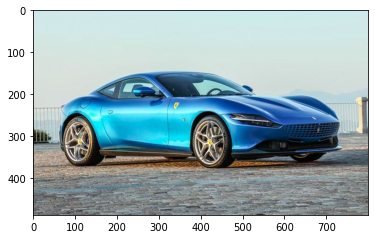


Image cropped to center of 3x3 grid.
New dimensions: width=267, height=163



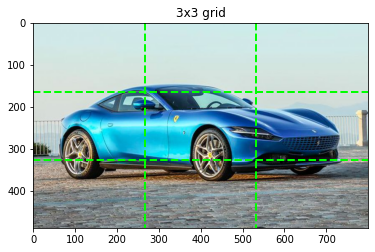

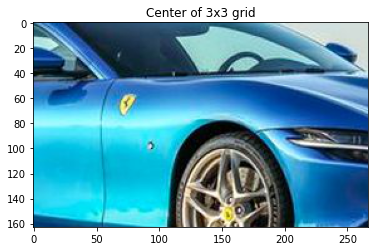

Resized by 1/4x
Resized image dimensions: width=67, height=41



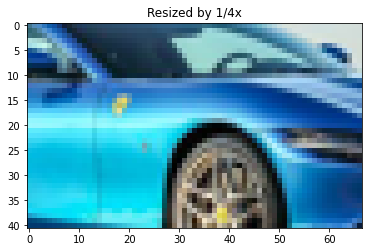

Image converted to pixel array of shape (height * width, RGB): (2747, 3)

RGB values of first five pixels...


Red  Green  Blue
0   67    117   141
1   83    138   182
2   77    140   199
3   45    118   189
4   15     94   170

In [37]:
import random
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']
# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')

print('Processing... ', filename, '\n', sep='')

pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='resize', 
    crop_center=True, 
    display_img=True,
    quiet=False, 
    scale_rgb=False)

print('\nRGB values of first five pixels...')
pd.DataFrame(data=pixel_array, columns=['Red', 'Green', 'Blue']).head(5)

Timing comparison between scale_modes `resize` and `reduce`.

Uncomment the first line in each cell below (`%%timeit...`) to compare performance.

---

**Here are my results:**
* Using `scale_mode='resize'` (first cell below)
  * 3 loops, best of 3: 131 ms per loop
* Using `scale_mode='reduce'` (second cell below)
 * The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 129 ms per loop

In [23]:
# Uncomment the line below to run a timing comparison (3 loops of 3 iterations)
# %%timeit -r 3 -n 3
import random
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']
# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')

print('Processing... ', filename, '\n', sep='')

pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='resize', 
    crop_center=True, 
    display_img=False,
    quiet=True, 
    scale_rgb=False)

Processing... 2022_BMW_X1.jpg

Processing... 2018_Infiniti_QX80.jpg

Processing... 2022_Honda_Insight.jpg

Processing... 2022_GMC_Canyon.jpg

Processing... 2020_Lexus_GS-F.jpg

Processing... 2022_BMW_7-Series.jpg

Processing... 2022_Hyundai_Venue.jpg

Processing... 2022_Jeep_Renegade.jpg

Processing... 2022_Bentley_Flying-Spur.jpg

3 loops, best of 3: 131 ms per loop


In [24]:
# Uncomment the line below to run a timing comparison (3 loops of 3 iterations)
# %%timeit -r 3 -n 3
import random
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']
# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')

print('Processing... ', filename, '\n', sep='')

pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='reduce', 
    crop_center=True, 
    display_img=False,
    quiet=True,
    scale_rgb=False)

Processing... 2017_Mitsubishi_Lancer.jpg

Processing... 2011_Chevrolet_Aveo.jpg

Processing... 2020_Buick_Regal-Sportback.jpg

Processing... 2022_Jeep_Gladiator.jpg

Processing... 2009_Kia_Spectra5.jpg

Processing... 2022_BMW_X4-M.jpg

Processing... 2022_Audi_S3.jpg

Processing... 2019_Lincoln_MKT.jpg

Processing... 2015_Mini_Cooper-Paceman-S-/-JCW.jpg

The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
3 loops, best of 3: 129 ms per loop


## Determine the optimal number of clusters
To find the dominant color in the image, we'll use k-means clustering to find the center (RGB value) of the largest cluster, which represents the dominant color in the image. 

In this section, we'll determine which number of clusters produces the best results, testing 2-10 clusters and returning the optimal number for our image.

In [25]:
# Demonstration of using collections.Counter, 
# which I use in the scoring functions in this section.
# See: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
from collections import Counter
test_list = list('caravan')
groups = Counter(test_list)
print('All groups\n', dict(groups), '\n', sep='')
print('Largest groups, descending order\n', groups.most_common(), sep='')

All groups
{'c': 1, 'a': 3, 'r': 1, 'v': 1, 'n': 1}

Largest groups, descending order
[('a', 3), ('c', 1), ('r', 1), ('v', 1), ('n', 1)]


### Silhouette score
The `sklearn.metrics.silhouette_score()` is an average of the silhoutte coefficients for each data point. A silhoutte score ranges from [-1, 1], where 1 means that the data point is very far from all other clusters besides its own, 0 means that a point is on a boundary line between cluster assignments, and -1 means the point's cluster assignment is likely misclassified because it is closer to a different closer than the one it was assigned to.

**In summary, higher scores (those closest to 1) are best.**

**References**
* [Silhoutte analysis, sklearn docs](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [26]:
def optimal_nclusters_silhouette(data, max_clusters=10, random_state=0, return_dict='best', quiet=False):
    '''
    Calculates the silhouette score from 2 to max_clusters
    clusters and returns a dictionary with information on
    the optimal number of clusters.

    Silhouette scores range from [-1, 1], and 1 is the best.

    ## Parameters
    `data` : {array, matrix}
    The data (usually called X in sklearn) upon which
    to apply clustering. For image clustering, this
    should be a NumPy array of shape [n_pixels, 3], or one
    row for every pixel, with three columns representing
    the Red, Green, and Blue values of the pixel on that row.

    `max_clusters` : int, default=10
    The maximum number of clusters to test. This function
    applies the MiniBatchKMeans algorithm from 2 to
    max_clusters number of clusters

    `random_state` : int, default=0
    Set the random_state to some integer for best comparison
    between number of clusters. 
    Set to `None` to enable different random selections
    for each number of clusters (not recommended).

    `return_dict` : {'best', 'all'}, default='best'
    Sets the return value for this function. Default 'best'
    returns a dictionary with information on the optimal
    number of clusters. Set to 'all' to view comparison
    information across cluster groups.

    `quiet` : bool, default=False
    Set to True to prevent the function from printing any output.

    ## Dependencies
    This function relies on the following:
    * `sklearn.metrics.silhouette_score`
    * `sklearn.cluster.MiniBatchKMeans`
    * `collections.Counter`

    ### Notes
    For more info, see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
    Example functionality: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    '''
    from sklearn.metrics import silhouette_score
    # MiniBatchKMeans is faster that KMeans and produces almost equivalent results
    from sklearn.cluster import MiniBatchKMeans
    # Counter is used to count the number of pixels in each cluster
    from collections import Counter

    cluster_scores = {
        'n_clusters': [],
        'Silhouette_score': [],
        'dominant_rgb': [],
        'Cluster_sizes': []
    }

    for n in range(2, max_clusters+1):
        # Fit the clusterer and predict cluster labels
        kmeans = MiniBatchKMeans(n_clusters=n, random_state=random_state).fit(data)
        # Compute the average silhouette score for the model
        silhouette_avg = silhouette_score(X=data, labels=kmeans.labels_)
        
        cluster_scores['n_clusters'].append(n)
        cluster_scores['Silhouette_score'].append(silhouette_avg)
        # Group labels to compare size of groups
        # See: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
        label_counts = Counter(kmeans.labels_)

        # Find the name (integer) of the largest cluster
        largest_cluster = label_counts.most_common(1)[0][0]
        dominant_rgb = [int(round(item, 0)) for item in kmeans.cluster_centers_[largest_cluster]]
        cluster_scores['dominant_rgb'].append(dominant_rgb)
        # List the cluster sizes in descending order
        cluster_scores['Cluster_sizes'].append(sorted(list(label_counts.values()), reverse=True))

    max_score = max(cluster_scores['Silhouette_score'])
    max_index = cluster_scores['Silhouette_score'].index(max_score)
    optimal_clusters = cluster_scores['n_clusters'][max_index]
    optimal_rgb = cluster_scores['dominant_rgb'][max_index]
    if not quiet:
        print(f'The best score was {round(max_score,3)}, from {optimal_clusters} clusters.')
        print(f'The dominant RGB value is {optimal_rgb}', '\n', sep='')

    if return_dict == 'best':
        best_dict = {k:v[max_index] for k, v in cluster_scores.items()}
        return best_dict
    else:
        return cluster_scores

In [38]:
# Display the resulting dictionary as a DataFrame
cluster_scores = optimal_nclusters_silhouette(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='all')

dict_copy = cluster_scores.copy()
index = dict_copy.pop('n_clusters')
pd.DataFrame(data=dict_copy, index=index)

The best score was 0.474, from 2 clusters.
The dominant RGB value is [85, 190, 217]



Silhouette_score  ...                                      Cluster_sizes
2           0.473844  ...                                       [1557, 1190]
3           0.398636  ...                                    [986, 958, 803]
4           0.405637  ...                               [819, 698, 624, 606]
5           0.431007  ...                          [635, 623, 586, 575, 328]
6           0.442713  ...                     [537, 514, 507, 471, 455, 263]
7           0.401387  ...                [483, 430, 423, 394, 393, 335, 289]
8           0.420833  ...           [451, 435, 387, 373, 333, 274, 257, 237]
9           0.396323  ...      [450, 395, 361, 338, 333, 267, 232, 190, 181]
10          0.399134  ...  [446, 389, 329, 328, 320, 266, 230, 183, 166, 90]

[9 rows x 3 columns]

In [39]:
# Find the best number of clusters
optimal_cluster = optimal_nclusters_silhouette(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best')

optimal_cluster

The best score was 0.474, from 2 clusters.
The dominant RGB value is [85, 190, 217]



{'Cluster_sizes': [1557, 1190],
 'Silhouette_score': 0.4738441114020407,
 'dominant_rgb': [85, 190, 217],
 'n_clusters': 2}

### View the image next to its dominant color

In [28]:
def plot_image_color_comparison(pil_img, RGB_col=[0,0,0]):
    '''
    Plots the original image next to a square
    of a solid color, `RGB_col`, 

    ## Parameters
    `pil_img` : Pillow image
    The original image, as a PIL.Image object

    `RGB_col` : list, default=[0,0,0]
    The dominant RGB color to display next to
    the original image. Must provide a list
    with three values ranging from 0-255.

    ## Dependencies
    This function relies on the following:
    * numpy
    * Pillow
    * matplotlib
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    from PIL import Image
    
    rgb_square = np.array(RGB_col)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].set_title('Original image')
    ax[0].imshow(pil_img)

    ax[1].set_title(f'Dominant color: {RGB_col}')
    ax[1].text(0.05, -0.05, str(RGB_col), c='white', ha='center')
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].imshow(rgb_square.reshape(1,1,3))
    plt.show()

The best score was 0.474, from 2 clusters.
The dominant RGB value is [85, 190, 217]



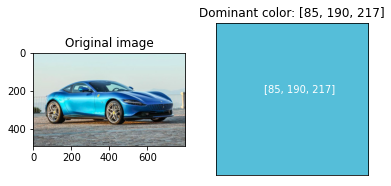

In [40]:
# Note that img_url and pixel_array were set earlier
# from the preprocess_image function
from PIL import Image
from io import BytesIO
import requests
pil_img = Image.open(BytesIO(requests.get(img_url).content))

optimal_cluster = optimal_nclusters_silhouette(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best')

plot_image_color_comparison(pil_img, RGB_col=optimal_cluster['dominant_rgb'])

### Calinsky-Harabasz score

The highest score reflects the optimal number of clusters; that is, the number of clusters that maximizes the similarities within groups and minimizes the similarities between groups.

In [30]:
def optimal_nclusters_ch(data, max_clusters=10, random_state=0, return_dict='best', quiet=False):
    '''
    Calculates the Calinsky-Harabasz score from 2 to max_clusters
    clusters and returns a dictionary with information on
    the optimal number of clusters.

    With Calinsky-Harabasz scores, higher is better.

    Documentation: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index
    Also: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

    ## Parameters
    `data` : {array, matrix}
    The data (usually called X in sklearn) upon which
    to apply clustering. For image clustering, this
    should be a NumPy array of shape [n_pixels, 3], or one
    row for every pixel, with three columns representing
    the Red, Green, and Blue values of the pixel on that row.

    `max_clusters` : int, default=10
    The maximum number of clusters to test. This function
    applies the MiniBatchKMeans algorithm from 2 to
    max_clusters number of clusters

    `random_state` : int, default=0
    Set the random_state to some integer for best comparison
    between number of clusters. 
    Set to `None` to enable different random selections
    for each number of clusters (not recommended).

    `return_dict` : {'best', 'all'}, default='best'
    Sets the return value for this function. Default 'best'
    returns a dictionary with information on the optimal
    number of clusters. Set to 'all' to view comparison
    information across cluster groups.

    `quiet` : bool, default=False
    Set to True to prevent the function from printing any output.

    ## Dependencies
    This function relies on the following:
    * `sklearn.metrics.calinski_harabasz_score`
    * `sklearn.cluster.MiniBatchKMeans`
    * `collections.Counter`
    '''
    # MiniBatchKMeans is faster that KMeans and produces almost equivalent results
    from sklearn.cluster import MiniBatchKMeans
    # Counter is used to count the number of pixels in each cluster
    from collections import Counter
    from sklearn.metrics import calinski_harabasz_score

    cluster_scores = {
        'n_clusters': [],
        'ch_score': [],
        'dominant_rgb': [],
        'Cluster_sizes': []
    }

    for n in range(2, max_clusters+1):
        # Fit the clusterer and predict cluster labels
        kmeans = MiniBatchKMeans(n_clusters=n, random_state=random_state).fit(data)
        cluster_scores['n_clusters'].append(n)
        cluster_scores['ch_score'].append(calinski_harabasz_score(X=data, labels=kmeans.labels_))
        # Group labels to compare size of groups
        # See: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
        label_counts = Counter(kmeans.labels_)

        # Find the name (integer) of the largest cluster
        largest_cluster = label_counts.most_common(1)[0][0]
        dominant_rgb = [int(round(item, 0)) for item in kmeans.cluster_centers_[largest_cluster]]
        cluster_scores['dominant_rgb'].append(dominant_rgb)
        # List the cluster sizes in descending order
        cluster_scores['Cluster_sizes'].append(sorted(list(label_counts.values()), reverse=True))

    max_score = max(cluster_scores['ch_score'])
    max_index = cluster_scores['ch_score'].index(max_score)
    optimal_clusters = cluster_scores['n_clusters'][max_index]
    optimal_rgb = cluster_scores['dominant_rgb'][max_index]
    if not quiet:
        print(f'The best score was {round(max_score,3)}, from {optimal_clusters} clusters.')
        print(f'The dominant RGB value is {optimal_rgb}', '\n', sep='')

    if return_dict == 'best':
        best_dict = {k:v[max_index] for k, v in cluster_scores.items()}
        return best_dict
    else:
        return cluster_scores

In [41]:
# Display the resulting dictionary as a DataFrame
cluster_scores = optimal_nclusters_ch(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='all')

dict_copy = cluster_scores.copy()
index = dict_copy.pop('n_clusters')
pd.DataFrame(data=dict_copy, index=index)

The best score was 3574.767, from 6 clusters.
The dominant RGB value is [26, 206, 234]



ch_score  ...                                      Cluster_sizes
2   3482.856283  ...                                       [1557, 1190]
3   3048.941917  ...                                    [986, 958, 803]
4   3308.539933  ...                               [819, 698, 624, 606]
5   3390.863690  ...                          [635, 623, 586, 575, 328]
6   3574.766669  ...                     [537, 514, 507, 471, 455, 263]
7   3441.042621  ...                [483, 430, 423, 394, 393, 335, 289]
8   3483.479461  ...           [451, 435, 387, 373, 333, 274, 257, 237]
9   3371.215805  ...      [450, 395, 361, 338, 333, 267, 232, 190, 181]
10  3345.617598  ...  [446, 389, 329, 328, 320, 266, 230, 183, 166, 90]

[9 rows x 3 columns]

The best score was 3574.767, from 6 clusters.
The dominant RGB value is [26, 206, 234]



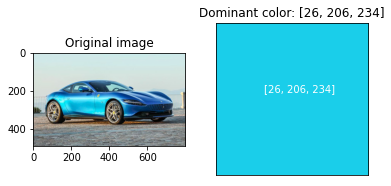

In [42]:
# Note that img_url and pixel_array were set earlier
# from the preprocess_image function
from PIL import Image
from io import BytesIO
import requests
pil_img = Image.open(BytesIO(requests.get(img_url).content))

# Find the best number of clusters
optimal_cluster = optimal_nclusters_ch(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best')

# Display the optimal cluster information
# optimal_cluster

# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=optimal_cluster['dominant_rgb'])

### Elbow method
The elbow method means to plot the scores for n-clusters and note the slope of the line. The optimal number of clusters is the point where the slope bends sharply to flatten out from its initial steep decline.

Uses `sklearn.cluster.KMeans().inertia_` attribute, which is the "sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided" according to the [sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). See also [KMeans](https://scikit-learn.org/stable/modules/clustering.html#k-means) on sklearn's [Clustering](https://scikit-learn.org/stable/modules/clustering.html) documentation.

Optimal number of clusters is: 4

Dominant RGB value is: [42, 104, 158]

              Dominant_RGB   Inertia    Slope   Change
n_clusters                                            
2           [85, 190, 217]  15283195 -4256886        0
3           [39, 147, 194]  11026309 -3491267   765619
4           [42, 104, 158]   7535042 -1682863  1808404
5           [32, 106, 171]   5852179 -1234689   448174
6           [26, 206, 234]   4617490  -535237   699452
7            [28, 75, 121]   4082253  -575493    40256
8            [21, 79, 134]   3506760  -303130   272363
9           [17, 203, 232]   3203630  -310405     7275
10          [16, 203, 232]   2893225        0        0



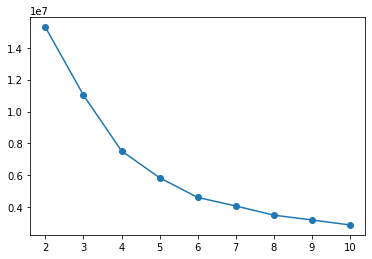

In [43]:
# Demonstration of the elbow method
# =================================
import numpy as np, pandas as pd
# MiniBatchKMeans is faster that KMeans and produces almost equivalent results
from sklearn.cluster import MiniBatchKMeans
# Counter is used to count the number of pixels in each cluster
from collections import Counter

inertia_scores = []
rgb_centers = []

for n in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=n, random_state=0).fit(pixel_array)
    inertia_scores.append(int(round(kmeans.inertia_, 0)))
    # Count labels to compare size of clusters
    # See: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
    label_counts = Counter(kmeans.labels_)
    # Find the name (integer) of the largest cluster
    largest_cluster = label_counts.most_common(1)[0][0]
    dominant_rgb = [int(round(item, 0)) for item in kmeans.cluster_centers_[largest_cluster]]
    rgb_centers.append(dominant_rgb)

# Calculate the slopes and changes in slope
slopes = []
changes = []
for n in range(len(inertia_scores)):
    if n < 1:
        # Slope can be calculated starting from the second point
        slopes.append(0)
        changes.append(0)
    elif n < 2:
        # Change in slope can be calculated staring from the third point
        changes.append(0)
        slopes.append(inertia_scores[n] - inertia_scores[n-1])
    else:
        slopes.append(inertia_scores[n] - inertia_scores[n-1])
        changes.append(abs(slopes[n] - slopes[n-1]))

# Adjust slope and changes 1 position backwards to align with data points
for n in range(len(slopes)):
    if n < (len(slopes)-1):
        slopes[n] = slopes[n+1]
        changes[n] = changes[n+1]
    else:
        slopes[n] = 0
        changes[n] = 0

inertia_comp = {
    'n_clusters': range(2,11),
    'Dominant_RGB': rgb_centers,
    'Inertia': inertia_scores,
    'Slope': slopes,
    'Change': changes,
}

# Find the optimal number of clusters based on the
# maximum change in slopes. Add 2 to that index
# since the n_clusters starts at 2.
max_change_nclusters = changes.index(max(changes)) + 2
dominant_rgb = rgb_centers[changes.index(max(changes))]
print(f'Optimal number of clusters is: {max_change_nclusters}\n')
print(f'Dominant RGB value is: {dominant_rgb}\n')

# Display the data
print(pd.DataFrame(inertia_comp).set_index('n_clusters'), '\n', sep='')

# Plot the chart
x_vals = list(range(2, 11))
y_vals = inertia_scores
plt.plot(x_vals, y_vals, marker='o')
plt.show()

Function for the elbow method

In [32]:
def optimal_nclusters_elbow(data, max_clusters=10, random_state=0, plot_data=False, quiet=False):
    '''
    Calculates the optimal number of clusters using the
    'elbow method', which is based on the changes in
    inertia between different numbers of clusters.

    Returns a dictionary with the best number of clusters
    using the elbow method criteria:
    ```
    {
        n_clusters: value,
        dominant_rgb: [R, G, B]
    }
    ```

    Notably, this function is very fast.

    Documentation: https://scikit-learn.org/stable/modules/clustering.html#k-means

    ## Parameters
    `data` : {array, matrix}
    The data (usually called X in sklearn) upon which
    to apply clustering. For image clustering, this
    should be a NumPy array of shape [n_pixels, 3], or one
    row for every pixel, with three columns representing
    the Red, Green, and Blue values of the pixel on that row.

    `max_clusters` : int, default=10
    The maximum number of clusters to test. Must be >= 3.
    This function applies the MiniBatchKMeans algorithm 
    from 2 to max_clusters number of clusters.

    `random_state` : int, default=0
    Set the random_state to some integer for best comparison
    between number of clusters. 
    Set to `None` to enable different random selections
    for each number of clusters (not recommended).

    `plot_data` : bool, default=False
    Whether to plot the data to visualize the elbow method.

    `quiet` : bool, default=False
    Set to True to prevent the function from printing any output.

    ## Dependencies
    This function relies on the following:
    * `pandas`
    * `matplotlib`
    * `sklearn.cluster.MiniBatchKMeans`
    * `collections.Counter`
    '''
    import pandas as pd
    import matplotlib.pyplot as plt
    # MiniBatchKMeans is faster that KMeans and produces almost equivalent results
    from sklearn.cluster import MiniBatchKMeans
    # Counter is used to count the number of pixels in each cluster
    from collections import Counter

    # Ensure max_clusters is at least 3, which is needed
    # to compute the change in slope (slope requires 2 points to compute,
    # and change in slope requires 2 slopes, or 3 points)
    if max_clusters < 3:
        max_clusters = 3

    inertia_scores = []
    rgb_centers = []

    for n in range(2, max_clusters+1):
        kmeans = MiniBatchKMeans(n_clusters=n, random_state=random_state).fit(data)
        inertia_scores.append(int(round(kmeans.inertia_, 0)))
        # Count labels to compare size of clusters
        # See: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
        label_counts = Counter(kmeans.labels_)
        # Find the name (integer) of the largest cluster
        largest_cluster = label_counts.most_common(1)[0][0]
        dominant_rgb = [int(round(item, 0)) for item in kmeans.cluster_centers_[largest_cluster]]
        rgb_centers.append(dominant_rgb)

    # Calculate the slopes and changes in slope
    slopes = []
    changes = []
    for n in range(len(inertia_scores)):
        if n < 1:
            # Slope can be calculated starting from the second point
            slopes.append(0)
            changes.append(0)
        elif n < 2:
            # Change in slope can be calculated staring from the third point
            changes.append(0)
            slopes.append(inertia_scores[n] - inertia_scores[n-1])
        else:
            slopes.append(inertia_scores[n] - inertia_scores[n-1])
            changes.append(abs(slopes[n] - slopes[n-1]))

    # Adjust slope and changes 1 position backwards to align with data points
    for n in range(len(slopes)):
        if n < (len(slopes)-1):
            slopes[n] = slopes[n+1]
            changes[n] = changes[n+1]
        else:
            slopes[n] = 0
            changes[n] = 0

    # Compare the inertia levels across n_cluster values
    inertia_comp = {
        'n_clusters': range(2, max_clusters+1),
        'Dominant_RGB': rgb_centers,
        'Inertia': inertia_scores,
        'Slope': slopes,
        'Change': changes,
    }

    # Find the optimal number of clusters based on the
    # maximum change in slopes. Add 2 to that index
    # since the n_clusters starts at 2.
    max_change_nclusters = changes.index(max(changes)) + 2
    dominant_rgb = rgb_centers[changes.index(max(changes))]
    return_dict = {
        'n_clusters': max_change_nclusters,
        'dominant_rgb': dominant_rgb
    }
    if not quiet:
        print(f'Optimal number of clusters is: {max_change_nclusters}\n')
        print(f'Dominant RGB value is: {dominant_rgb}\n')

    if plot_data:
        if not quiet:
            # Display the data
            print(pd.DataFrame(inertia_comp).set_index('n_clusters'), '\n', sep='')

        # Plot the chart
        x_vals = list(range(2, 11))
        y_vals = inertia_scores
        plt.plot(x_vals, y_vals, marker='o')
        plt.show()
    
    return return_dict

Optimal number of clusters is: 4

Dominant RGB value is: [42, 104, 158]



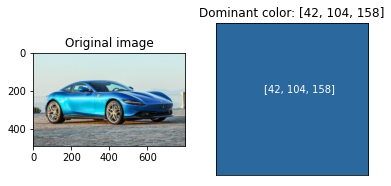

In [44]:
# Note that img_url and pixel_array were set earlier
# from the preprocess_image function
from PIL import Image
from io import BytesIO
import requests
pil_img = Image.open(BytesIO(requests.get(img_url).content))

# Find the best number of clusters
optimal_cluster = optimal_nclusters_elbow(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    plot_data=False)

# Display the optimal cluster information
# optimal_cluster

# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=optimal_cluster['dominant_rgb'])

### Comparison of optimal cluster functions
To test, uncomment the `%timeit` lines in the cell two below this one.

**My results from `%timeit`**
* Silhouette function: `1 loop, best of 5: 1.94 s per loop`
* Calinsky-Harabasz function: `10 loops, best of 5: 154 ms per loop`
* Inertia (elbow) function: `10 loops, best of 5: 141 ms per loop`

In [ ]:
# First, load the pixel_array

import random
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']
# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')

print('Processing... ', filename, '\n', sep='')

pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='resize', 
    crop_center=True, 
    display_img=False, 
    scale_rgb=False)

print('\nRGB values of first five pixels...')
pd.DataFrame(data=pixel_array, columns=['Red', 'Green', 'Blue']).head(5)

Processing... 2022_Nissan_Armada.jpg

Input image dimensions: width=800, height=489

Image cropped to center of 3x3 grid.
New dimensions: width=267, height=163

Resized by 1/4x
Resized image dimensions: width=67, height=41

Image converted to pixel array of shape (height * width, RGB): (2747, 3)

RGB values of first five pixels...


Red  Green  Blue
0   53      6    31
1   50      4    31
2   47      1    30
3   44      0    30
4   42      0    30

In [ ]:
# # Now, test the functions
# print('Silhouette function...')
# sil_func = %timeit -o optimal_clusters = optimal_nclusters_silhouette(data=pixel_array, quiet=True)
# print('=====================\n=====================')

# print('Calinsky-Halabasz function...')
# ch_func = %timeit -o optimal_clusters = optimal_nclusters_ch(data=pixel_array, quiet=True)
# print('=====================\n=====================')

# print('Inertia (elbow) function...')
# elbow_func = %timeit -o optimal_clusters = optimal_nclusters_elbow(data=pixel_array, quiet=True)

Silhouette function...
1 loop, best of 5: 1.94 s per loop
Calinsky-Halabasz function...
10 loops, best of 5: 154 ms per loop
Inertia (elbow) function...
10 loops, best of 5: 141 ms per loop


In [ ]:
print('Silhouette:', f'\nBest: {sil_func.best}', f'\nWorst: {sil_func.worst}', 
      f'\nLoops: {sil_func.loops}', f'\nRepeats: {sil_func.repeat}', 
      f'\nCompile time: {sil_func.compile_time}', f'\nAll runs: {sil_func.all_runs}', '\n', sep='')

print('Calinsky-Harabasz:', f'\nBest: {ch_func.best}', f'\nWorst: {ch_func.worst}', 
      f'\nLoops: {ch_func.loops}', f'\nRepeats: {ch_func.repeat}', 
      f'\nCompile time: {ch_func.compile_time}', f'\nAll runs: {ch_func.all_runs}', '\n', sep='')

print('Inertia (elbow):', f'\nBest: {elbow_func.best}', f'\nWorst: {elbow_func.worst}', 
      f'\nLoops: {elbow_func.loops}', f'\nRepeats: {elbow_func.repeat}', 
      f'\nCompile time: {elbow_func.compile_time}', f'\nAll runs: {elbow_func.all_runs}', sep='')

Silhouette:
Best: 1.9383587670017732
Worst: 3.8849922219997097
Loops: 1
Repeats: 5
Compile time: 0.00013400000011642987
All runs: [3.8849922219997097, 2.941380988999299, 3.0058323240009486, 2.7938267810022808, 1.9383587670017732]

Calinsky-Harabasz:
Best: 0.1539811587001168
Worst: 0.1631906800001161
Loops: 10
Repeats: 5
Compile time: 8.600000001024455e-05
All runs: [1.6319068000011612, 1.6221249159971194, 1.539811587001168, 1.5690453290008008, 1.5545356339971477]

Inertia (elbow):
Best: 0.14082299239998974
Worst: 0.30205701529994256
Loops: 10
Repeats: 5
Compile time: 8.499999989908247e-05
All runs: [1.458189709999715, 1.4848490170006698, 1.4082299239998974, 1.7830193779991532, 3.0205701529994258]


**View image comparison from functions**

Silhouette function...
{'n_clusters': 2, 'Silhouette_score': 0.4738441114020407, 'dominant_rgb': [85, 190, 217], 'Cluster_sizes': [1557, 1190]}


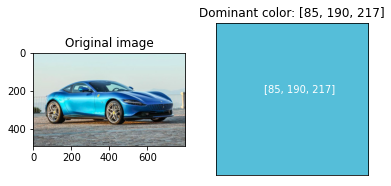



Calinsky-Harabasz function...
{'n_clusters': 6, 'ch_score': 3574.7666685382756, 'dominant_rgb': [26, 206, 234], 'Cluster_sizes': [537, 514, 507, 471, 455, 263]}


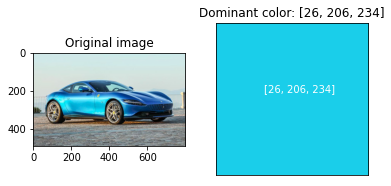



Inertia (elbow) function...
{'n_clusters': 4, 'dominant_rgb': [42, 104, 158]}


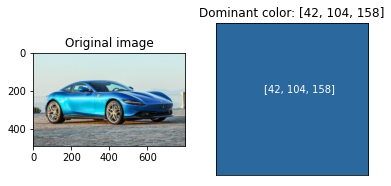

In [45]:
# First, using the pixel_array and img_url already loaded
# =======================================================
# Note that img_url and pixel_array were set earlier
# from the preprocess_image function
from PIL import Image
from io import BytesIO
import requests
pil_img = Image.open(BytesIO(requests.get(img_url).content))

print('Silhouette function...')
# Silhouette function
sil_cluster = optimal_nclusters_silhouette(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best',
    quiet=True)
# Display the optimal cluster information
print(sil_cluster)
# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=sil_cluster['dominant_rgb'])

print('\n\nCalinsky-Harabasz function...')
# Calinsky-Harabasz function
ch_cluster = optimal_nclusters_ch(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best',
    quiet=True)
print(ch_cluster)
# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=ch_cluster['dominant_rgb'])


print('\n\nInertia (elbow) function...')
# Elbow method
elbow_cluster = optimal_nclusters_elbow(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    plot_data=False,
    quiet=True)
print(elbow_cluster)
# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=elbow_cluster['dominant_rgb'])

Processing... 2017_Nissan_Juke.jpg

Silhouette function...
{'n_clusters': 2, 'Silhouette_score': 0.6488143732167932, 'dominant_rgb': [11, 12, 40], 'Cluster_sizes': [1978, 769]}


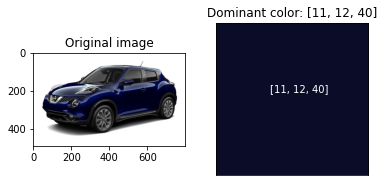



Calinsky-Harabasz function...
{'n_clusters': 10, 'ch_score': 7194.955154450354, 'dominant_rgb': [2, 2, 22], 'Cluster_sizes': [837, 366, 294, 280, 244, 211, 199, 189, 72, 55]}


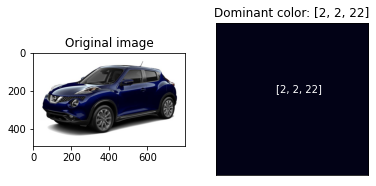



Inertia (elbow) function...
{'n_clusters': 3, 'dominant_rgb': [7, 9, 37]}


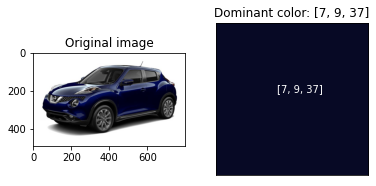

In [ ]:
# Next, using a new, randomly selected image
# ==========================================
from PIL import Image
from io import BytesIO
import requests
import random
import numpy as np

# First, load a new random image 
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']

# Capture the image for display in the plot_image_color_comparison() function
pil_img = Image.open(BytesIO(requests.get(img_url).content))

# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')
print('Processing... ', filename, '\n', sep='')
pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='resize', 
    crop_center=True, 
    display_img=False,
    quiet=True, 
    scale_rgb=False)


print('Silhouette function...')
# Silhouette function
sil_cluster = optimal_nclusters_silhouette(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best',
    quiet=True)
# Display the optimal cluster information
print(sil_cluster)
# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=sil_cluster['dominant_rgb'])

print('\n\nCalinsky-Harabasz function...')
# Calinsky-Harabasz function
ch_cluster = optimal_nclusters_ch(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    return_dict='best',
    quiet=True)
print(ch_cluster)
# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=ch_cluster['dominant_rgb'])


print('\n\nInertia (elbow) function...')
# Elbow method
elbow_cluster = optimal_nclusters_elbow(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    plot_data=False,
    quiet=True)
print(elbow_cluster)
# Display the image next to the optimal color
plot_image_color_comparison(pil_img, RGB_col=elbow_cluster['dominant_rgb'])

## Function to return closest named color from dominant RGB value

**Reference**
 * `webcolors` section from: https://predictivehacks.com/most-dominant-color-of-an-image/
 * [`webcolors` docs](https://webcolors.readthedocs.io/en/1.11.1/contents.html#webcolors.CSS3_HEX_TO_NAMES)

In [47]:
def get_color_name(rgb=[0,0,0]):
    '''
    Returns the HTML name of the color
    closest to the RGB value given.

    Return format: dictionary
    `{'name': color_name, 'rgb': rgb_val}`

    ## Parameters
    `rgb` : 3-item list, default=[0,0,0]
    Must be a 3-item list of integers in 
    the range [0, 255], representing the
    Red, Green, and Blue color values for
    a color that will be used to find the
    name of the nearest named color

    ## Dependencies
    Uses the `webcolors` package, and the 
    `sys` package to check if `webcolors`
    has been installed already

    Credits:
    I learned the technique to this function
    from: https://predictivehacks.com/most-dominant-color-of-an-image/
    '''
    import sys

    # Check if webcolors is already installed
    # Reference: https://stackoverflow.com/a/1051266/17005348
    if 'webcolors' not in sys.modules:
        !pip install webcolors
    
    import webcolors

    # the red, green, and blue input
    red, green, blue = rgb[0], rgb[1], rgb[2]

    # create lists for the color names and distance to that color
    color_names = []
    rgb_vals = []
    distances = []

    # loop through all 147 named colors and compute the 
    # sum of squared differences between the named color
    # and the input color
    for hex, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r1, g1, b1 = tuple(webcolors.hex_to_rgb(hex_value=hex))
        # Square differences to penalize larger deviations; leads to
        # greater accuracy than using the absolute value difference
        distance = (red - r1)**2 + (green - g1)**2 + (blue - b1)**2
        color_names.append(name)
        rgb_vals.append((r1, g1, b1))
        distances.append(distance)

    # find the index value of the smallest distance
    min_distance = distances.index(min(distances))
    # RGB value of min_distance color
    color_name = color_names[min_distance]
    closest_rgb = rgb_vals[min_distance]
    return {'name': color_name, 'rgb': closest_rgb}

Test the function, first visually, then in a table

{'name': 'steelblue', 'rgb': (70, 130, 180)}


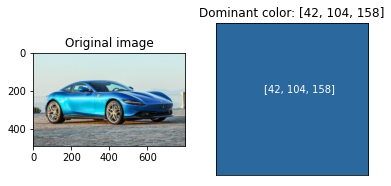

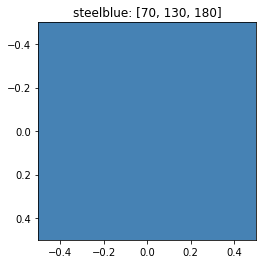

In [51]:
# First, using the pixel_array and img_url already loaded
# =======================================================
# Note that img_url and pixel_array were set earlier
# from the preprocess_image function
from PIL import Image
from io import BytesIO
import requests
pil_img = Image.open(BytesIO(requests.get(img_url).content))

# Determine optimal cluster number
optimal_clusters = optimal_nclusters_elbow(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    plot_data=False,
    quiet=True)

color_name = get_color_name(rgb=optimal_clusters['dominant_rgb'])
print(color_name)

# Display image with guessed color
plot_image_color_comparison(pil_img, RGB_col=optimal_clusters['dominant_rgb'])
print('\n')

# Display closest named color
rgb_square = np.array(list(color_name['rgb']))
plt.title(color_name['name'] + ': ' + str(list(color_name['rgb'])))
plt.imshow(rgb_square.reshape(1,1,3))
plt.show()

Processing... 2019_Ford_Flex.jpg

{'name': 'maroon', 'rgb': (128, 0, 0)}


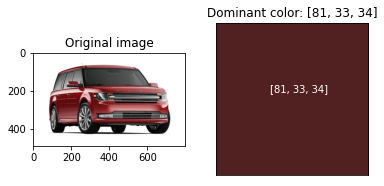

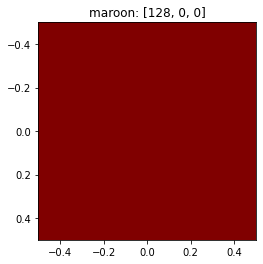

In [58]:
# Next, using a new, randomly selected image
# ==========================================
from PIL import Image
from io import BytesIO
import requests
import random
import numpy as np

# First, load a new random image 
# Choose a random row from the dataset
rand_num = random.choice(df.index.values)
img_url = df.loc[rand_num, 'Image']

# Capture the image for display in the plot_image_color_comparison() function
pil_img = Image.open(BytesIO(requests.get(img_url).content))

# Build a filename for the image
filetype = img_url[-4:]
filename = str(df.loc[rand_num, 'Year']) + '_' + str(df.loc[rand_num, 'Make']) + '_' + str(df.loc[rand_num, 'Model']) + filetype
filename = filename.replace(' ', '-')
print('Processing... ', filename, '\n', sep='')
# Preprocess image
pixel_array = preprocess_image(
    img_path=img_url, 
    is_url=True, 
    scale_factor=4, 
    scale_mode='resize', 
    crop_center=True, 
    display_img=False,
    quiet=True, 
    scale_rgb=False)

# Determine optimal cluster number
elbow_cluster = optimal_nclusters_elbow(
    data=pixel_array, 
    max_clusters=10, 
    random_state=0,
    plot_data=False,
    quiet=True)

color_name = get_color_name(rgb=elbow_cluster['dominant_rgb'])
print(color_name)

# Display image with guessed color
plot_image_color_comparison(pil_img, RGB_col=elbow_cluster['dominant_rgb'])
print('\n')

# Display closest named color
rgb_square = np.array(list(color_name['rgb']))
plt.title(color_name['name'] + ': ' + str(list(color_name['rgb'])))
plt.imshow(rgb_square.reshape(1,1,3))
plt.show()

In [60]:
# View table showing nearest colors to the input_color
# ==================================================
import sys
# Check if webcolors is already installed
# Reference: https://stackoverflow.com/a/1051266/17005348
if 'webcolors' not in sys.modules:
    !pip install webcolors
import webcolors

input_color = elbow_cluster['dominant_rgb']
hexvals = []
names = []
distances = []
rgbvals = []
for hex, name in webcolors.CSS3_HEX_TO_NAMES.items():
    r, g, b = tuple(webcolors.hex_to_rgb(hex))
    distance = (input_color[0] - r)**2 + (input_color[1] - g)**2 + (input_color[2] - b)**2
    # distance = abs(input_color[0] - r) + abs(input_color[1] - g) + abs(input_color[2] - b)
    hexvals.append(hex)
    names.append(name)
    distances.append(distance)
    rgbvals.append(tuple(webcolors.hex_to_rgb(hex)))

print('Input RGB:', elbow_cluster['dominant_rgb'])
df_colors = pd.DataFrame({'Hex': hexvals, 'RGB': rgbvals, 'Name': names, 'Distance': distances}).sort_values(by='Distance', ascending=True)
df_colors.head(5)

Input RGB: [81, 33, 34]


Hex            RGB            Name  Distance
78   #800000    (128, 0, 0)          maroon      4454
114  #8b4513  (139, 69, 19)     saddlebrown      4885
34   #2f4f4f   (47, 79, 79)   darkslategray      5297
30   #8b0000    (139, 0, 0)         darkred      5609
27   #556b2f  (85, 107, 47)  darkolivegreen      5661

## Label images with color names

In [61]:
def get_vehicle_color(vehicle_specs_df, image_col, print_progress=True):
    '''
    Returns a copy of the input DataFrame with a column
    added called 'Dominant_color' that gives the HTML color
    name for the most prominent color in the input image.

    ## Parameters
    `vehicle_specs_df` : `pandas` `DataFrame`
    This is the DataFrame created from the dictionary
    returned by the `get_vehicle_specs()` function

    `image_col` : str
    The name of the column in the vehicle_specs_df that
    has paths (URLs) to images.

    `print_progress` : bool, default=True
    If True, display progress by printing information to the display.

    ## Dependencies
    This function relies on the following:
    * pandas
    * time
    * datetime
    '''
    import pandas as pd
    import time
    import datetime

    # Save the current time
    if print_progress:
        start_time = time.time()

    # Create a copy of the input DataFrame and reset its index 
    # in case any rows were dropped (making some values of the index skipped,
    # which would render inaccurate the df.join() at the end) 
    df = vehicle_specs_df.reset_index(drop=True)
    total_rows = len(df.index)

    # Create a list to hold the color names (will be appended to DataFrame at end)
    color_names = []

    # Loop through 'Image' column of DataFrame
    for n, (idx, img_url) in enumerate(df[image_col].iteritems()):
        # pause for 10ms to comply with CarAndDriver's robots.txt page
        time.sleep(0.01)
        # Load image as a pixel array
        try:
            pixel_array = preprocess_image(
                img_path=img_url, 
                is_url=True, 
                scale_factor=4, 
                scale_mode='resize', 
                crop_center=True, 
                display_img=False,
                quiet=True, 
                scale_rgb=False)
        except:
            print(f"Encountered error on row {n+1}, index {idx},",
                  f"Make: {df.loc[idx, 'Make']}, Model: {df.loc[idx, 'Model']},",
                  f"Trim_ID: {df.loc[idx, 'Trim_ID']}, Image: {df.loc[idx, image_col]}")
            color_names.append('NA')
            # Skip to next row
            continue
        
        # Determine the optimal number of clusters
        # using the ultrafast elbow method
        best_clusters = optimal_nclusters_elbow(
            data=pixel_array, 
            max_clusters=10, 
            random_state=0,
            plot_data=False,
            quiet=True)
        # Get the name of the closest color
        color_name = get_color_name(best_clusters['dominant_rgb'])
        # Add name to the list
        color_names.append(color_name['name'])

        # Display progress after every 10th row is completed
        if print_progress and ((n+1) % 10)==0:
            elapsed_time = time.time() - start_time
            pct_complete = (n + 1) / total_rows
            estimated_seconds_left = (elapsed_time / pct_complete) - elapsed_time
            est_time_left = str(datetime.timedelta(seconds=estimated_seconds_left))
            # See: https://www.kite.com/python/answers/how-to-format-a-number-as-a-percentage-in-python
            print('{:.1%}'.format(pct_complete), 'complete',
                    '\nImages processed:', n + 1,
                    '\nTime elapsed:', str(datetime.timedelta(seconds=elapsed_time)),
                    '\nEstimated time remaining:', est_time_left, '\n')
    
    # Add the new column to the input DataFrame
    ser_colors = pd.Series(data=color_names, name='Dominant_color')
    return df.join(ser_colors)

In [ ]:
# Check values in column

# print(len(df['Image'].index))
# for i, (n, img_url) in enumerate(df['Image'].iteritems()):
#     print(i, n, img_url)

Add the color name column to the dataset

In [62]:
print('Before adding image color colums\n', 'Rows:\t', df.shape[0], '\nCols:\t', df.shape[1], '\n', sep='')
df_w_colors = get_vehicle_color(df, image_col='Image', print_progress=True)
print('After adding image color column\n', 'Rows:\t', df_w_colors.shape[0], '\nCols:\t', df_w_colors.shape[1], '\n', sep='')
# Save a copy of the DataFrame with text features and image features included
df_w_colors.to_csv('vehicle_specs_final.csv', index=False)
df_w_colors.head(10)

Before adding image color colums
Rows:	520
Cols:	33

1.9% complete 
Images processed: 10 
Time elapsed: 0:00:04.992614 
Estimated time remaining: 0:04:14.623316 

3.8% complete 
Images processed: 20 
Time elapsed: 0:00:07.895468 
Estimated time remaining: 0:03:17.386694 

5.8% complete 
Images processed: 30 
Time elapsed: 0:00:12.495057 
Estimated time remaining: 0:03:24.085929 

7.7% complete 
Images processed: 40 
Time elapsed: 0:00:17.401999 
Estimated time remaining: 0:03:28.823988 

9.6% complete 
Images processed: 50 
Time elapsed: 0:00:26.296955 
Estimated time remaining: 0:04:07.191380 

11.5% complete 
Images processed: 60 
Time elapsed: 0:00:35.836827 
Estimated time remaining: 0:04:34.749004 

13.5% complete 
Images processed: 70 
Time elapsed: 0:00:39.784222 
Estimated time remaining: 0:04:15.755715 

15.4% complete 
Images processed: 80 
Time elapsed: 0:00:42.774796 
Estimated time remaining: 0:03:55.261378 

17.3% complete 
Images processed: 90 
Time elapsed: 0:00:45.7532

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (134497676 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


86.5% complete 
Images processed: 450 
Time elapsed: 0:03:50.894371 
Estimated time remaining: 0:00:35.916902 

88.5% complete 
Images processed: 460 
Time elapsed: 0:04:01.276815 
Estimated time remaining: 0:00:31.470889 

90.4% complete 
Images processed: 470 
Time elapsed: 0:04:06.409673 
Estimated time remaining: 0:00:26.213795 

92.3% complete 
Images processed: 480 
Time elapsed: 0:04:10.117537 
Estimated time remaining: 0:00:20.843128 

94.2% complete 
Images processed: 490 
Time elapsed: 0:04:17.241793 
Estimated time remaining: 0:00:15.749498 

96.2% complete 
Images processed: 500 
Time elapsed: 0:04:31.250606 
Estimated time remaining: 0:00:10.850024 

98.1% complete 
Images processed: 510 
Time elapsed: 0:04:37.124563 
Estimated time remaining: 0:00:05.433815 

100.0% complete 
Images processed: 520 
Time elapsed: 0:04:41.308279 
Estimated time remaining: 0:00:00 

After adding image color column
Rows:	520
Cols:	34



Trim_ID   Make  ... Sentiment_positive  Dominant_color
0   419573  Acura  ...              0.206           brown
1   423559  Acura  ...              0.000       lightgray
2   425066  Acura  ...              0.196  lightslategray
3   425739  Acura  ...              0.129       royalblue
4   424967  Acura  ...              0.272   darkslategray
5   409741  Acura  ...              0.198  lightslategray
6   363873  Acura  ...              0.000        darkgray
7   364152  Acura  ...              0.000         crimson
8   356136  Acura  ...              0.076   darkslategray
9   338730  Acura  ...              0.000           black

[10 rows x 34 columns]

## Next steps: Feature extraction
**Troubleshoot the four missing images to investigate**

1. `Encountered error on row 172, index 171, Make: Ferrari, Model: F12berlinetta, Trim_ID: 397394, Image: https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/media/assets/submodel/8597.jpg`

2. `Encountered error on row 301, index 300, Make: Lamborghini, Model: Murciélago, Trim_ID: 334642, Image: https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/media/assets/submodel/4506.jpg`

3. `Encountered error on row 336, index 335, Make: Lincoln, Model: MKX, Trim_ID: 395646, Image: https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/media/assets/submodel/8409.jpg`

4. `Encountered error on row 413, index 412, Make: Mini, Model: Cooper Roadster S / JCW, Trim_ID: 378986, Image: https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/media/assets/submodel/7184.jpg`

**Also**, between image 440 and 450, an unusually large image was found:
```
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (134497676 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.

  DecompressionBombWarning,

86.5% complete 
Images processed: 450
```

---

### Test all functions together on the missing images

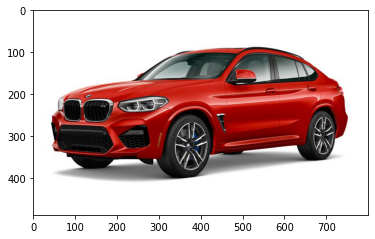

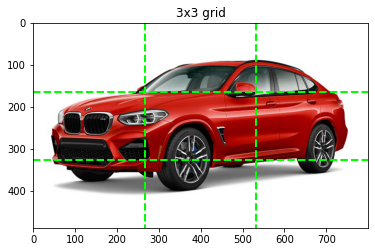

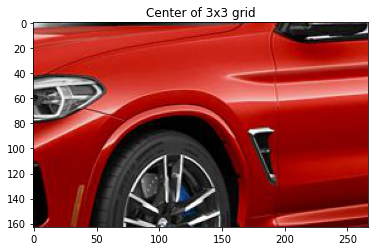

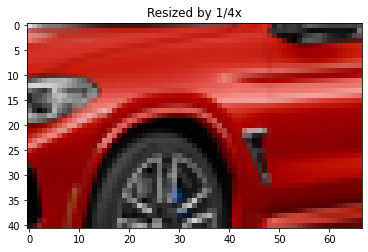

firebrick (178, 34, 34)


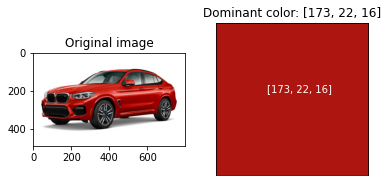

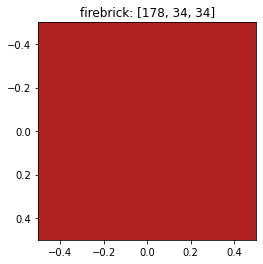

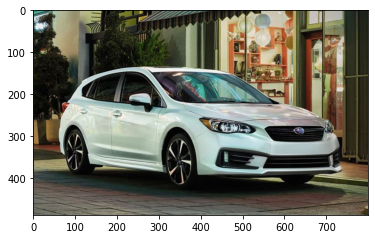

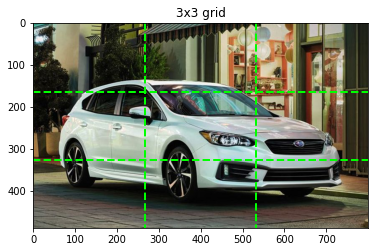

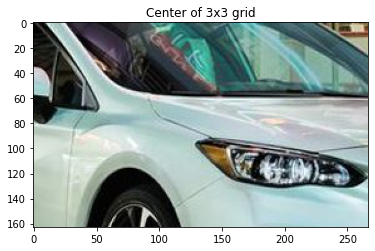

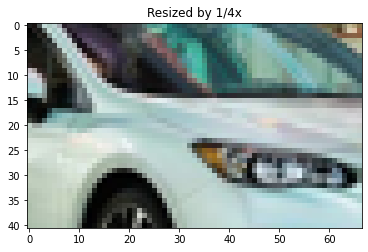

silver (192, 192, 192)


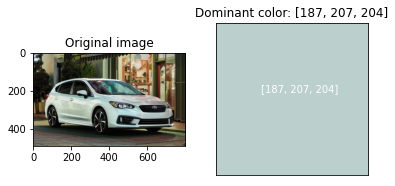

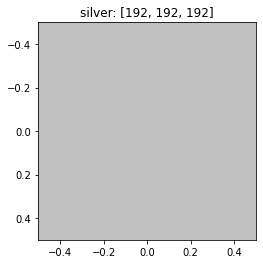

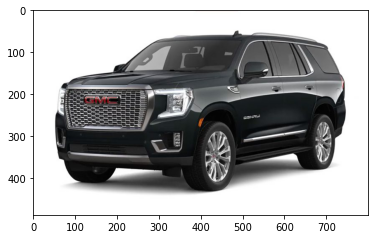

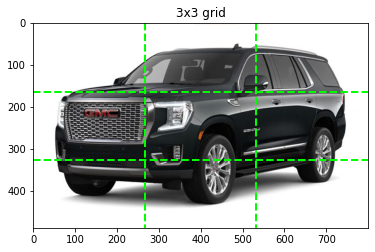

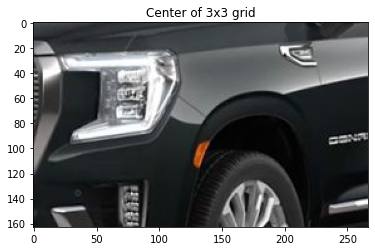

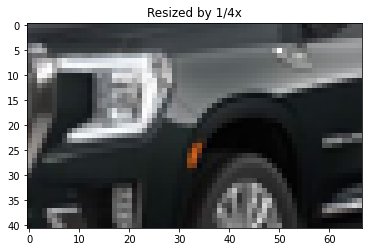

black (0, 0, 0)


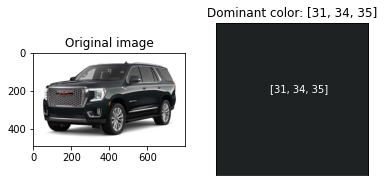

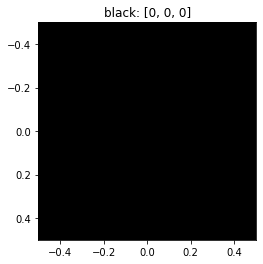

In [63]:
from PIL import Image
from io import BytesIO
import requests

import numpy as np
import matplotlib.pyplot as plt
factor = 4

test_images = [
                'https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/vdat/submodels/bmw_x4-m_bmw-x3-m_2022-1629740310609.jpg',
                'https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/vdat/submodels/subaru_impreza_subaru-impreza-5-door_2022-1636561758999.jpg',
                'https://hips.hearstapps.com/amv-prod-cad-assets.s3.amazonaws.com/vdat/submodels/gmc_yukon-yukon-xl_gmc-yukon_2022-1634066047069.jpg'
]

for img_url in test_images:
    # Capture the image for display in the plot_image_color_comparison() function
    pil_img = Image.open(BytesIO(requests.get(img_url).content))
    
    pixel_array = preprocess_image(
        img_path=img_url, 
        is_url=True, 
        scale_factor=4, 
        scale_mode='resize', 
        crop_center=True, 
        display_img=True,
        quiet=True, 
        scale_rgb=False)
    
    best_clusters = optimal_nclusters_elbow(
        data=pixel_array, 
        max_clusters=10, 
        random_state=0,
        plot_data=False,
        quiet=True)
    # Get the name of the closest color
    color_name = get_color_name(best_clusters['dominant_rgb'])
    print(color_name['name'], color_name['rgb'])
    
    # Display image with guessed color
    plot_image_color_comparison(pil_img, RGB_col=best_clusters['dominant_rgb'])
    print('\n')

    # Display closest named color
    rgb_square = np.array(list(color_name['rgb']))
    plt.title(color_name['name'] + ': ' + str(list(color_name['rgb'])))
    plt.imshow(rgb_square.reshape(1,1,3))
    plt.show()
    # break

# (5) Feature selection
In this section, I demonstrate a few techniques for determining which features are the most important. 

**For regression**, the target labels will be any of:
* 'Price'
* 'Rating'
* 'MPG_highway'
* 'Curb_weight_pounds'
* 'Max_horsepower'
* 'Length'


**For classification**, the target labels will be any of:
* 'Origin' (2 classes once 'unknown' is dropped)
* 'Body_style' (8 classes)
* 'Transmission_type' (4 classes)
* 'Drivetrain' (4 classes)
* 'Same_size_wheels' (binary True/False)
* 'Seating_capacity' (8 classes)

In [1]:
# Run this cell to pick up here without starting from the beginning

# import pandas as pd
# df = pd.read_csv('https://raw.githubusercontent.com/rparkr/ML-practice/main/Vehicle%20specs/Final%20project/vehicle_specs_final.csv')

## Calculate most important features
The function below uses two feature selection measures and finds the columns chosen by both methods.

### Next steps
* Consider using the [`sklearn.feature_selection.f_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html) class to return p-values as part of estimation. 

* [`sklearn.feature_selection.SelectFromMode`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression) combined with the [`importance_getter`](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model) attribute and a custom frunction that returns either Variance Inflation Scores for each feature or p-values for each feature (from `statsmodels.api`).

* Use VarianceThreshold to remove low-variance columns (like many of the `Make_` columns since most would be 0s when dummy-coded). Note that this method would require a very high `max_col_values` threshold since variance is _good_, and the `max_col_values` penalizes variance in categorical columns by limiting the dataset to columns with fewer than the specified amount of different unique values (that is, columns that remain will have lower variance). 

In [2]:
def get_important_features(dataframe,
                            estimator_task,
                            keep_cols,
                            drop_cols,
                            target_label,
                            max_col_values = 20,
                            min_features = 5,
                            k_folds = 5,
                            n_repeats = 2,
                            random_state = 0):
    '''
    Returns a dictionary with information about the most
    important features, as calculated by `sklearn`'s 
    `feature_selection.RFECV` (recursive feature elimination)
    and `feature_selection.SelectFromModel` functions.

    To get the list of features returned from this function, 
    use 
    `features = get_important_features()['shared_features']`,
    which returns a list of the features found by both approaches.

    ## Parameters
    `dataframe` : a DataFrame

    `estimator_task` : {'regression', 'classification'}
    The prediction goal. 
    'regression' uses the `sklearn.linear_model.Ridge()` estimator.
    `classification` uses the `sklearn.tree.DecisionTreeClassifier()` estimator.

    `keep_cols` : list
    List of column names to keep in preprocessing

    `drop_cols` : list
    List of column names, to be dropped in preprocessing

    `target_label` : str
    The name of the target (label) column

    `max_col_values` : int
    During preprocessing, categorical columns will be dummy-coded.
    Categorical columns with more than max_col_values number of
    unique values will be dropped.

    `min_features` : int
    For the RFECV function, this determines the minimum number
    of features that will be returned.

    `k_folds` : int, default=5
    The number of partitions to make in the input data during
    cross-validation.

    `n_repeats` : int
    The number of times to sample from each partition during
    cross-validation.

    `random_state`: int
    Sets the seed for random selection, enabling reproducibility.

    ## Dependencies
    This function relies on sklearn, pandas, and numpy
    '''


    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.feature_selection import SelectFromModel
    # Recursive Feature Elimination Cross-Validated
    from sklearn.feature_selection import RFECV

    from sklearn.model_selection import RepeatedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import Ridge
    from sklearn.tree import DecisionTreeClassifier

    if estimator_task == 'regression':
        estimator = Ridge()
    elif estimator_task == 'classification':
        estimator = DecisionTreeClassifier()
    else:
        raise ValueError("'" + str(estimator_task) + "' is not a valid option for the"
                        + "'estimator_task' parameter.\nPlease choose either"
                        + "'regression' or 'classification'")

    # Prepare and load the dataset
    if type(keep_cols) != list:
        keep_cols = [keep_cols]
    if type(drop_cols) != list:
        drop_cols = [drop_cols]

    # Remove any categorical columns that will add more than max_col_values
    # number of columns when dummy-coded. That is, remove categorical
    # columns with # unique values > max_col_values.
    cols_to_check = [col for col in dataframe.columns if (col not in drop_cols) and (not pd.api.types.is_numeric_dtype(dataframe[col]))]

    for col in cols_to_check:
        if (col not in keep_cols) and (col != target_label) and (len(dataframe[col].unique()) > max_col_values):
            drop_cols.append(col)

    # Store the categorical columns to be dummy-coded
    catg_cols = [col for col in df.columns if (col not in drop_cols) and (col != target_label) and (not pd.api.types.is_numeric_dtype(dataframe[col]))]

    if estimator_task == 'regression':
        df_dummies = pd.get_dummies(data=dataframe.drop(columns=drop_cols), columns=catg_cols)
        df_minmax = pd.DataFrame(data=MinMaxScaler().fit_transform(df_dummies), columns=df_dummies.columns)
        x_vars = df_minmax.drop(columns=[target_label])
        y_var = df_minmax[target_label]
    else:
        drop_cols.append(target_label)
        df_dummies = pd.get_dummies(data=dataframe.drop(columns=drop_cols), columns=catg_cols)
        df_minmax = pd.DataFrame(data=MinMaxScaler().fit_transform(df_dummies), columns=df_dummies.columns)
        df_minmax = df_minmax.join(dataframe[target_label])
        x_vars = df_minmax.drop(columns=[target_label])
        y_var = df_minmax[target_label]


    # Create the cross-validation object
    cross_val = RepeatedKFold(n_splits = k_folds,
                            n_repeats = n_repeats, 
                            random_state = random_state)
    # Recursive Feature Elimination Cross-Validated
    # For an example of this technique, see:
    # https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
    if estimator_task == 'regression':
        score_method = 'r2'
    else:
        score_method = 'accuracy'

    rfecv = RFECV(estimator = estimator,
                    min_features_to_select = min_features,
                    cv = cross_val,
                    scoring = score_method,
                    n_jobs = -1)
    rfecv.fit(X=x_vars, y=y_var)

    avg_score = np.mean(rfecv.cv_results_['mean_test_score'])

    # Create the dictionary to hold returned values
    features_dict = {}
    features_dict['estimator_task'] = estimator_task
    features_dict['target_label'] = target_label
    features_dict['num_features_orig'] = rfecv.n_features_in_
    feature_cols = list(rfecv.get_feature_names_out())
    feature_cols.append(target_label)
    features_dict['RFE'] = {'score': avg_score, 'num_features': rfecv.n_features_, 'selected_features': feature_cols}

    # Use the SelectFromModel method to select features
    selector = SelectFromModel(estimator=estimator, threshold='mean').fit(X=x_vars, y=y_var)
    feature_cols = list(selector.get_feature_names_out())
    feature_cols.append(target_label)
    new_df = df_minmax[feature_cols]
    x_vars = new_df.drop(columns=[target_label])
    y_var = new_df[target_label]
    scores = cross_val_score(estimator=estimator, X=x_vars, y=y_var, scoring=score_method, cv=cross_val)
    avg_score = np.mean(scores)
    features_dict['SelectFromModel'] = {'score': avg_score, 'num_features': len(feature_cols) -1, 'selected_features': feature_cols}

    # Find which features are shared between the feature selection methods
    if features_dict['RFE']['num_features'] > features_dict['SelectFromModel']['num_features']:
        max_feature_list = features_dict['RFE']['selected_features']
        other_list = features_dict['SelectFromModel']['selected_features']
    else:
        max_feature_list = features_dict['SelectFromModel']['selected_features']
        other_list = features_dict['RFE']['selected_features']

    shared_features = [item for item in max_feature_list if item in other_list]

    features_dict['shared_features'] = shared_features

    return features_dict

Test the function

In [ ]:
best_features = get_important_features(
    dataframe = df,
    estimator_task = 'classification',
    keep_cols = ['Make', 'Dominant_color'],
    drop_cols = ['Trim_ID', 'URL', 'Image', 'Description'],
    target_label = 'Origin',
    max_col_values = 20,
    min_features = 5,
    k_folds = 5,
    n_repeats = 2,
    random_state = 0)

print('Number of features: ', len(best_features['shared_features']), 
      '\nFeatures returned:\n', best_features['shared_features'], '\n', sep='')

for key, value in best_features.items():
    print(key, ':', value)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Number of features: 24
Features returned:
['Engine_size_liters', 'Max_horsepower', 'Max_torque', 'Transmission_gears', 'MPG_highway', 'Fuel_capacity_gallons', 'Length_inches', 'Width_inches', 'Height_inches', 'Curb_weight_pounds', 'Sentiment_overall', 'Make_Acura', 'Make_Aston Martin', 'Make_Chrysler', 'Make_Dodge', 'Make_Ferrari', 'Make_Honda', 'Make_Jeep', 'Make_Mini', 'Make_Subaru', 'Body_style_pickup', 'Dominant_color_lavender', 'Dominant_color_lightslategray', 'Origin']

estimator_task : classification
target_label : Origin
num_features_orig : 123
RFE : {'score': 0.8569974143503553, 'num_features': 63, 'selected_features': ['Engine_size_liters', 'Max_horsepower', 'Max_torque', 'Transmission_gears', 'MPG_highway', 'MPG_combined', 'Fuel_capacity_gallons', 'Length_inches', 'Width_inches', 'Height_inches', 'Same_size_wheels', 'Seating_capacity', 'Curb_weight_pounds', 'Sentiment_overall', 'Sentiment_negative', 'Sentiment_neutral', 'Sentiment_positive', 'Make_Acura', 'Make_Alfa Romeo', 

# (6) Machine learning estimators
> In `sklearn`, _estimators_ are algorithms that _fit_ (or train) on a dataset to produce predictions for future, unseen data.

There are three kinds of estimators: regressors, classifiers, and clusters. **Regressors** predict continuous numerical targets, **classifiers** predict categorical targets, and **clusters** group data into categories.

In this section, I implement methods to perform all three kinds of estimation.

**References**
* [sklearn's `utils.all_estimators`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.all_estimators.html) class for returning lists of all available estimators of any type.
* [sklearn's User Guide](https://scikit-learn.org/stable/user_guide.html)


## Save fitted models

In [3]:
def save_fitted_model(fitted_model, file_name):
    '''
    Uses pickle to save the fitted model as a file, 
    which can then be deployed to make predictions
    from new data.

    ## Returns
    Nothing. That is, it saves the file to disc but doesn't
    return a result.

    ## Parameters
    `fitted_model` : `sklearn` estimator, fitted (trained)
    The fitted (trained) model comes from the `.fit()` method
    of a `sklearn` estimator. The functions `get_best_regressor()`
    and `get_best_classifier()` return fitted models.

    `file_name` : str
    The name to be given to the fitted model when it is saved.

    ## Dependencies
    Requires the pickle module.
    '''
    import pickle
    pickle.dump(fitted_model, open(file_name, 'wb'))

In [4]:
def load_fitted_model(file_name):
    '''
    Uses pickle to load the fitted model from a 
    file, which can be used to make predictions.

    ## Returns
    Fitted model, ready to be used for prediction.

    ## Parameters
    `file_name` : str
    The name of the file that has the fitted model.

    ## Dependencies
    Requires the pickle module.
    '''
    import pickle
    return pickle.load(open(file_name, 'rb'))

## Data preprocessing
Includes min-max scaling, dummy column encoding, and logarithmic transformation to the label (if needed).

In [64]:
def preprocess_df(input_df, col_dtype_changes, target_label, keep_cols, 
                  drop_cols, max_col_values=20, drop_first=True, correct_skew=False):
    '''
    Processes an input `DataFrame` and returns
    a DataFrame that is ready to be used with
    sklearn's estimators.

    Operations performed:
    - Drops any columns specified in `drop_cols`.
    - Changes data types of colums specified in
    `col_dtype_changes`
    - Drops any categorical columns with more than
    `max_col_values` number of unique features
    - Dummy-codes categorical columns
    - Normalizes data (using MinMaxScaler)
    - Corrects `target_label` skewness

    ## Returns
    A tuple (processed_df, target_label), where
    processed_df is the output DataFrame and
    target_label is the name of the target label
    that was transformed, or the input target_label
    if no skewness corrections were made.


    ## Parameters
    `input_df` : `pandas` `df`
    The df to be processed

    `col_dtype_changes` : dict
    A dictionary of {col_name: 'new_dtype'} values
    for changing the data types of columns. Valid
    data types include 'object', 'int64' and 'float64'.

    `target_label` : str
    The name of the target (label) column

    `keep_cols` : list
    List of column names to keep in preprocessing

    `drop_cols` : list
    List of column names, to be dropped in preprocessing

    `max_col_values` : int
    During preprocessing, categorical columns will be dummy-coded.
    Categorical columns with more than max_col_values number of
    unique values will be dropped.

    `drop_first` : bool, default=True
    When creating dummy columns from a categorical feature,
    only (n-1) columns are needed, where 'n' is the number
    of unique values in the categorical column to be dummy-coded.
    `drop_first=True` means to create n-1 columns rather than
    n columns for each dummy-coded categorical feature.
    If set to `False`, n columns will be created, which creates
    redundant information that can invalidate certain models,
    like the multi-linear regression model: 
    `sklearn.linear_model.LinearRegression`.

    `correct_skew` : bool, default=False
    If True (and if target_label is numeric), transform the label
    to correct skewness (which should be in the range [-1, 1]

    ## Dependencies
    This function relies on pandas, numpy, and sklearn
    '''
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler

    df = input_df.copy()

    # Convert data types
    if type(col_dtype_changes) == dict:
        df = df.astype(col_dtype_changes)

    # Transform label to correct skewness
    if correct_skew:
        skew_score = df[target_label].skew()
        print(f'Original skew of {target_label}:', round(skew_score, 2))
        if skew_score > 1:
            new_target_label = target_label + '_log'
            df[new_target_label] = np.log1p(df[target_label])
            skew_score = df[new_target_label].skew()
            print(f'New skew of {new_target_label}:', round(skew_score, 2))
            # drop original target column, since a new target col was created
            df.drop(columns=[target_label], inplace=True)
            # Reset the target_label variable
            target_label = new_target_label
        elif skew_score < -1:
            new_target_label = target_label + '_squared'
            df[new_target_label] = df[target_label] ** 2
            skew_score = df[new_target_label].skew()
            print(f'New skew of {new_target_label}:', round(skew_score, 2))
            # drop original target column, since a new target col was created
            df.drop(columns=[target_label], inplace=True)
            # Reset the target_label variable
            target_label = new_target_label
        else:
            print('Skew score is:', round(skew_score, 2), 'which is within the normal range of [-1, 1]')

    # Prepare and load the dataset
    if type(keep_cols) != list:
        keep_cols = [keep_cols]
    if type(drop_cols) != list:
        drop_cols = [drop_cols]

    # Remove any categorical columns that will add more than max_col_values
    # number of columns when dummy-coded. That is, remove categorical
    # columns with # unique values > max_col_values.
    cols_to_check = [col for col in df.columns if (col not in drop_cols) and (not pd.api.types.is_numeric_dtype(df[col]))]
    for col in cols_to_check:
        if (col not in keep_cols) and (col != target_label) and (len(df[col].unique()) > max_col_values):
            drop_cols.append(col)

    # Store the categorical columns to be dummy-coded
    catg_cols = [col for col in df.columns if (col not in drop_cols) and (col != target_label) and (not pd.api.types.is_numeric_dtype(df[col]))]
    ser_target = df[target_label]
    drop_cols.append(target_label)
    df_dummies = pd.get_dummies(data=df.drop(columns=drop_cols), columns=catg_cols, drop_first=drop_first)
    df_minmax = pd.DataFrame(data=MinMaxScaler().fit_transform(df_dummies), columns=df_dummies.columns)
    df_minmax = df_minmax.join(ser_target)
    
    # x_vars = df_minmax.drop(columns=[target_label])
    # y_var = df_minmax[target_label]

    return df_minmax, target_label

## List all available estimators in `sklearn`

**References**
* [StackOverflow answer](https://stackoverflow.com/a/63336419/17005348) showing how to list all classifier estimators
* [StackOverflow answer](https://stackoverflow.com/a/63336387/17005348) showing how to list all regressor estimators
* [StackOverflow answer](https://stackoverflow.com/a/68368853/17005348) showing how to list all estimators with a given parameter (like `.fit_transform()`)
* [StackOverflow answer](https://stackoverflow.com/a/42160314/17005348) showing how to list all estimators of any given category (classifier, regressor, cluster) using the [`sklearn.base` mixins](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.base)
* [sklearn guide to Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
* [sklearn API](https://scikit-learn.org/stable/modules/classes.html)

In [ ]:
from sklearn.utils import all_estimators

all_classifiers = {}
for name, estimator in all_estimators(type_filter='classifier'):
    all_classifiers[name] = estimator

all_regressors = {}
for name, estimator in all_estimators(type_filter='regressor'):
    all_regressors[name] = estimator

all_clusters = {}
for name, estimator in all_estimators(type_filter='cluster'):
    all_clusters[name] = estimator

# Display the results
print('List of classifiers\n', all_classifiers, sep='')
print('\nList of regressors\n', all_regressors, sep='')
print('\nList of clusterers\n', all_clusters, sep='')

List of classifiers
{'AdaBoostClassifier': <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble._bagging.BaggingClassifier'>, 'BernoulliNB': <class 'sklearn.naive_bayes.BernoulliNB'>, 'CalibratedClassifierCV': <class 'sklearn.calibration.CalibratedClassifierCV'>, 'CategoricalNB': <class 'sklearn.naive_bayes.CategoricalNB'>, 'ClassifierChain': <class 'sklearn.multioutput.ClassifierChain'>, 'ComplementNB': <class 'sklearn.naive_bayes.ComplementNB'>, 'DecisionTreeClassifier': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'DummyClassifier': <class 'sklearn.dummy.DummyClassifier'>, 'ExtraTreeClassifier': <class 'sklearn.tree._classes.ExtraTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GaussianProcessClassifier': <class 'sklearn.gaussian_process._gpc.GaussianProcessClassifier'>, 'GradientBoostingClassifier': <class 'sk

Create a function from the above code

In [19]:
def all_estimators(estimator_type='classifier'):
    '''
    Returns a dictionary where the keys are
    the names of the `sklearn` estimators and
    the values are the estimator objects, which
    can usually be initialized like this:
    ```python
    import sklearn
    all_regressors = all_estimators(type_filter='regressor')
    reg_estimator = all_regressors['AdaBoostRegressor']()
    # reg_estimator is now an estimator object
    ```
    That's it! By simply adding parentheses to the end of the
    dictionary selection, you can create an instance of that
    estimator object.

    ## Parameters
    `estimator_type` : {'classifier', 'regressor', 'cluster', None}, default='classifier'
    The type of estimators to return. Set to `None` to return
    a dictionary of all estimators in sklearn.

    ## Dependencies
    Relies on `sklearn.utils.all_estimators`
    '''
    from sklearn.utils import all_estimators
    estimator_dict = {}

    for name, estimator in all_estimators(type_filter=estimator_type):
        estimator_dict[name] = estimator

    return estimator_dict

## Randomly select estimators and find the best ones

### Next steps
* Use `GridSearchCV` to tune hyperparmeters of the estimators
* Check out [AutoML (`auto-sklearn`)](https://github.com/automl/auto-sklearn/) to automatically perform hyerparameter tuning across the dozens of estimators for classification, regression, or clustering tasks.
* See sklearn's [list of related projects](https://scikit-learn.org/stable/related_projects.html) for more interesting ML applications and extensions to Scikit-learn, like `yellowbrick`, which provides visualization for model selection (like Silhouette score or elbow method for k-means).

### All estimators

#### Next steps
* Exclude any estimators that have 'CV' at the end (like 'RidgeCV'), since they are the same as the standard estimator, with a built-in cross-validation, which isn't needed, since I already perform cross-validation with all estimators.
* Update the dictionary that holds models and scores so the order is better when printed out for display. Should have model names as the keys, and the values should be a sub-dictionary with `{'Score': score, 'Model_object': estimator_object}`. That way, when printed, the score appears right next to the model name, rather than in a list separated from the model name.

In [18]:
def get_best_estimator(input_df, estimator_type, target_label, num_estimators=10, use_estimators=None, 
                       k_folds=2, n_repeats=5, scoring='auto', random_state=None, print_results=True):
    '''
    Returns a fitted `sklearn` estimator after trying 
    `num_estimators` (default=10) randomly-selected
    estimators, or the specific estimators given in `use_estimators`.

    ## Parameters
    `input_df` : `pandas` `DataFrame`
    The preprocessed DataFrame to be used for model training (fitting).
    Note that this DataFrame must be preprocessed to dummy-code text columns
    and normalize through min-max scaling.

    `estimator_type` : {'classifier', 'regressor', 'cluster', None}
    The type of estimator to use. Choose the estimator based on the
    predictive task: regression (for continuous numerical targets),
    classification (for categorical targets), or clustering (for 
    grouping samples into categories).
    A value of `None` for this parmeter will draw from all available
    estimators in `sklearn`

    `target_label` : str
    The name of the target (label) column

    `num_estimators` : int, default=10
    If use_estimators=None (the default), then test `num_estimators`
    of randomly selected sklearn estimators for model training.

    `use_estimators` : list, default=None
    Rather than using random estimators, you can choose which
    estimators will be validated by supplying the names of
    the estimators in a list.

    `k_folds` : int, default=2
    The number of partitions to make in the input data during
    cross-validation.

    `n_repeats` : int, default=5
    The number of times to sample from each partition during
    cross-validation.

    `scoring` : str, default='auto'
    The scoring metric used to evaluate the performance of each
    estimator. 
    If 'auto' (default), this parameter is set based on the 
    `estimator_type` parameter: if 'regressor' then 'r2' will be used,
    if 'classifier' then 'accuracy' will be used, and if anything else,
    `None` is used to enable the default scorer.
    If `None`, the estimator's default scorer will be
    used, following the behavior of `sklearn.model_selection.cross_val_score`.
    For a list of possible options for this parameter, see:
    https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    See also: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

    `random_state`: int, default=None
    Sets the seed for random selection, enabling reproducibility.

    `print_results`: bool, default=True
    If True, print an output showing which models were tested
    and how they scored.

    ## Dependencies
    This function relies on sklearn, pandas, numpy, and random
    '''
    import random
    import sklearn
    import pandas as pd
    import numpy as np

    # Load data
    if estimator_type == 'cluster':
        print('Applying this function for clustering is still under development,', 
              '\nplease choose another estimator type ("regressor", "classifier")', sep='')
        return  # nothing, and end function execution
    else:
        df = input_df.copy()
        X_vars = df.drop(columns=[target_label])
        y_var = df[target_label]

    # Set scoring parameter
    if scoring == 'auto':
        if estimator_type == 'regressor':
            scoring = 'r2'
        elif estimator_type == 'classifier':
            scoring = 'accuracy'
        else:
            scoring = None
    
    # Load list of all estimators
    all_models = all_estimators(estimator_type=estimator_type)

    # Potential future update: remove any estimators that have
    # 'CV' at the end (like 'RidgeCV'), since they are the same
    # as the standard estimator, with a built-in cross-validation,
    # which isn't needed, since I already perform cross-validation
    # with all estimators.

    if use_estimators != None:
        selected_models = {item: all_models[item] for item in use_estimators}
    else:
        # Select a random sample of the estimators
        if num_estimators > len(all_models):
            num_estimators = len(all_models)
        sample_models = random.sample(all_models.keys(), k=num_estimators)
        selected_models = {item: all_models[item] for item in sample_models}

    cross_val = sklearn.model_selection.RepeatedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=random_state)

    # Create dictionary to store model performance metrics
    model_performance = {'Name': [], 'Model': [], 'Score': []}
    # Create a dictionary to store failed attempts at initializing estimators
    estimator_errors = {}
    for name, model in selected_models.items():
        # Initialize the estimator
        try:
            if hasattr(model, 'random_state'):
                estimator = model(random_state=random_state)
            else:
                estimator = model()
        except Exception as e:
            # Skip if there are non-default parameters that must be set for intializing
            estimator_errors[name] = e
            continue
        # Score the estimator
        score = np.mean(
            sklearn.model_selection.cross_val_score(
                estimator=estimator, X=X_vars, y=y_var, scoring=scoring, cv=cross_val, n_jobs=-1)
            )
        # Save results
        model_performance['Name'].append(name)
        model_performance['Model'].append(estimator)
        model_performance['Score'].append(score)
    
    # Evaluate which model is best
    best_score = max(model_performance['Score'])
    index_best_score = model_performance['Score'].index(best_score)
    name_best_model = model_performance['Name'][index_best_score]
    best_model = model_performance['Model'][index_best_score]

    if print_results:
        print(f'\nTested {num_estimators} estimators. Results:')
        print(f'Best model was: {name_best_model}, with a score of: {best_score}')
        print('Results from all models:\n========================\n', model_performance, sep='')
        if estimator_errors:
            print('\nThe following estimators were attempted, but did not load:')
            print(estimator_errors)
    
    return best_model.fit(X_vars, y_var)

### Regression estimators

In [ ]:
def get_best_regressor(input_df, target_label, num_estimators=10, use_estimators=None, 
                       k_folds=2, n_repeats=5, random_state=0, print_results=True):
    '''
    Returns a fitted `sklearn` estimator after trying 10 randomly-selected
    estimators, or the specific estimators given in `use_estimators`.

    ## Parameters
    `input_df` : `pandas` `DataFrame`
    The preprocessed DataFrame to be used for model training (fitting).
    Note that this DataFrame must be preprocessed to dummy-code text columns
    and normalize through min-max scaling.

    `target_label` : str
    The name of the target (label) column

    `num_estimators` : int, default=10
    If use_estimators=None (the default), then test `num_estimators`
    of randomly selected sklearn estimators for model training.

    `use_estimators` : list, default=None
    Rather than using random estimators, you can choose which
    estimators will be validated by supplying the names of
    the estimators in a list.

    `k_folds` : int, default=2
    The number of partitions to make in the input data during
    cross-validation.

    `n_repeats` : int, default=5
    The number of times to sample from each partition during
    cross-validation.

    `random_state`: int
    Sets the seed for random selection, enabling reproducibility.

    `print_results`: bool, default=True
    If True, print an output showing which models were tested
    and how they scored.

    ## Dependencies
    This function relies on sklearn, pandas, numpy, and random
    '''
    import random
    import sklearn
    import pandas as pd
    import numpy as np

    # Load data
    df = input_df.copy()
    X_vars = df.drop(columns=[target_label])
    y_var = df[target_label]

    # Load of list of all regressor estimators
    all_models = all_estimators(estimator_type='regressor')

    if use_estimators != None:
        selected_models = {item: all_models[item] for item in use_estimators}
    else:
        # Select a random sample of the estimators
        if num_estimators > len(all_models):
            num_estimators = len(all_models)
        sample_models = random.sample(all_models.keys(), k=num_estimators)
        selected_models = {item: all_models[item] for item in sample_models}

    cross_val = sklearn.model_selection.RepeatedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=random_state)

    # Create dictionary to store model performance metrics
    model_performance = {'Name': [], 'Model': [], 'Score': []}
    for name, model in selected_models.items():
        # Initialize the estimator
        try:
            if hasattr(model, 'random_state'):
                estimator = model(random_state=random_state)
            else:
                estimator = model()
        except:
            # Skip if there are add'l requirements for intializing
            continue
        # Score the estimator
        score = np.mean(
            sklearn.model_selection.cross_val_score(
                estimator=estimator, X=X_vars, y=y_var, scoring='r2', cv=cross_val, n_jobs=-1)
            )
        # Save results
        model_performance['Name'].append(name)
        model_performance['Model'].append(estimator)
        model_performance['Score'].append(score)
    
    # Evaluate which model is best
    best_score = max(model_performance['Score'])
    index_best_score = model_performance['Score'].index(best_score)
    name_best_model = model_performance['Name'][index_best_score]
    best_model = model_performance['Model'][index_best_score]

    if print_results:
        print(f'\nBest model was: {name_best_model}, with a score of: {best_score}')
        print('Results from all models:\n========================\n', model_performance, sep='')
    
    return best_model.fit(X_vars, y_var)

#### Find best regression estimator

In [20]:
df_processed, target = preprocess_df(input_df=df, 
                             col_dtype_changes={'Trim_ID': 'object', 'Transmission_gears': 'int64'},
                             target_label='Price', keep_cols = ['Make', 'Dominant_color'],
                             drop_cols = ['Trim_ID', 'URL', 'Image', 'Description'], correct_skew=True)

best_regression_model = get_best_estimator(input_df=df_processed,
                                           estimator_type='regressor',
                                           target_label=target)

save_fitted_model(fitted_model=best_regression_model, file_name='regression_model.sav')

Original skew of Price: 3.9
New skew of Price_log: 0.94

Tested 10 estimators. Results:
Best model was: LinearSVR, with a score of: 0.8824315031741102
Results from all models:
{'Name': ['RANSACRegressor', 'Lasso', 'LassoLarsIC', 'ExtraTreeRegressor', 'LinearSVR', 'DummyRegressor', 'GammaRegressor', 'Lars'], 'Model': [RANSACRegressor(), Lasso(), LassoLarsIC(), ExtraTreeRegressor(), LinearSVR(), DummyRegressor(), GammaRegressor(), Lars()], 'Score': [-2.700488072923984e+23, -0.0024278830147625107, 0.8359720587810984, 0.7947699425605974, 0.8824315031741102, -0.004378862253547844, 0.4092995050455356, -1.7541820302474967e+294]}

The following estimators were attempted, but did not load:
{'MultiOutputRegressor': TypeError("__init__() missing 1 required positional argument: 'estimator'"), 'VotingRegressor': TypeError("__init__() missing 1 required positional argument: 'estimators'")}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
df_processed, target = preprocess_df(input_df=df, 
                             col_dtype_changes={'Trim_ID': 'object', 'Transmission_gears': 'int64'},
                             target_label='Price', keep_cols = ['Make', 'Dominant_color'],
                             drop_cols = ['Trim_ID', 'URL', 'Image', 'Description'], correct_skew=True)

best_regression_model = get_best_regressor(input_df=df_processed, 
                                           target_label=target)

save_fitted_model(fitted_model=best_regression_model, file_name='regression_model.sav')

Original skew of Price: 3.9
New skew of Price_log: 0.94
Best model was: DecisionTreeRegressor, with a score of: 0.9953207709331678
Results from all models:
{'Name': ['ElasticNet', 'PLSRegression', 'ARDRegression', 'CCA', 'TheilSenRegressor', 'DecisionTreeRegressor', 'PLSCanonical', 'BayesianRidge'], 'Model': [ElasticNet(), PLSRegression(), ARDRegression(), CCA(), TheilSenRegressor(max_subpopulation=10000), DecisionTreeRegressor(), PLSCanonical(), BayesianRidge()], 'Score': [-0.0005724940024170345, 0.9316785332920237, 0.9501438510015122, 0.32493401322161714, 0.8897904638821098, 0.9953207709331678, -3.0816382452498736, 0.9558747581132166]}


In [ ]:
# Demonstrate loading fitted model
fitted_model = load_fitted_model('regression_model.sav')
fitted_model.predict(X=df_processed.drop('Price'))

### Classification estimators

In [ ]:
def get_best_classifier(input_df, target_label, num_estimators=10, use_estimators=None, 
                       k_folds=2, n_repeats=5, random_state=0, print_results=True):
    '''
    Returns a fitted `sklearn` estimator after trying 10 randomly-selected
    estimators, or the specific estimators given in `use_estimators`.

    ## Parameters
    `input_df` : `pandas` `DataFrame`
    The preprocessed DataFrame to be used for model training (fitting).
    Note that this DataFrame must be preprocessed to dummy-code text columns
    and normalize through min-max scaling.

    `target_label` : str
    The name of the target (label) column

    `num_estimators` : int, default=10
    If use_estimators=None (the default), then test `num_estimators`
    of randomly selected sklearn estimators for model training.

    `use_estimators` : list, default=None
    Rather than using random estimators, you can choose which
    estimators will be validated by supplying the names of
    the estimators in a list.

    `k_folds` : int, default=2
    The number of partitions to make in the input data during
    cross-validation.

    `n_repeats` : int, default=5
    The number of times to sample from each partition during
    cross-validation.

    `random_state`: int
    Sets the seed for random selection, enabling reproducibility.

    `print_results`: bool, default=True
    If True, print an output showing which models were tested
    and how they scored.

    ## Dependencies
    This function relies on sklearn, pandas, numpy, and random
    '''
    import random
    import sklearn
    import pandas as pd
    import numpy as np

    # Load data
    df = input_df.copy()
    X_vars = df.drop(columns=[target_label])
    y_var = df[target_label]

    # Load of list of all classifer estimators
    all_models = all_estimators(estimator_type='classifier')

    if use_estimators != None:
        selected_models = {item: all_models[item] for item in use_estimators}
    else:
        # Select a random sample of the estimators
        if num_estimators > len(all_models):
            num_estimators = len(all_models)
        sample_models = random.sample(all_models.keys(), k=num_estimators)
        selected_models = {item: all_models[item] for item in sample_models}

    cross_val = sklearn.model_selection.RepeatedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=random_state)

    # Create dictionary to store model performance metrics
    model_performance = {'Name': [], 'Model': [], 'Score': []}
    for name, model in selected_models.items():
        # Initialize the estimator
        try:
            if hasattr(model, 'random_state'):
                estimator = model(random_state=random_state)
            else:
                estimator = model()
        except:
            # Skip if there are add'l requirements for intializing
            continue
        # Score the estimator
        score = np.mean(
            sklearn.model_selection.cross_val_score(
                estimator=estimator, X=X_vars, y=y_var, scoring='accuracy', cv=cross_val, n_jobs=-1)
            )
        # Save results
        model_performance['Name'].append(name)
        model_performance['Model'].append(estimator)
        model_performance['Score'].append(score)
    
    # Evaluate which model is best
    best_score = max(model_performance['Score'])
    index_best_score = model_performance['Score'].index(best_score)
    name_best_model = model_performance['Name'][index_best_score]
    best_model = model_performance['Model'][index_best_score]

    if print_results:
        print(f'Best model was: {name_best_model}, with a score of: {best_score}')
        print('Results from all models:\n========================\n', model_performance, sep='')
    
    return best_model.fit(X_vars, y_var)

#### Find best classification estimator

**Note**

Why are dummy codes needed for categorical variables? According to the [documentation on Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree) (from the `sklearn.tree` module), 
> Decision trees are "able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now."

In [ ]:
df_processed = preprocess_df(input_df=df, 
                             col_dtype_changes={'Trim_ID': 'object', 'Transmission_gears': 'int64'},
                             target_label='Body_style', keep_cols = ['Make', 'Dominant_color'],
                             drop_cols = ['Trim_ID', 'URL', 'Image', 'Description'], correct_skew=False)

best_classification_model = get_best_classifier(input_df=df_processed, 
                                           target_label='Body_style')

save_fitted_model(fitted_model=best_classification_model, file_name='classification_model.sav')

Best model was: HistGradientBoostingClassifier, with a score of: 0.7496153846153846
Results from all models:
{'Name': ['DecisionTreeClassifier', 'LogisticRegressionCV', 'BernoulliNB', 'QuadraticDiscriminantAnalysis', 'DummyClassifier', 'ExtraTreesClassifier', 'HistGradientBoostingClassifier', 'LabelPropagation', 'AdaBoostClassifier'], 'Model': [DecisionTreeClassifier(), LogisticRegressionCV(), BernoulliNB(), QuadraticDiscriminantAnalysis(), DummyClassifier(), ExtraTreesClassifier(), HistGradientBoostingClassifier(), LabelPropagation(), AdaBoostClassifier()], 'Score': [0.6923076923076923, 0.6446153846153846, 0.46923076923076923, 0.355, 0.3423076923076923, 0.6934615384615386, 0.7496153846153846, 0.4192307692307692, 0.6188461538461539]}


# Clustering
A unsupervised method to find categories in the dataset. _Unsupervised_ means that I don't select a label to predict, but allow the model to generate labels (categories) for the data.

## Compute the optimal number of clusters using Calinsky-Harabasz score

In [72]:
# Set parameters; note that target_label isn't needed
# or used; but it simply facilitates working with the
# preprocess_df function created earlier
data, target_label = preprocess_df(input_df=df, 
                             col_dtype_changes={'Trim_ID': 'object', 'Transmission_gears': 'int64'},
                             target_label='Price', keep_cols = ['Make', 'Dominant_color'],
                             drop_cols = ['Trim_ID', 'URL', 'Image', 'Description'], correct_skew=False)
max_clusters=20
return_dict='best'
quiet=False

from sklearn.cluster import AgglomerativeClustering
# Counter is used to count the number of items in each cluster
from collections import Counter
from sklearn.metrics import calinski_harabasz_score

cluster_scores = {
    'n_clusters': [],
    'ch_score': [],
    'Cluster_sizes': []
}

for n in range(2, max_clusters+1):
    # Fit the clusterer and predict cluster labels
    cls_agg = AgglomerativeClustering(n_clusters=n).fit(data)
    cluster_scores['n_clusters'].append(n)
    cluster_scores['ch_score'].append(calinski_harabasz_score(X=data, labels=cls_agg.labels_))
    # Group labels to compare size of groups
    # See: https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/
    label_counts = Counter(cls_agg.labels_)

    # Find the name (integer) of the largest cluster
    largest_cluster = label_counts.most_common(1)[0][0]
    # List the cluster sizes in descending order
    cluster_scores['Cluster_sizes'].append(sorted(list(label_counts.values()), reverse=True))

max_score = max(cluster_scores['ch_score'])
max_index = cluster_scores['ch_score'].index(max_score)
optimal_clusters = cluster_scores['n_clusters'][max_index]

if not quiet:
    print(f'The best score was {round(max_score,3)}, from {optimal_clusters} clusters.')

if return_dict == 'best':
    best_dict = {k:v[max_index] for k, v in cluster_scores.items()}
    print(best_dict)
else:
    print(cluster_scores)

The best score was 10531.87, from 20 clusters.
{'n_clusters': 20, 'ch_score': 10531.870490695257, 'Cluster_sizes': [75, 75, 73, 69, 50, 42, 26, 25, 21, 11, 10, 9, 7, 6, 6, 5, 4, 3, 2, 1]}


First, import the needed packages

In [ ]:
# An agglomerative cluster is appropriate for this dataset due to its mixed datatypes and scales
from sklearn.cluster import AgglomerativeClustering

# The gower algorithm is a good method to create a distance matrix with mixed data types
!pip install gower
import gower

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=a32a74883b1fd7f19a958371adc98f597ef69a45489ffd9c3270936df852c438
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


Next, create the distance matrix. Takes a few seconds to compute.

In [ ]:
# Create a copy of the DataFrame for use with the clustering model
df_cluster = df.copy()

# Create a distance matrix using the gower method
distance_matrix = gower.gower_matrix(df_cluster)

# View distance matrix, where each row is compared to all others
pd.DataFrame(distance_matrix).shape

(520, 520)

Fit the `AgglomerativeClustering` estimator

In [ ]:
# Precomputed affinity tells the AgglomerativeClustering  model
# that the data received is a Gower distance matrix rather than
# a pandas DataFrame

# linkage tells the model how to evaluate the differences between clusters
# See: https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

agg = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average').fit(distance_matrix)

save_fitted_model(agg, 'clustering_model.sav')

# add the assigned cluster to each record
df_cluster['Cluster'] = agg.labels_

# See number of assigned clusters
df_cluster['Cluster'].value_counts()

0    518
1      2
Name: Cluster, dtype: int64

In [ ]:
# Group by the clusters and examine the means by column
df_groups = df_cluster.groupby(by=['Cluster']).mean()

# Transpose so the columns are rows and the clusters are columns
df_groups = df_groups.transpose()

# df_groups['Diff'] = abs(df_groups[0] - df_groups[1])
# df_groups.sort_values(by=['Diff'], ascending=False, inplace=True)

df_groups

Cluster                           0              1  ...              6            7
Year                    2020.571429    2018.285714  ...    2020.000000   2021.00000
Rating                     8.714286       8.292857  ...       8.391667      9.50000
Price                  77025.000000  160000.828571  ...  154281.583333  65212.50000
Engine_size_liters         6.000000       4.432857  ...       4.508333      4.85000
Max_horsepower           683.857143     510.185714  ...     520.133333    576.00000
Max_torque               621.714286     450.528571  ...     542.550000    580.00000
Transmission_gears         6.714286       7.128571  ...       7.916667      9.00000
MPG_highway               20.714286      22.657143  ...      20.516667     16.00000
MPG_combined              15.428571      18.452857  ...      16.616667     14.00000
Fuel_capacity_gallons     17.357143      19.167143  ...      21.930000     29.50000
Length_inches            192.057143     183.305714  ...     197.920000    226.45000
Width_inches              75.814286      74.734286  ...      76.883333     87.15000
Height_inches             55.542857      52.097143  ...      61.973333     79.70000
Same_size_wheels           0.857143       0.014286  ...       0.333333      1.00000
Seating_capacity           3.857143       3.300000  ...       4.850000      5.00000
Curb_weight_pounds      4117.857143    3724.171429  ...    4947.583333   5973.50000
Sentiment_overall          0.013857       0.320369  ...       0.310990      0.11315
Sentiment_negative         0.038143       0.024200  ...       0.030683      0.08400
Sentiment_neutral          0.907571       0.842171  ...       0.846617      0.81700
Sentiment_positive         0.054286       0.133643  ...       0.122700      0.09850

[20 rows x 8 columns]

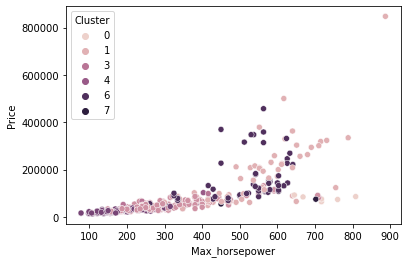

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df_cluster['Max_horsepower'], y=df_cluster['Price'], hue=df_cluster['Cluster'])
plt.show()